In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# 1. GoogleAds Performance

In [2]:
googleads_performance = pd.read_csv("googleads-performance.csv")
googleads_performance

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,2024-01-01,Cross-network,143669.0,896.0,656.3,6.5,1410.3
1,2024-01-01,Display Network,3.0,0.0,0.0,0.0,0.0
2,2024-01-01,Search Network,3701.0,251.0,496.5,4.5,576.4
3,2024-01-01,YouTube,36211.0,8.0,115.2,0.0,0.0
4,2024-01-02,Cross-network,183496.0,1172.0,1525.0,8.8,3565.7
...,...,...,...,...,...,...,...
709,2024-06-29,YouTube,27631.0,25.0,239.8,1.2,368.1
710,2024-06-30,Cross-network,315253.0,1919.0,1899.1,24.6,3742.4
711,2024-06-30,Display Network,36.0,0.0,0.2,0.0,0.0
712,2024-06-30,Search Network,4541.0,264.0,465.6,9.7,915.1


In [3]:
googleads_performance.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,2024-01-01,Cross-network,143669.0,896.0,656.3,6.5,1410.3
1,2024-01-01,Display Network,3.0,0.0,0.0,0.0,0.0
2,2024-01-01,Search Network,3701.0,251.0,496.5,4.5,576.4
3,2024-01-01,YouTube,36211.0,8.0,115.2,0.0,0.0
4,2024-01-02,Cross-network,183496.0,1172.0,1525.0,8.8,3565.7


In [4]:
googleads_performance.tail()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
709,2024-06-29,YouTube,27631.0,25.0,239.8,1.2,368.1
710,2024-06-30,Cross-network,315253.0,1919.0,1899.1,24.6,3742.4
711,2024-06-30,Display Network,36.0,0.0,0.2,0.0,0.0
712,2024-06-30,Search Network,4541.0,264.0,465.6,9.7,915.1
713,2024-06-30,YouTube,25692.0,21.0,209.4,1.1,329.5


In [5]:
googleads_performance.shape

(714, 7)

In [6]:
googleads_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           714 non-null    object 
 1   Campaign type  714 non-null    object 
 2   Impressions    714 non-null    float64
 3   Clicks         714 non-null    float64
 4   Cost           714 non-null    float64
 5   Conversions    714 non-null    float64
 6   Revenue        714 non-null    float64
dtypes: float64(5), object(2)
memory usage: 39.2+ KB


In [7]:
googleads_performance.columns

Index(['Date', 'Campaign type', 'Impressions', 'Clicks', 'Cost', 'Conversions',
       'Revenue'],
      dtype='object')

In [8]:
googleads_performance['Campaign type'].unique()

array(['Cross-network', 'Display Network', 'Search Network', 'YouTube'],
      dtype=object)

In [9]:
googleads_performance.describe()

,Impressions,Clicks,Cost,Conversions,Revenue
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,103249.289916,668.372549,1194.405182,19.543697,4380.389916
std,169925.328248,925.830005,1457.968112,23.106973,5466.346579
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3614.500000,0.000000,54.600000,0.000000,0.000000
50%,14576.500000,225.500000,414.850000,6.500000,1126.150000
75%,101861.000000,870.750000,2127.500000,38.975000,8763.650000
max,698237.000000,3690.000000,6218.300000,90.200000,24422.700000


In [10]:
googleads_performance.describe(include="object")

,Date,Campaign type
count,714,714
unique,182,4
top,2024-01-01,Cross-network
freq,4,182


In [11]:
googleads_performance.isnull()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
709,False,False,False,False,False,False,False
710,False,False,False,False,False,False,False
711,False,False,False,False,False,False,False
712,False,False,False,False,False,False,False


In [12]:
googleads_performance.isnull().sum()

Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64

In [13]:
googleads_performance.drop(columns=["Date"], axis=1, inplace=True)

<Axes: xlabel='Impressions'>

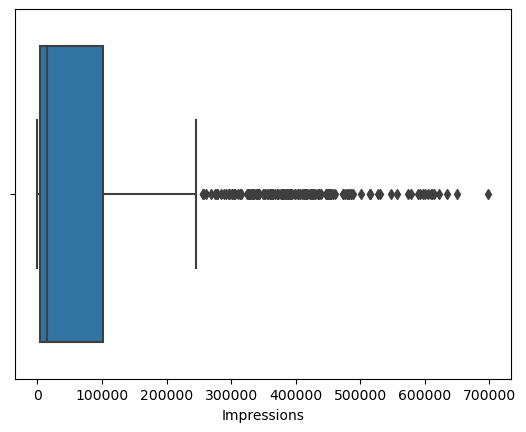

In [14]:
sns.boxplot(x="Impressions", data=googleads_performance)

<Axes: xlabel='Clicks'>

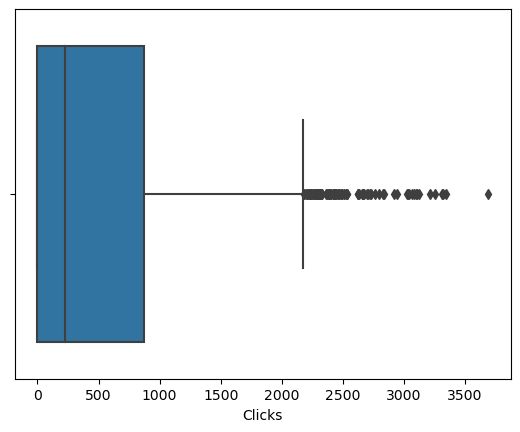

In [15]:
sns.boxplot(x="Clicks", data=googleads_performance)

<Axes: xlabel='Cost'>

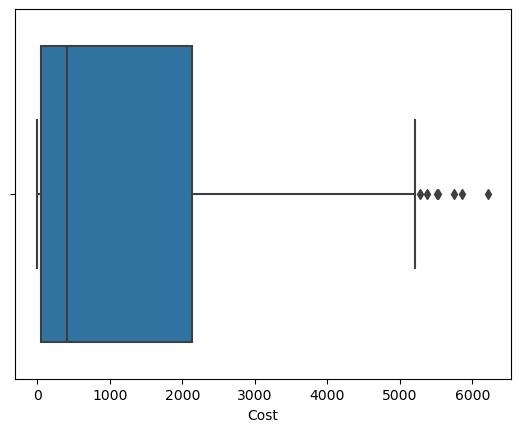

In [16]:
sns.boxplot(x="Cost", data=googleads_performance)

<Axes: xlabel='Conversions'>

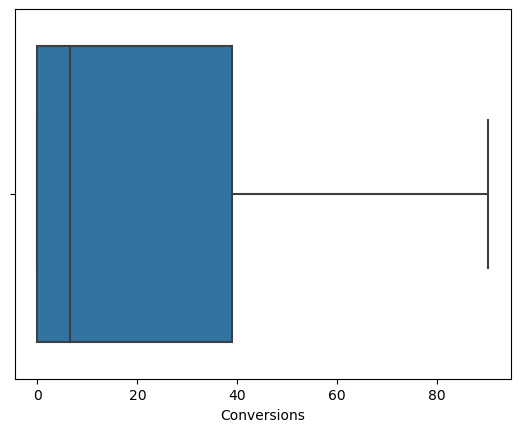

In [17]:
sns.boxplot(x="Conversions", data=googleads_performance)

<Axes: xlabel='Revenue'>

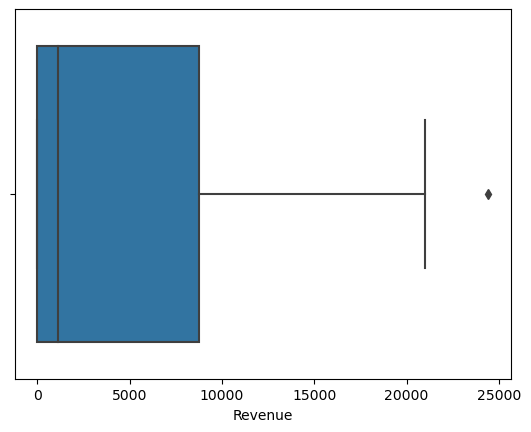

In [18]:
sns.boxplot(x="Revenue", data=googleads_performance)

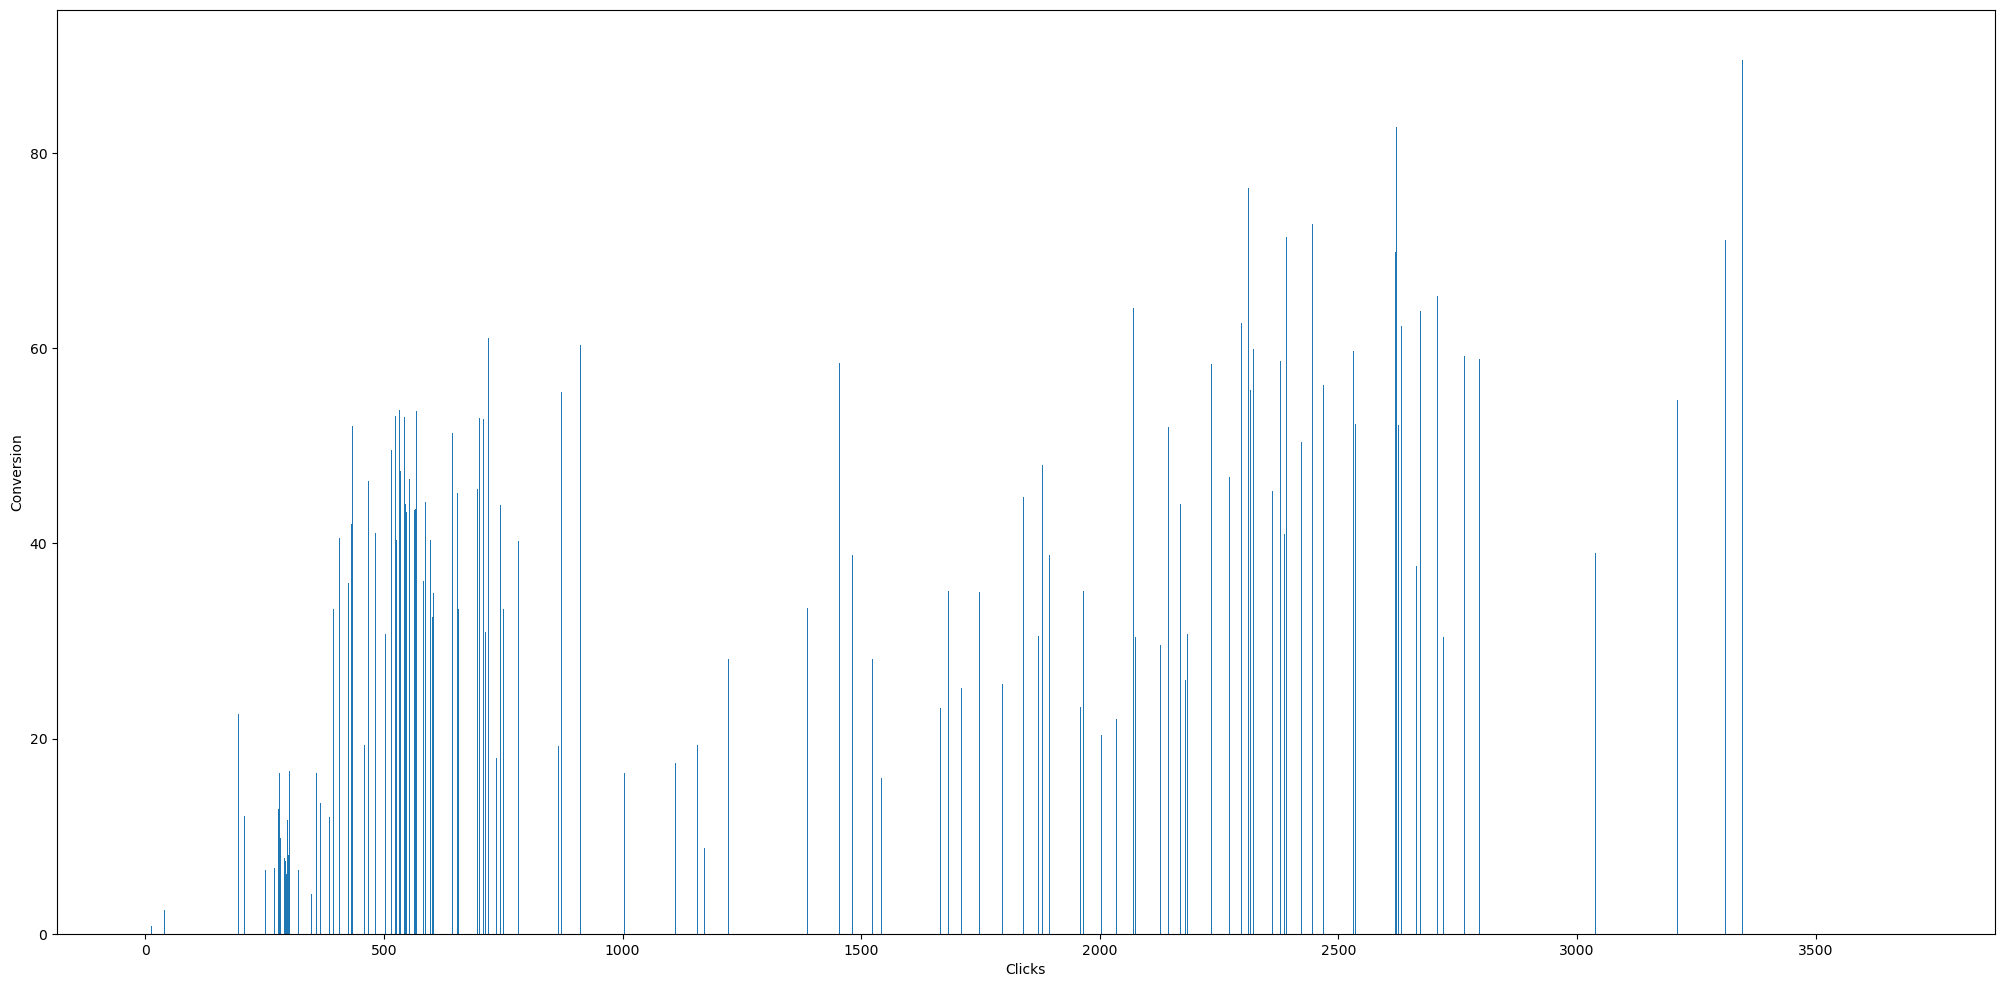

In [19]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Clicks'], googleads_performance['Conversions'])
plt.xlabel("Clicks")
plt.ylabel("Conversion")
plt.show()

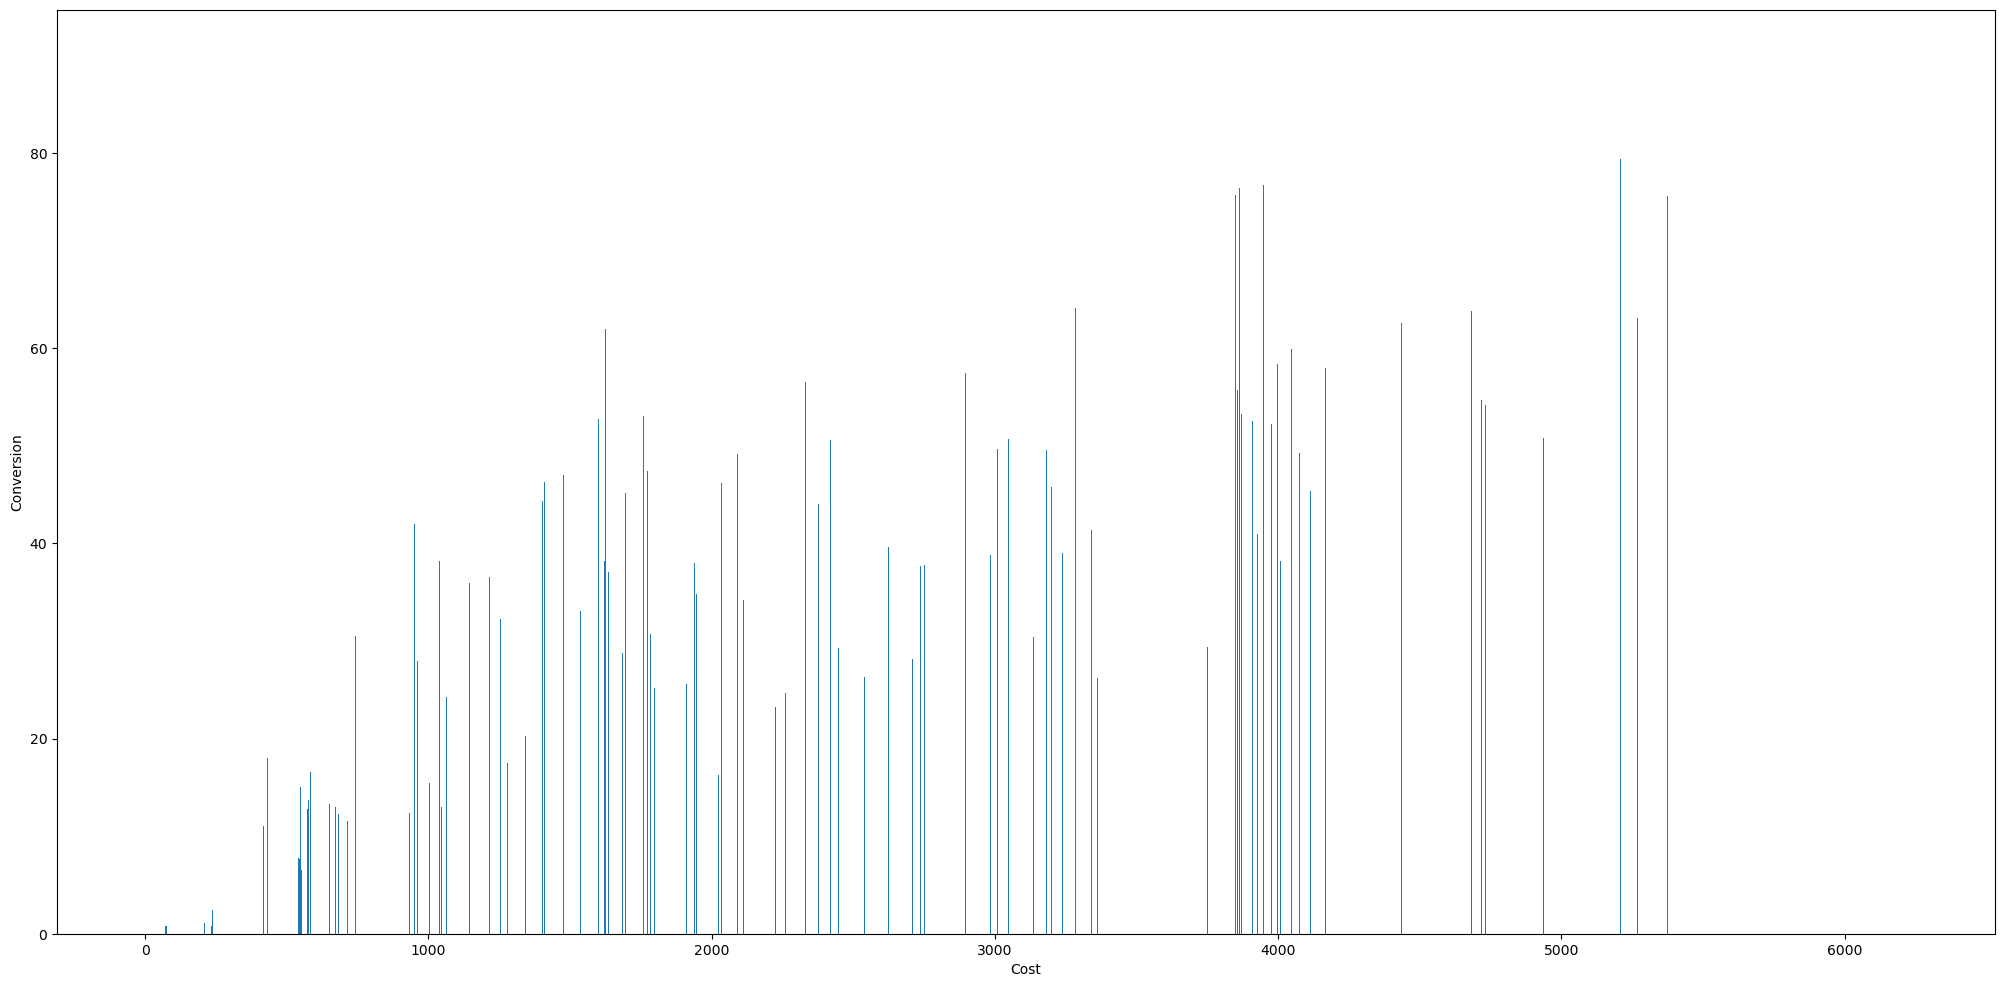

In [20]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Cost'], googleads_performance['Conversions'])
plt.xlabel("Cost")
plt.ylabel("Conversion")
plt.show()

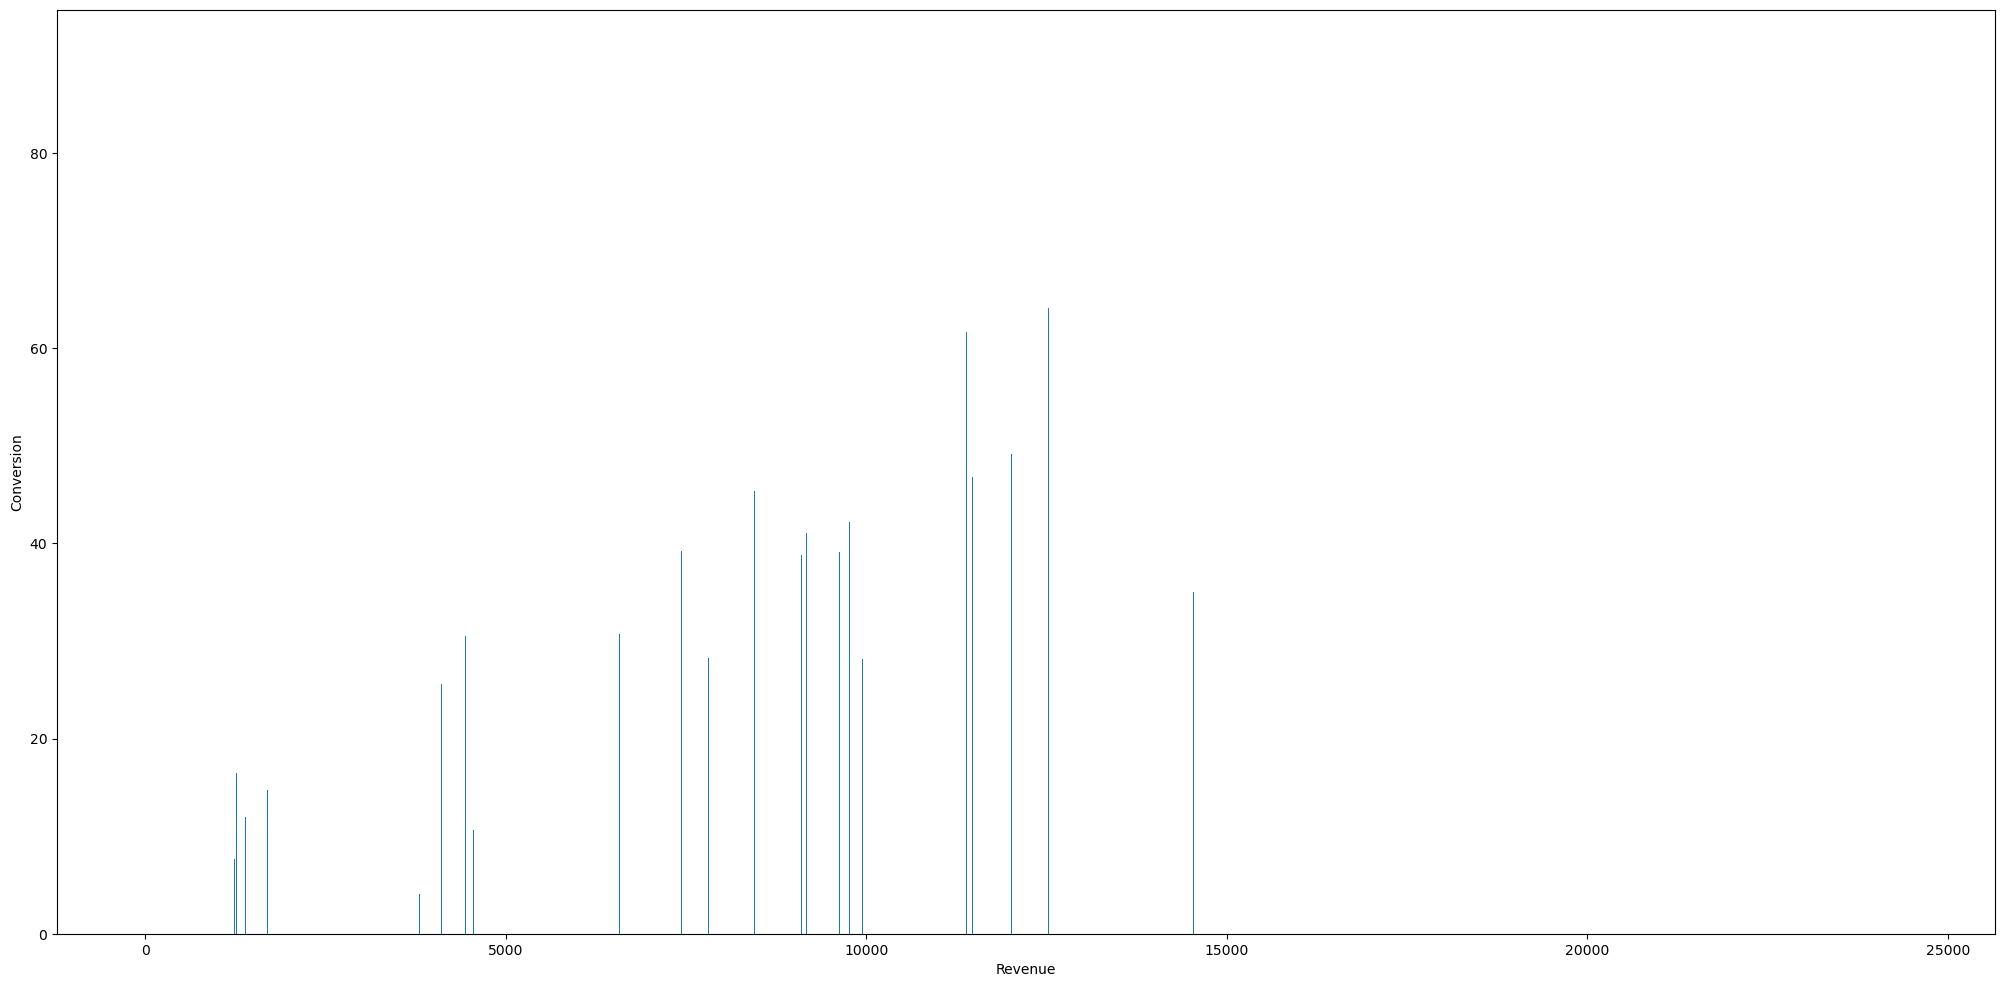

In [21]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Revenue'], googleads_performance['Conversions'])
plt.xlabel("Revenue")
plt.ylabel("Conversion")
plt.show()

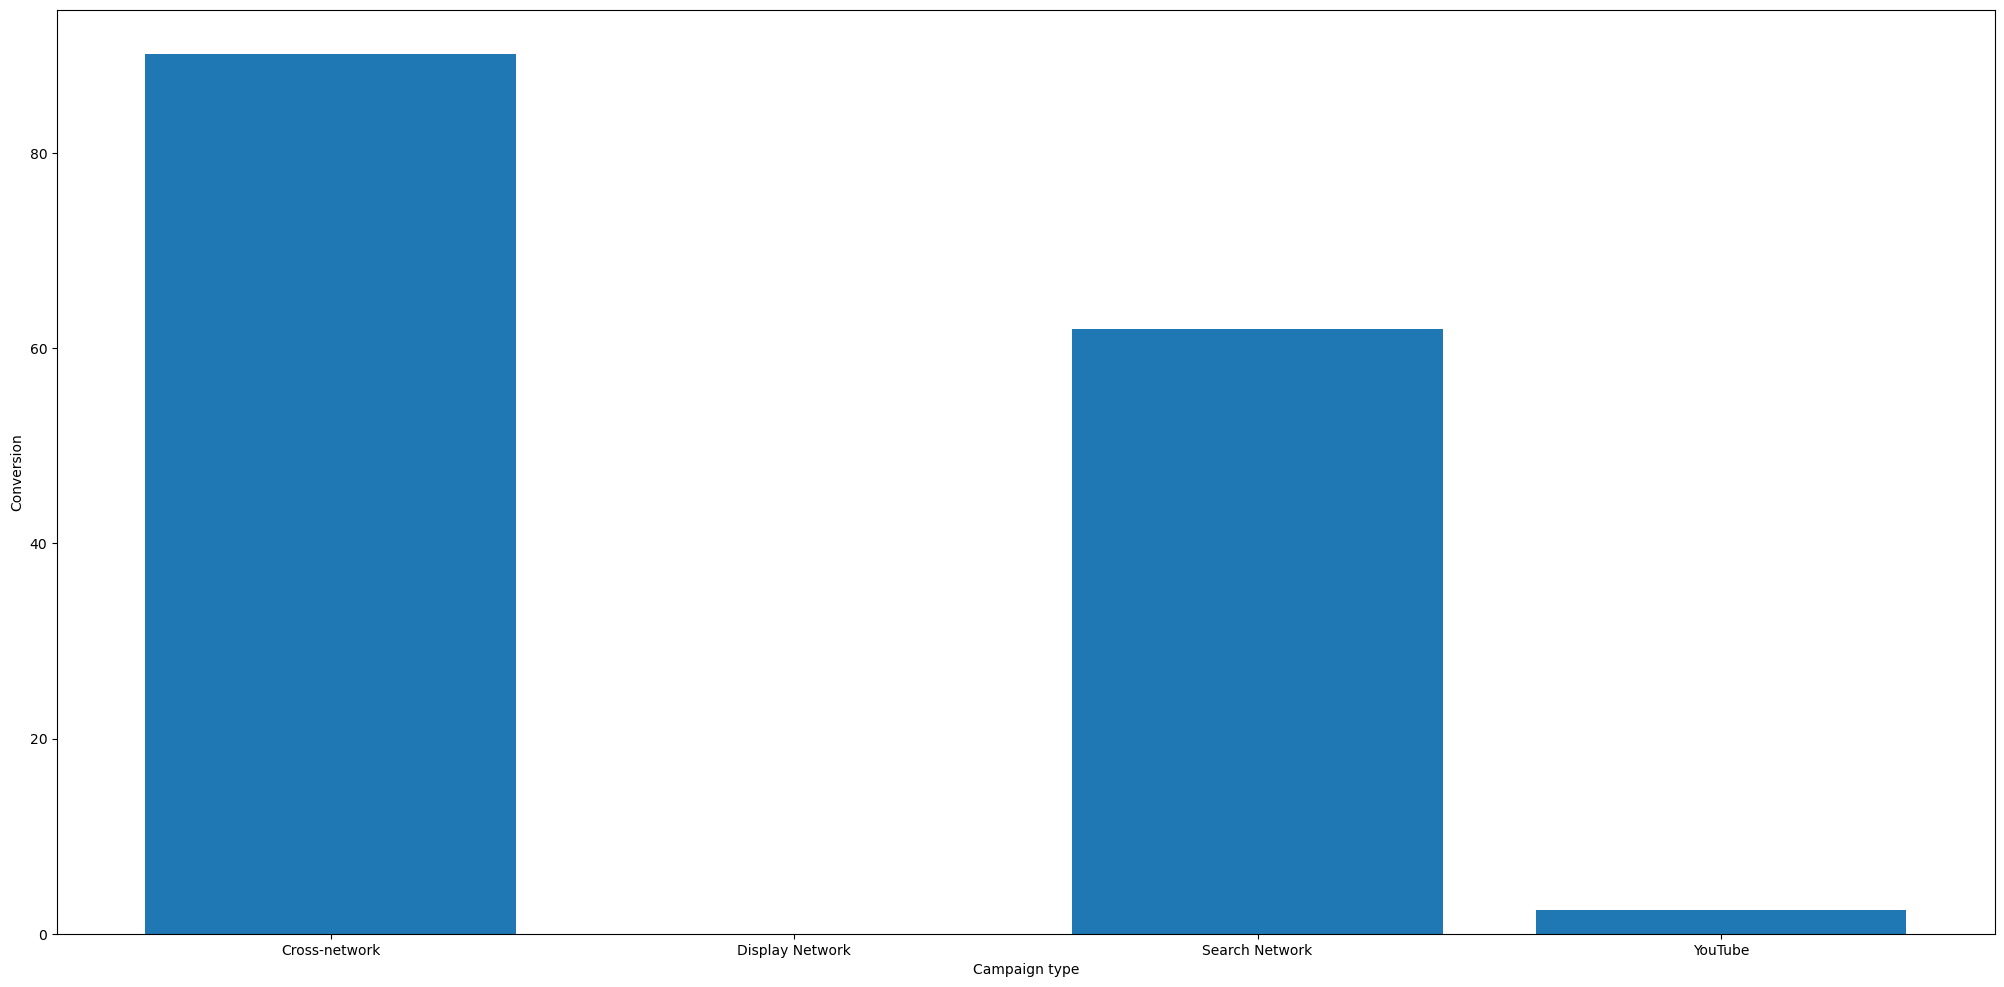

In [22]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Campaign type'], googleads_performance['Conversions'])
plt.xlabel("Campaign type")
plt.ylabel("Conversion")
plt.show()

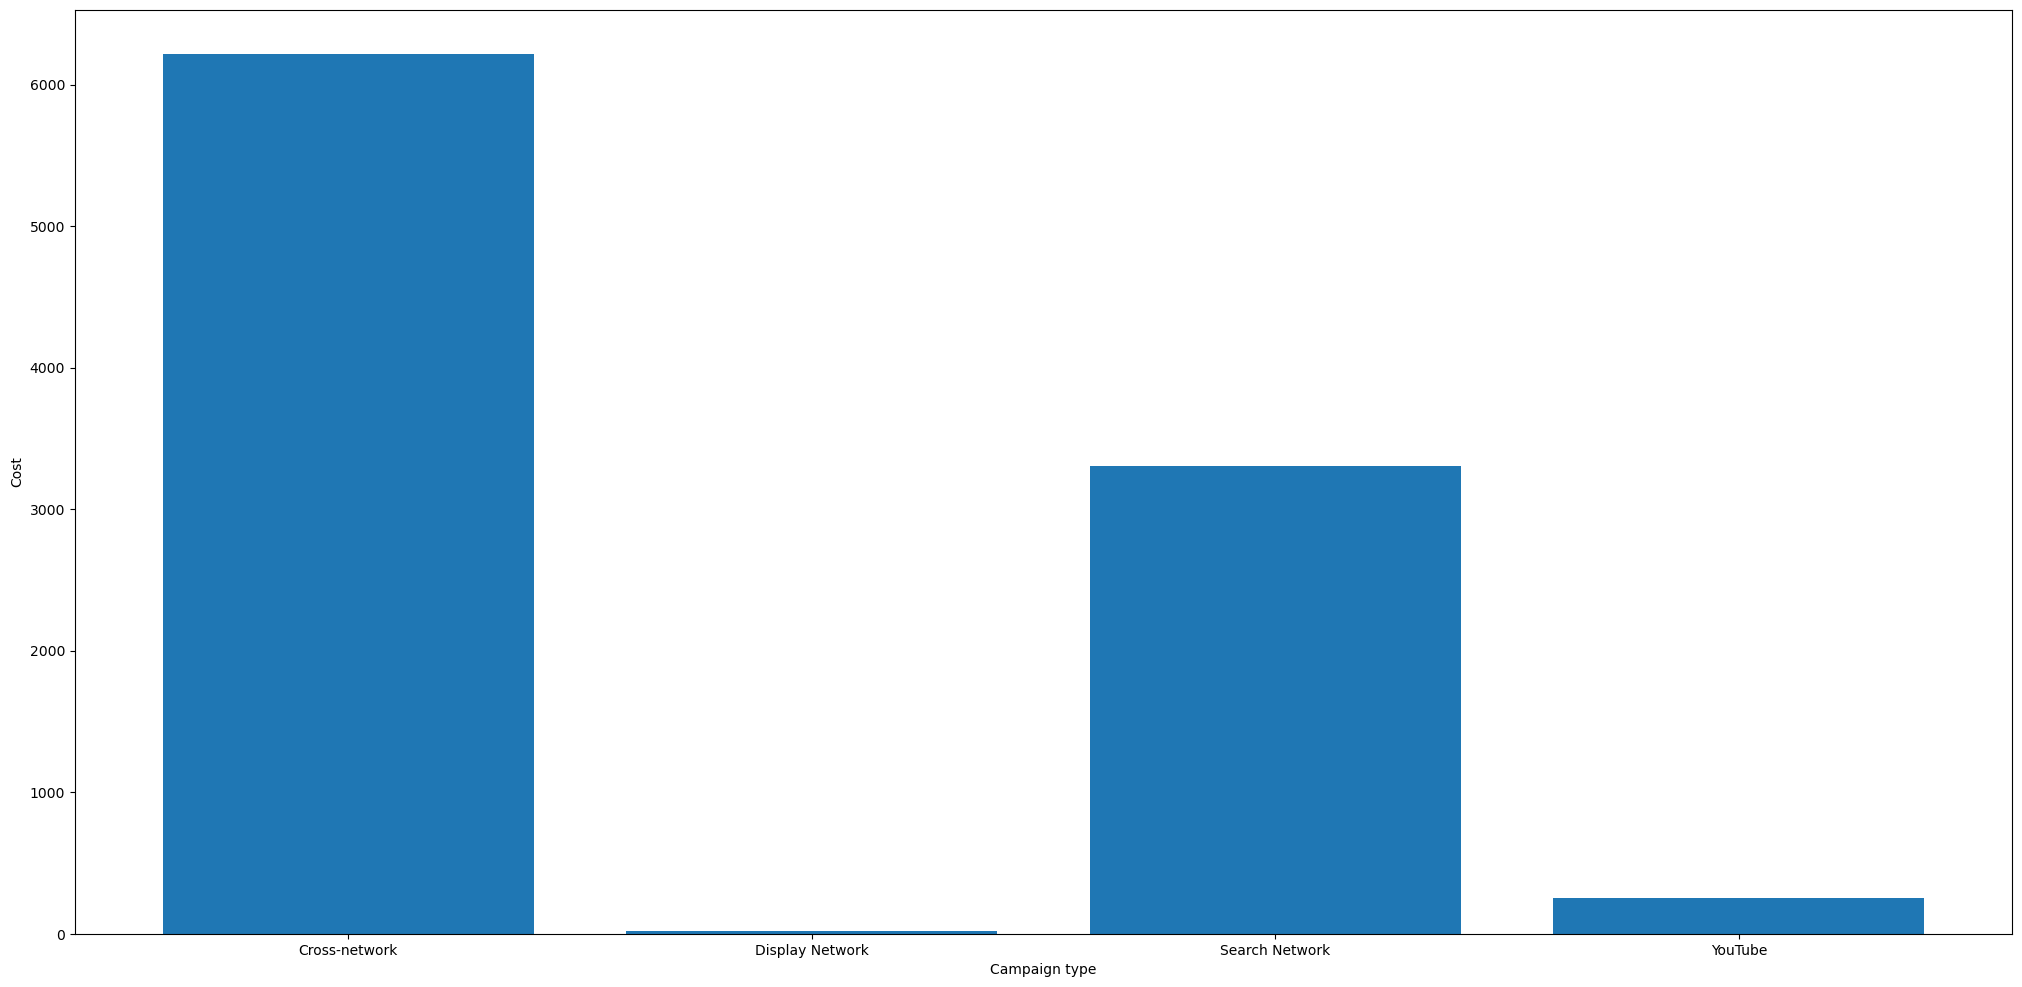

In [23]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Campaign type'], googleads_performance['Cost'])
plt.xlabel("Campaign type")
plt.ylabel("Cost")
plt.show()

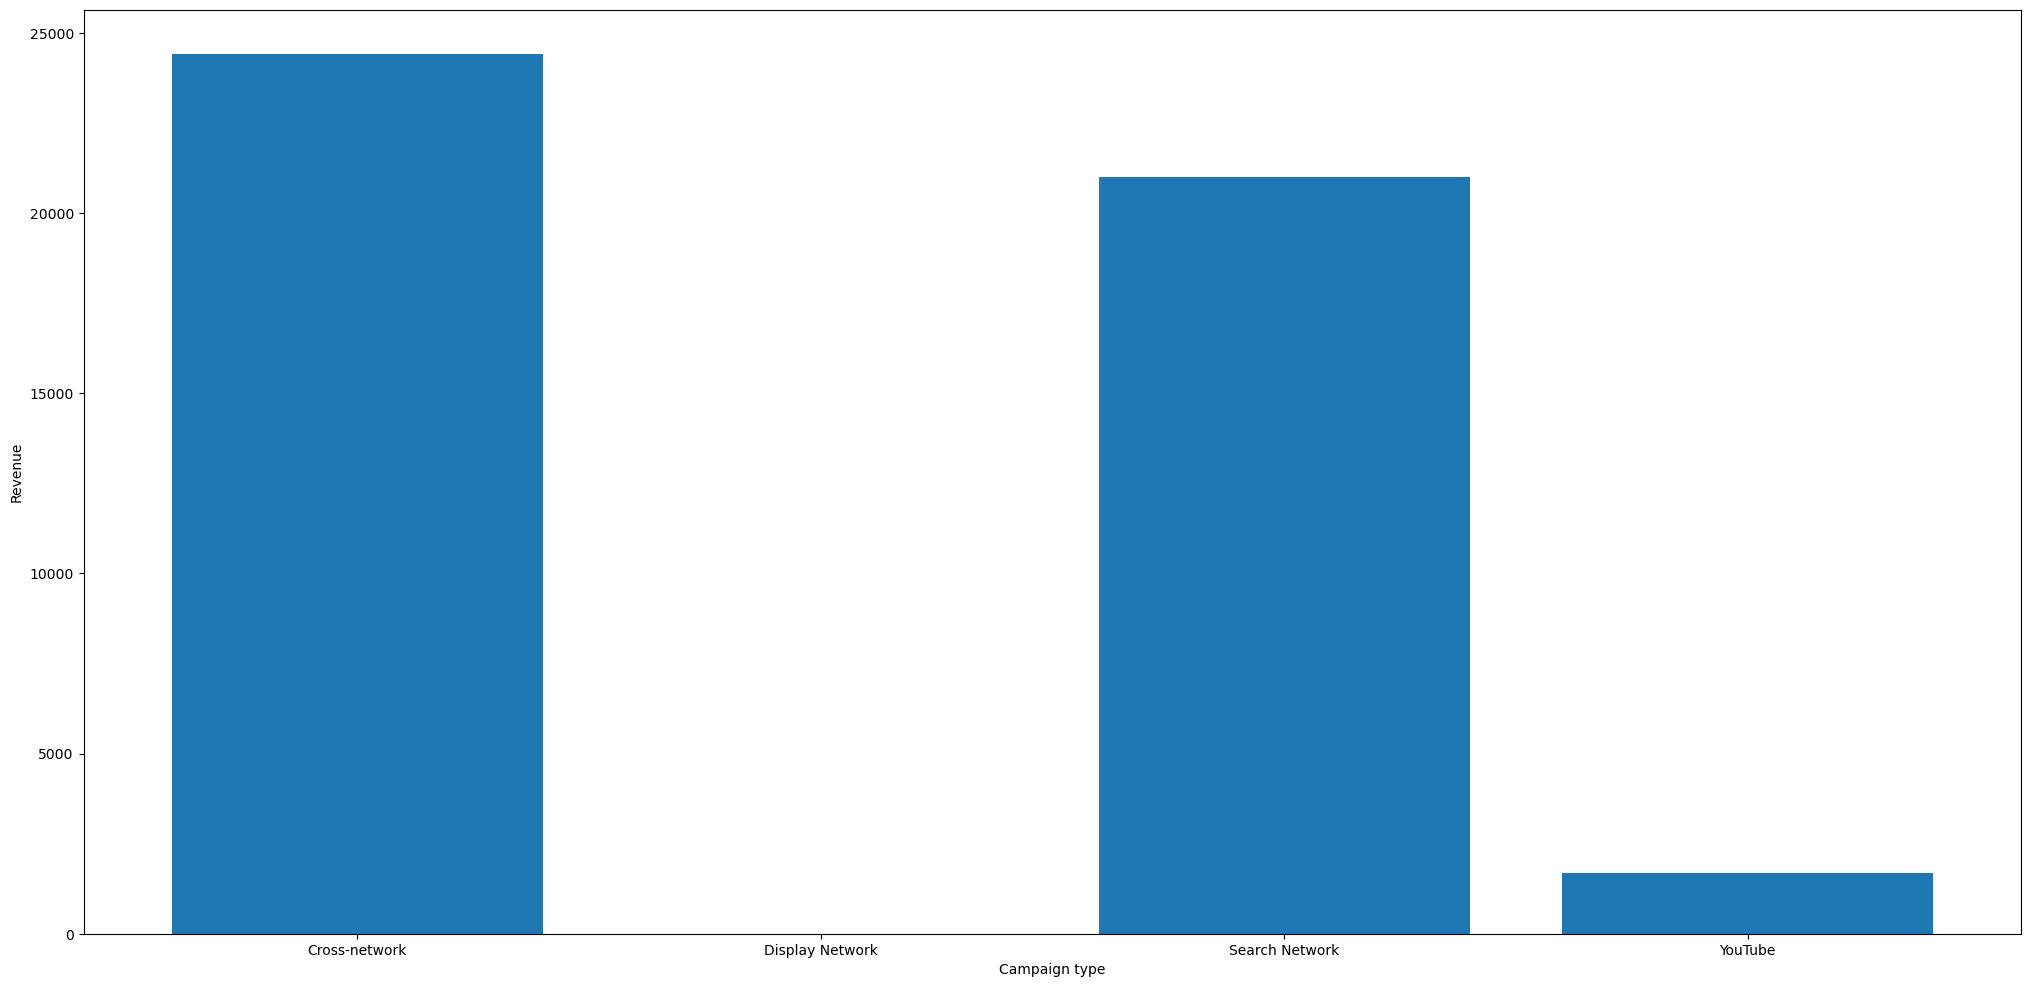

In [24]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Campaign type'], googleads_performance['Revenue'])
plt.xlabel("Campaign type")
plt.ylabel("Revenue")
plt.show()

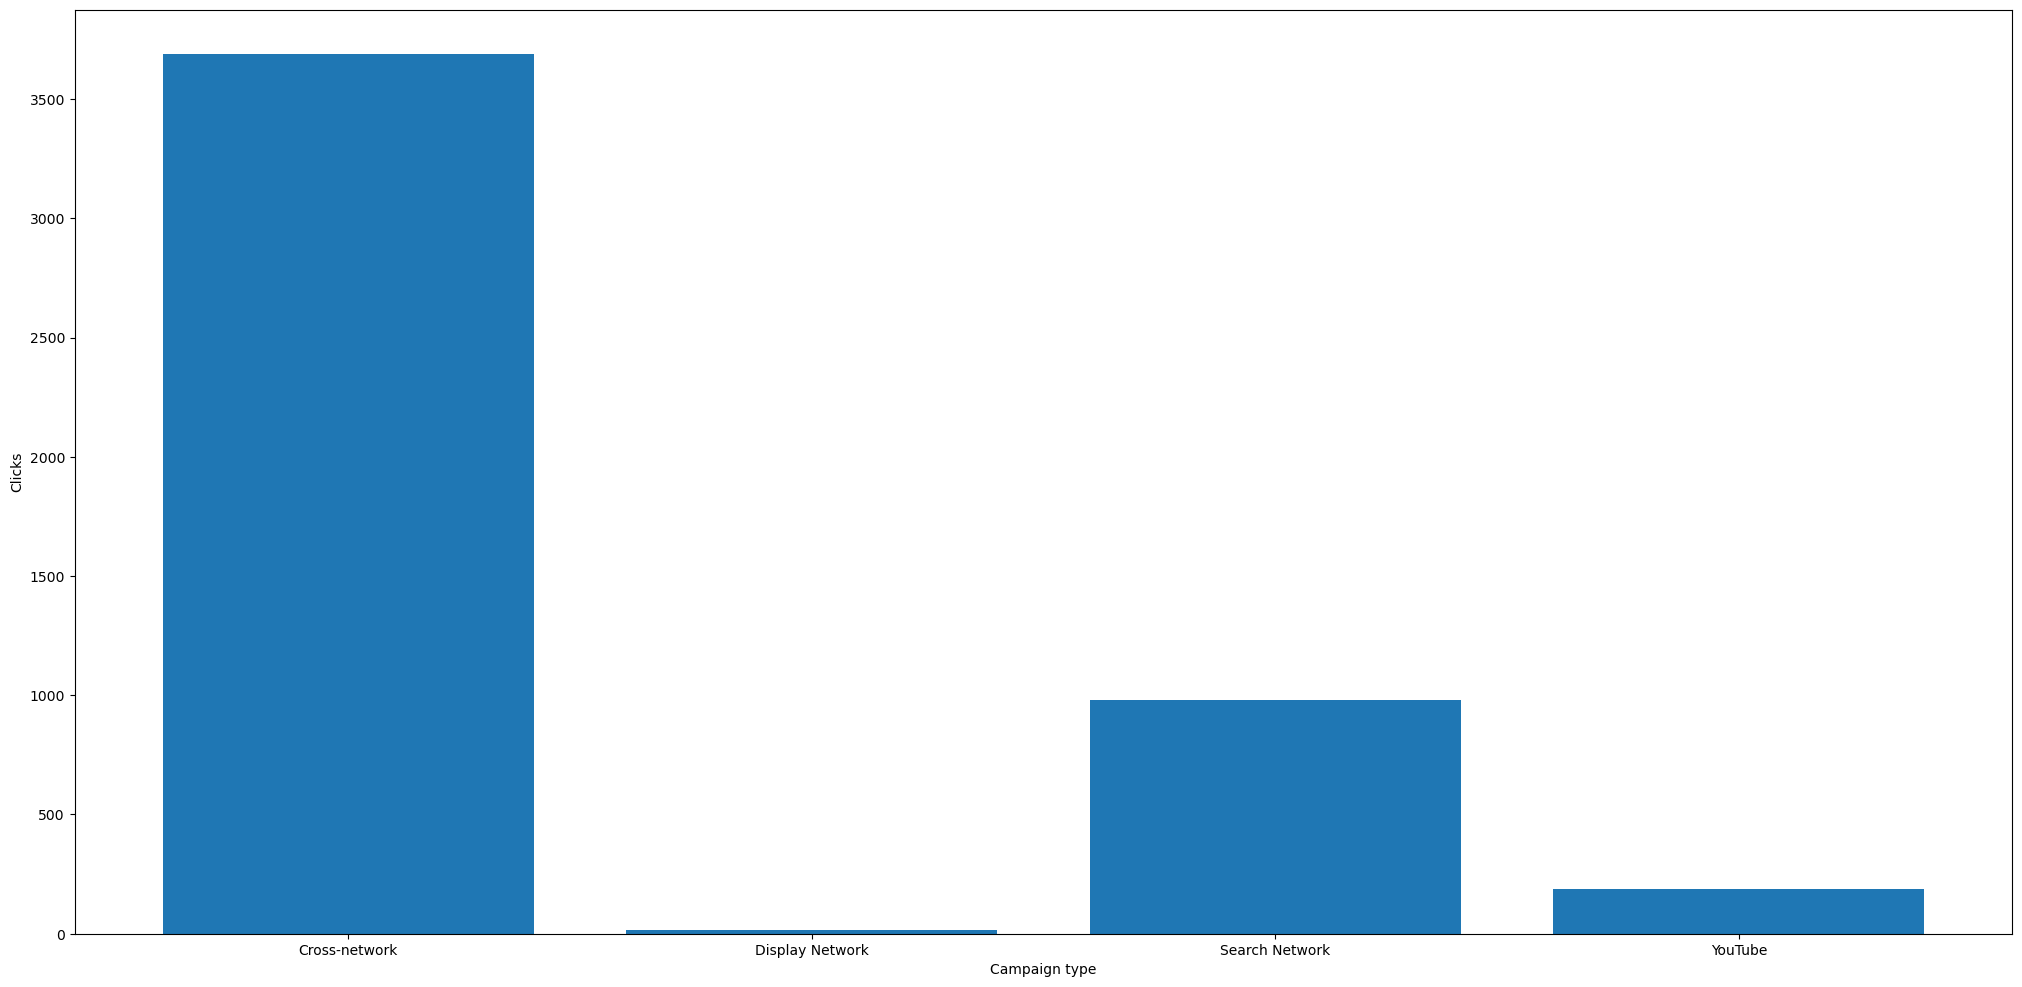

In [25]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Campaign type'], googleads_performance['Clicks'])
plt.xlabel("Campaign type")
plt.ylabel("Clicks")
plt.show()

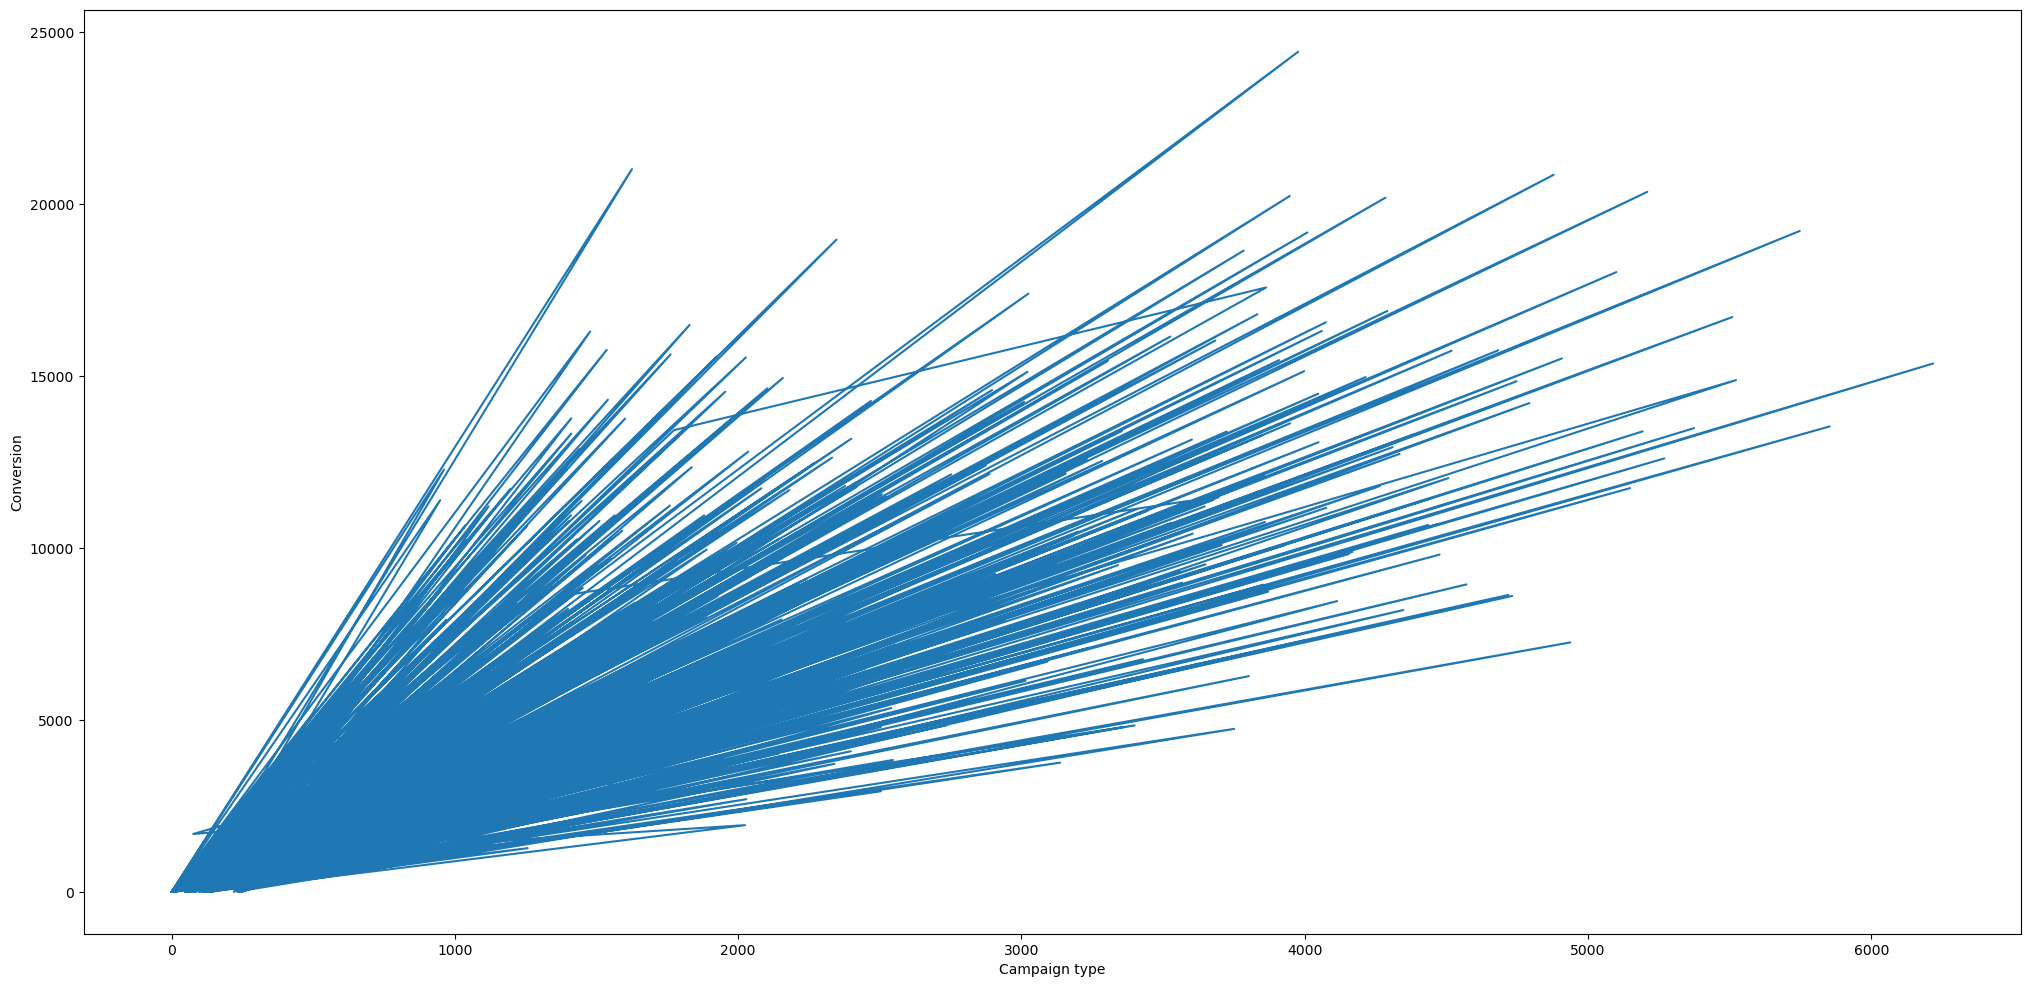

In [26]:
plt.figure(figsize=(25,12))
plt.plot(googleads_performance['Cost'], googleads_performance['Revenue'])
plt.xlabel("Campaign type")
plt.ylabel("Conversion")
plt.show()

In [27]:
corr=googleads_performance.corr()
corr.style.background_gradient(cmap="coolwarm")

C:\Users\nensi\AppData\Local\Temp\ipykernel_5428\1310118654.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=googleads_performance.corr()


,Impressions,Clicks,Cost,Conversions,Revenue
Impressions,1.000000,0.967694,0.873973,0.696888,0.620446
Clicks,0.967694,1.000000,0.950199,0.822688,0.751392
Cost,0.873973,0.950199,1.000000,0.915574,0.859976
Conversions,0.696888,0.822688,0.915574,1.000000,0.955837
Revenue,0.620446,0.751392,0.859976,0.955837,1.000000


<Axes: xlabel='Campaign type', ylabel='Cost'>

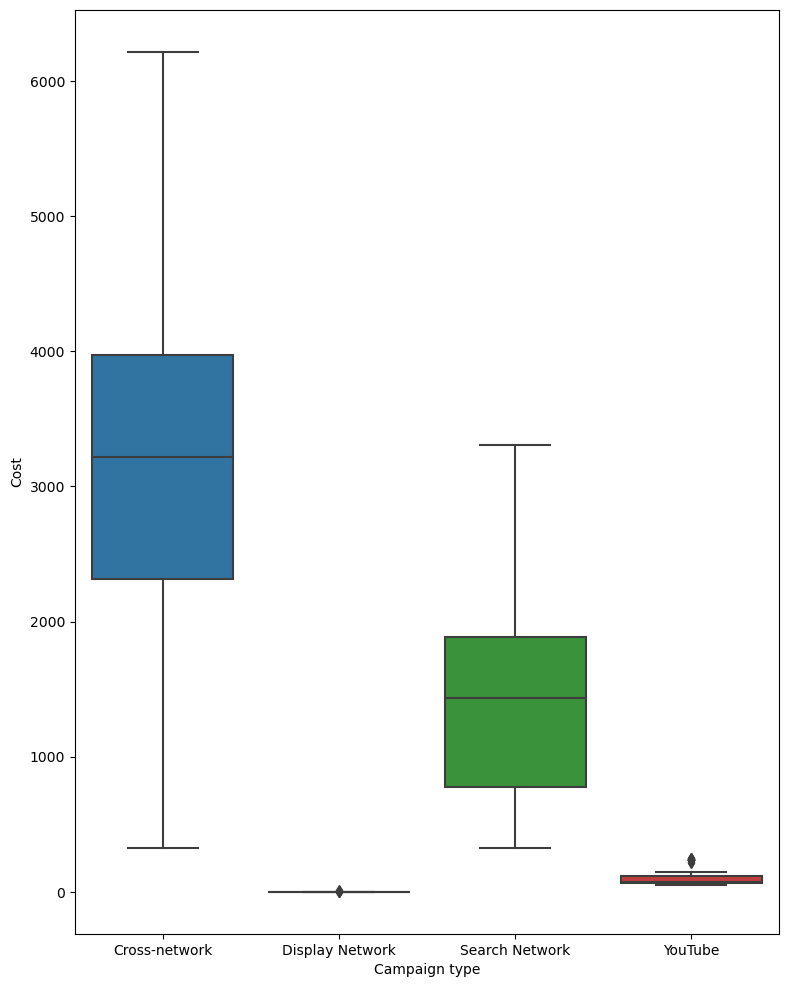

In [28]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Cost", data=googleads_performance)

<Axes: xlabel='Campaign type', ylabel='Conversions'>

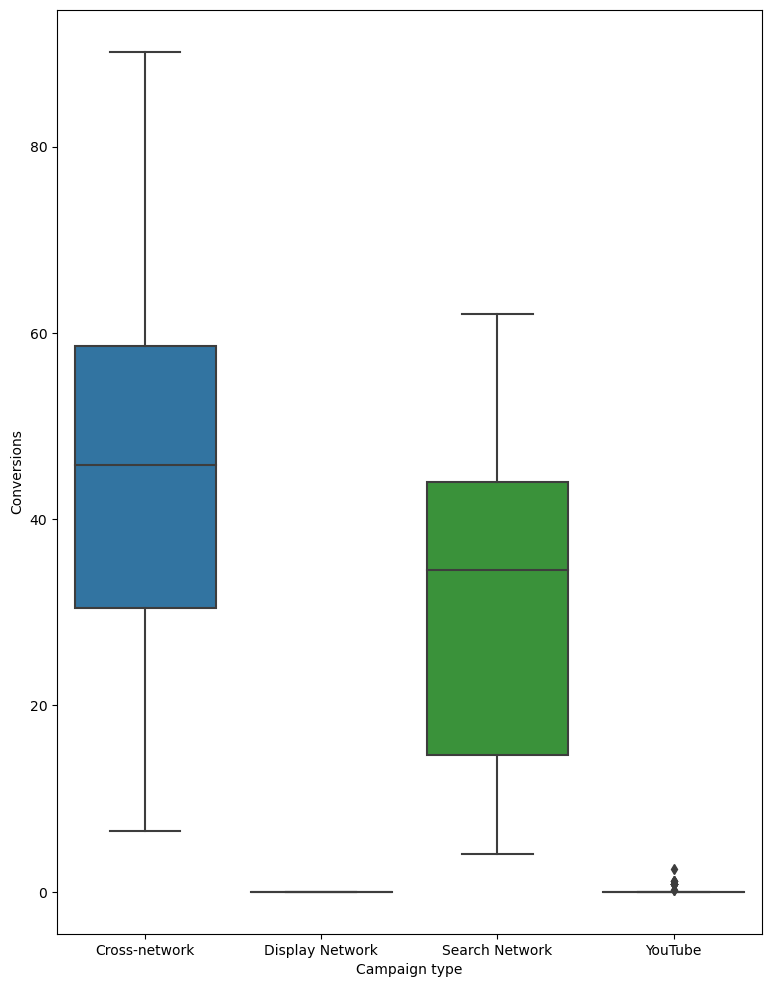

In [29]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Conversions", data=googleads_performance)

<Axes: xlabel='Campaign type', ylabel='Revenue'>

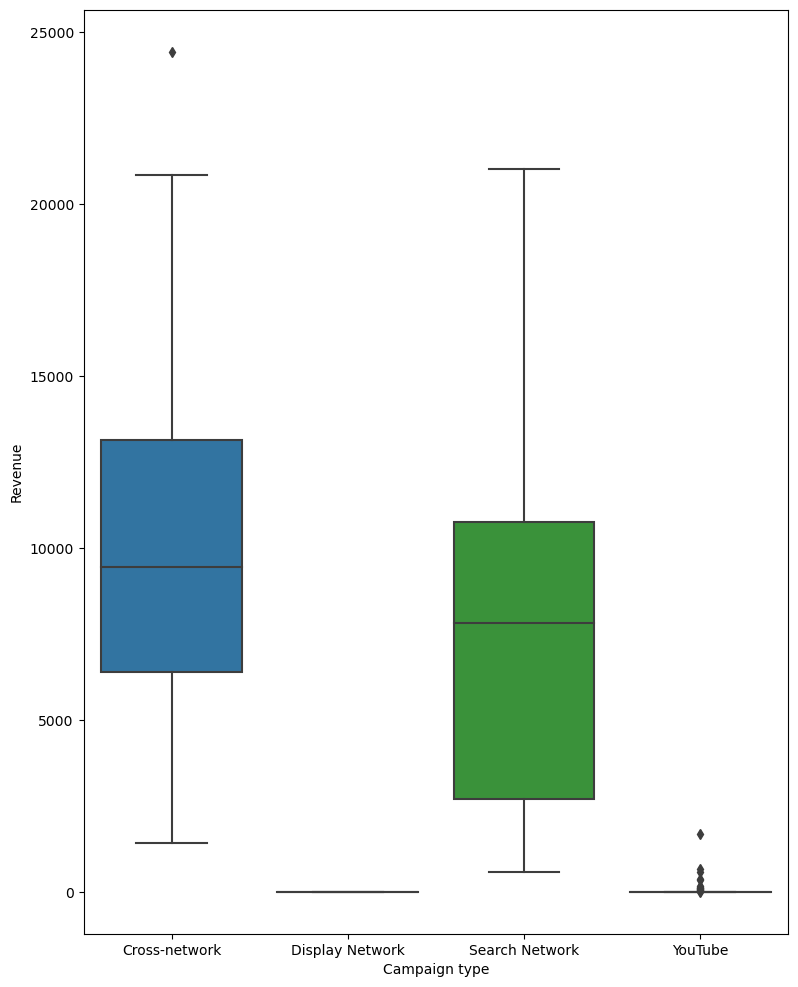

In [30]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Revenue", data=googleads_performance)

<Axes: xlabel='Campaign type', ylabel='Clicks'>

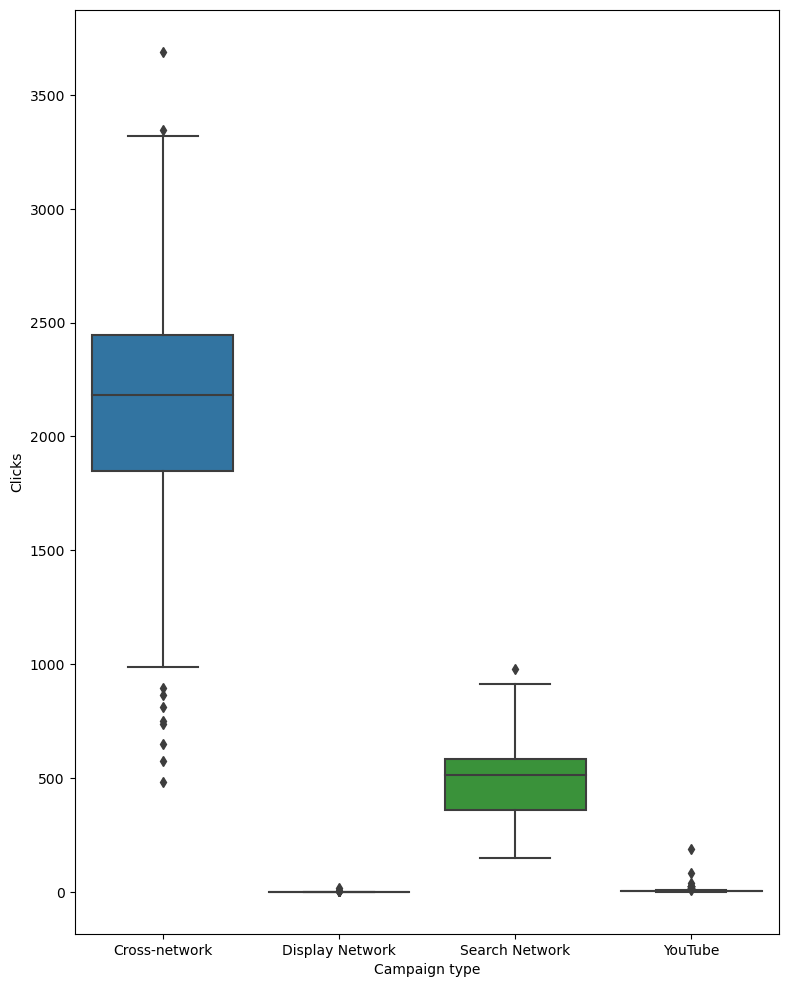

In [31]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Clicks", data=googleads_performance)

<Axes: xlabel='Campaign type', ylabel='Impressions'>

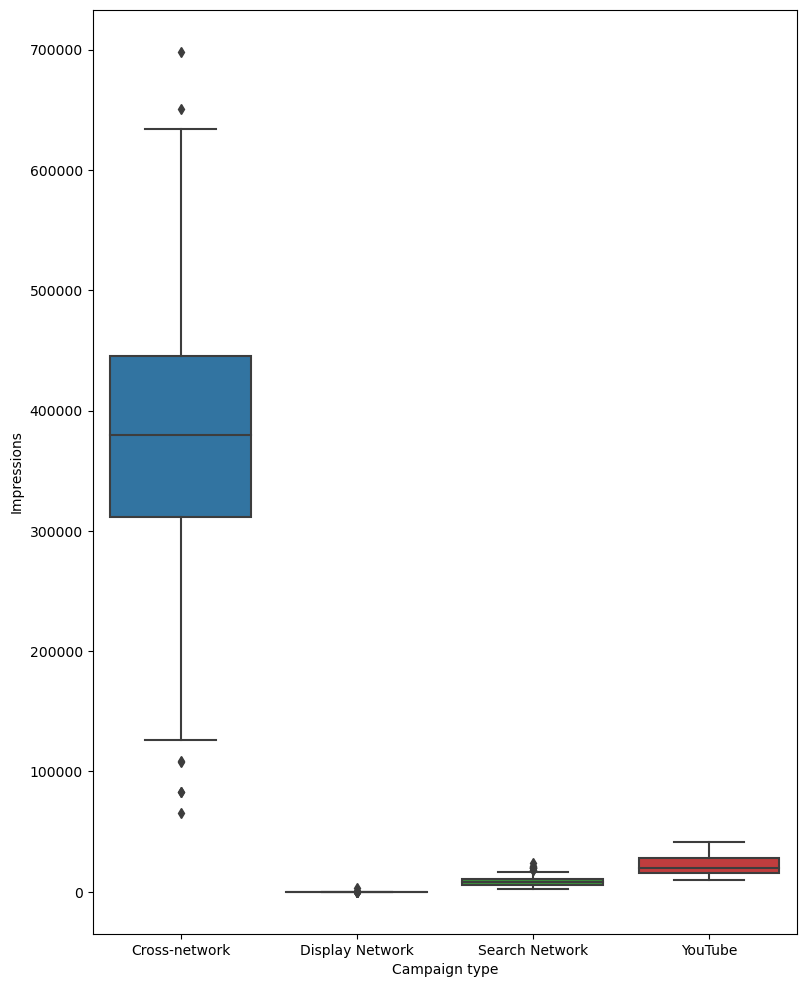

In [32]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Impressions", data=googleads_performance)

In [33]:
numeric_columns=["Impressions", "Clicks", "Cost", "Conversions", "Revenue"]

In [34]:
scaler=StandardScaler()
data_scaled=googleads_performance.copy()
data_scaled[numeric_columns]=scaler.fit_transform(googleads_performance[numeric_columns])
print(scaler.mean_)

[1.03249290e+05 6.68372549e+02 1.19440518e+03 1.95436975e+01
 4.38038992e+03]


In [35]:
googleads_performance_Impressions_Q1 = googleads_performance["Impressions"].quantile(0.25)
googleads_performance_Impressions_Q3 = googleads_performance["Impressions"].quantile(0.75)
googleads_performance_Impressions_iqr = googleads_performance_Impressions_Q3 - googleads_performance_Impressions_Q1

In [36]:
upper_googleads_performance_Impressions = googleads_performance_Impressions_Q3 + 1.5 * googleads_performance_Impressions_iqr
lower_googleads_performance_Impressions = googleads_performance_Impressions_Q1 - 1.5 * googleads_performance_Impressions_iqr

In [37]:
googleads_performance[googleads_performance['Impressions'] > upper_googleads_performance_Impressions]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
48,Cross-network,277964.0,1683.0,1605.1,35.1,7663.5
52,Cross-network,326220.0,1998.0,2028.4,22.6,2690.2
56,Cross-network,434756.0,2489.0,3604.6,64.6,10411.7
60,Cross-network,482605.0,2726.0,4215.0,63.2,14963.4
64,Cross-network,515359.0,2832.0,4682.9,63.8,15741.0
...,...,...,...,...,...,...
694,Cross-network,450557.0,2386.0,4347.9,47.0,8190.0
698,Cross-network,412470.0,2267.0,3750.8,29.4,4734.6
702,Cross-network,341972.0,1971.0,3020.9,45.6,15114.7
706,Cross-network,331972.0,2023.0,2339.7,20.5,3719.3


In [38]:
googleads_performance[googleads_performance['Impressions'] < lower_googleads_performance_Impressions]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [39]:
googleads_performance['Impressions'] = np.where(
    googleads_performance['Impressions'] > upper_googleads_performance_Impressions,
    upper_googleads_performance_Impressions,
    np.where(
    googleads_performance['Impressions'] < lower_googleads_performance_Impressions,
    lower_googleads_performance_Impressions, googleads_performance['Impressions']))

<Axes: xlabel='Impressions'>

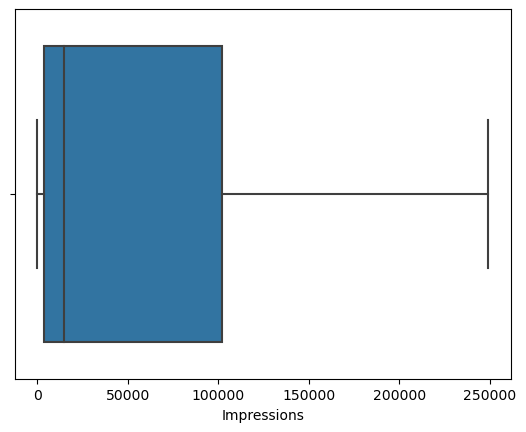

In [40]:
sns.boxplot(x="Impressions", data=googleads_performance)

In [41]:
googleads_performance_Clicks_Q1 = googleads_performance["Clicks"].quantile(0.25)
googleads_performance_Clicks_Q3 = googleads_performance["Clicks"].quantile(0.75)
googleads_performance_Clicks_iqr = googleads_performance_Clicks_Q3 - googleads_performance_Clicks_Q1

In [42]:
upper_googleads_performance_Clicks = googleads_performance_Clicks_Q3 + 1.5 * googleads_performance_Clicks_iqr
lower_googleads_performance_Clicks = googleads_performance_Clicks_Q1 - 1.5 * googleads_performance_Clicks_iqr

In [43]:
googleads_performance[googleads_performance['Clicks'] > upper_googleads_performance_Clicks]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
56,Cross-network,249230.75,2489.0,3604.6,64.6,10411.7
60,Cross-network,249230.75,2726.0,4215.0,63.2,14963.4
64,Cross-network,249230.75,2832.0,4682.9,63.8,15741.0
68,Cross-network,249230.75,2512.0,4009.5,59.2,19169.2
72,Cross-network,249230.75,2463.0,3707.0,54.4,10077.7
...,...,...,...,...,...,...
670,Cross-network,249230.75,2387.0,3927.0,41.0,13889.0
686,Cross-network,249230.75,2362.0,4114.4,45.4,8449.8
690,Cross-network,249230.75,2286.0,4008.7,38.2,7321.1
694,Cross-network,249230.75,2386.0,4347.9,47.0,8190.0


In [44]:
googleads_performance[googleads_performance['Clicks'] < lower_googleads_performance_Clicks]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [45]:
googleads_performance['Clicks'] = np.where(
    googleads_performance['Clicks'] > upper_googleads_performance_Clicks,
    upper_googleads_performance_Clicks,
    np.where(
    googleads_performance['Clicks'] < lower_googleads_performance_Clicks,
    lower_googleads_performance_Clicks, googleads_performance['Clicks']))

<Axes: xlabel='Clicks'>

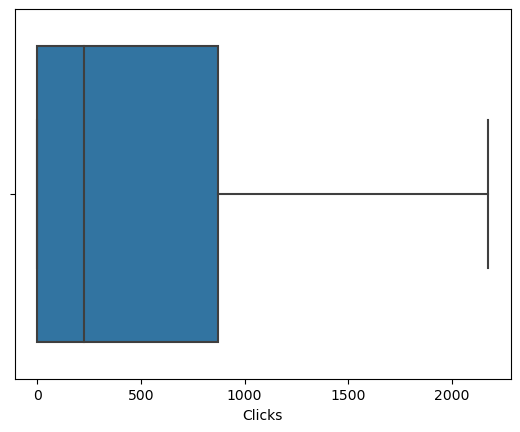

In [46]:
sns.boxplot(x="Clicks", data=googleads_performance)

In [47]:
googleads_performance_Cost_Q1 = googleads_performance["Cost"].quantile(0.25)
googleads_performance_Cost_Q3 = googleads_performance["Cost"].quantile(0.75)
googleads_performance_Cost_iqr = googleads_performance_Cost_Q3 - googleads_performance_Cost_Q1

In [48]:
upper_googleads_performance_Cost = googleads_performance_Cost_Q3 + 1.5 * googleads_performance_Cost_iqr
lower_googleads_performance_Cost = googleads_performance_Cost_Q1 - 1.5 * googleads_performance_Cost_iqr

In [49]:
googleads_performance[googleads_performance['Cost'] > upper_googleads_performance_Cost]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
116,Cross-network,249230.75,2176.875,5374.6,75.6,13479.2
120,Cross-network,249230.75,2176.875,6218.3,78.5,15357.7
139,Cross-network,249230.75,2176.875,5522.6,89.6,14875.3
147,Cross-network,249230.75,2176.875,5853.3,71.1,13528.5
151,Cross-network,249230.75,2176.875,5509.8,68.7,16710.0
155,Cross-network,249230.75,2176.875,5269.4,63.1,12598.0
167,Cross-network,249230.75,2176.875,5747.7,61.5,19212.0


In [50]:
googleads_performance[googleads_performance["Cost"] < lower_googleads_performance_Cost]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [51]:
googleads_performance['Cost'] = np.where(
    googleads_performance['Cost'] > upper_googleads_performance_Cost,
    upper_googleads_performance_Cost,
    np.where(
    googleads_performance['Cost'] < lower_googleads_performance_Cost,
    lower_googleads_performance_Cost, googleads_performance['Cost']))

<Axes: xlabel='Cost'>

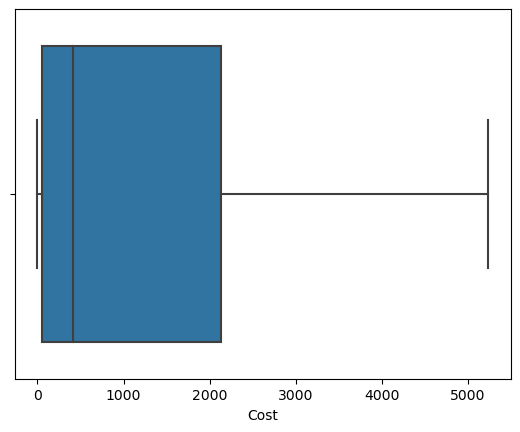

In [52]:
sns.boxplot(x="Cost", data=googleads_performance)

In [53]:
# Feature Engineering: Calculate conversion rates
googleads_performance['conversion_rate'] = googleads_performance['Conversions'] / googleads_performance['Clicks']

In [54]:
# Display summary statistics
googleads_performance.describe()

,Impressions,Clicks,Cost,Conversions,Revenue,conversion_rate
count,714.000000,714.000000,714.000000,714.000000,714.000000,535.000000
mean,68658.037115,619.535714,1190.430742,19.543697,4380.389916,inf
std,101418.505233,821.518570,1446.022182,23.106973,5466.346579,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3614.500000,0.000000,54.600000,0.000000,0.000000,0.000000
50%,14576.500000,225.500000,414.850000,6.500000,1126.150000,0.024254
75%,101861.000000,870.750000,2127.500000,38.975000,8763.650000,0.051148
max,249230.750000,2176.875000,5236.850000,90.200000,24422.700000,inf


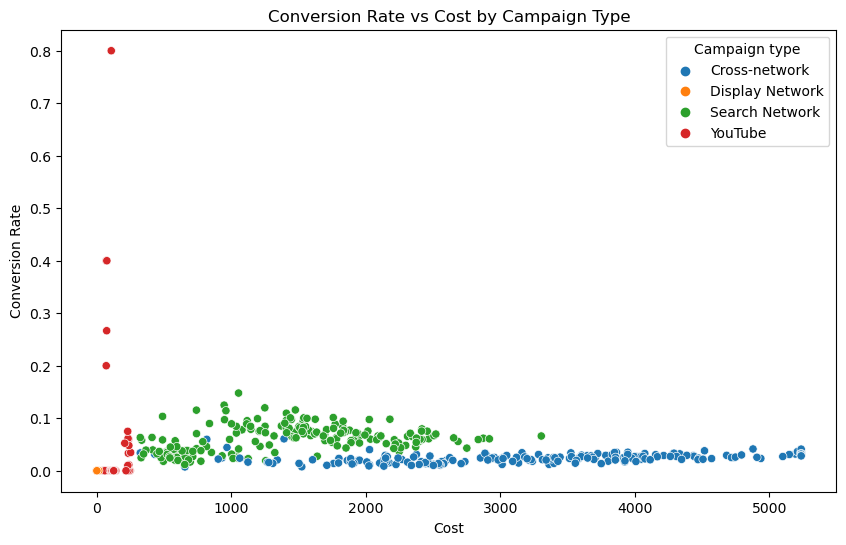

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cost', y='conversion_rate', hue='Campaign type', data=googleads_performance)
plt.title('Conversion Rate vs Cost by Campaign Type')
plt.xlabel('Cost')
plt.ylabel('Conversion Rate')
plt.show()

In [56]:
# Define features (X) and target (y)
X = googleads_performance[['Cost', 'Impressions', 'Clicks']]
y = googleads_performance['Conversions']

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict conversions on the test set
y_pred = model.predict(X_test)

In [60]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [61]:
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 6.31221726599088
R2 Score: 0.8345427714843536


In [62]:
# Group by Campaign type to get conversion and cost data
campaign_performance = googleads_performance.groupby('Campaign type').agg({
    'Cost': 'sum',
    'Conversions': 'sum'
}).reset_index()
campaign_performance

,Campaign type,Cost,Conversions
0,Cross-network,574497.65,8219.3
1,Display Network,57.60,0.0
2,Search Network,258220.70,5720.6
3,YouTube,17191.60,14.3


In [63]:
# Initialize parameters
n_campaigns = len(campaign_performance)  # Number of campaign types
total_budget = 200000  # Total budget to allocate
min_budget = 0.1 * total_budget  # Minimum budget allocation to each campaign
campaign_performance['Allocated Budget'] = min_budget  # Initialize with minimum budget

In [64]:
# Define Epsilon-Greedy parameters
epsilon = 0.1  # Exploration probability
n_rounds = 100  # Number of rounds (iterations) for budget allocation

In [65]:
# Track total conversions and budget allocated
total_conversions = 0
allocated_budgets = np.zeros(n_campaigns)

In [66]:
# Multi-Armed Bandit - Epsilon-Greedy Algorithm
for _ in range(n_rounds):
    # Exploration vs Exploitation
    if random.random() < epsilon:
        # Exploration: Randomly select a campaign
        campaign_index = random.randint(0, n_campaigns - 1)
    else:
        # Exploitation: Select the campaign with the best conversion rate
        conversion_rates = campaign_performance['Conversions'] / campaign_performance['Cost']
        campaign_index = np.argmax(conversion_rates)

    # Allocate a small portion of the remaining budget to the selected campaign
    remaining_budget = total_budget - campaign_performance['Allocated Budget'].sum()
    budget_to_allocate = remaining_budget / (n_rounds - _)

    campaign_performance.loc[campaign_index, 'Allocated Budget'] += budget_to_allocate

    # Update the total conversions
    conversion_rate = campaign_performance.loc[campaign_index, 'Conversions'] / campaign_performance.loc[campaign_index, 'Cost']
    total_conversions += conversion_rate * budget_to_allocate

In [67]:
# Print the final budget allocation and estimated conversions
print(campaign_performance[['Campaign type', 'Allocated Budget']])
print(f"Total Estimated Conversions: {total_conversions:.2f}")

     Campaign type  Allocated Budget
0    Cross-network           22400.0
1  Display Network           21200.0
2   Search Network          134000.0
3          YouTube           22400.0
Total Estimated Conversions: 2561.88


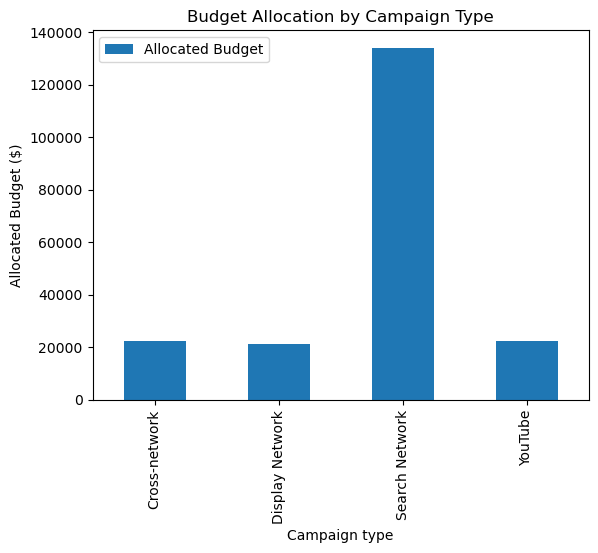

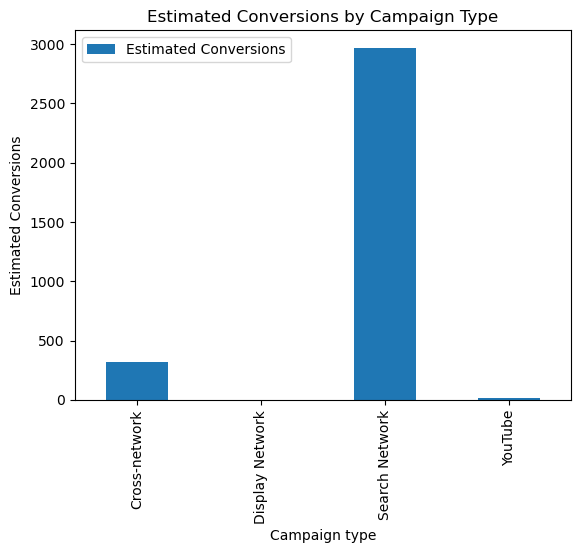

In [68]:
# Plot Allocated Budget vs. Campaign Type
campaign_performance.plot(kind='bar', x='Campaign type', y='Allocated Budget', title='Budget Allocation by Campaign Type')
plt.ylabel('Allocated Budget ($)')
plt.show()

# Plot Estimated Conversions vs. Campaign Type
campaign_performance['Estimated Conversions'] = campaign_performance['Allocated Budget'] * (campaign_performance['Conversions'] / campaign_performance['Cost'])
campaign_performance.plot(kind='bar', x='Campaign type', y='Estimated Conversions', title='Estimated Conversions by Campaign Type')
plt.ylabel('Estimated Conversions')
plt.show()


# 2. MetaAds Performance

In [69]:
metaads_performance = pd.read_csv("metaads-performance.csv")
metaads_performance

,Date,Impressions,Reach,Cost,Clicks,Conversions,Revenue
0,2024-01-01,36034.0,27263.0,209.1,608.0,4.0,158.2
1,2024-01-02,30804.0,22648.0,204.9,516.0,11.0,1412.8
2,2024-01-03,26372.0,18947.0,198.7,429.0,4.0,371.5
3,2024-01-04,17354.0,11436.0,131.2,324.0,4.0,0.0
4,2024-01-05,12036.0,7921.0,114.0,224.0,2.0,0.0
...,...,...,...,...,...,...,...
177,2024-06-26,13392.0,7448.0,110.9,148.0,15.0,3196.5
178,2024-06-27,13092.0,7244.0,109.7,161.0,17.0,4032.7
179,2024-06-28,13678.0,7779.0,106.7,165.0,22.0,6409.1
180,2024-06-29,17855.0,10665.0,115.4,273.0,4.0,649.7


In [70]:
metaads_performance.head()

,Date,Impressions,Reach,Cost,Clicks,Conversions,Revenue
0,2024-01-01,36034.0,27263.0,209.1,608.0,4.0,158.2
1,2024-01-02,30804.0,22648.0,204.9,516.0,11.0,1412.8
2,2024-01-03,26372.0,18947.0,198.7,429.0,4.0,371.5
3,2024-01-04,17354.0,11436.0,131.2,324.0,4.0,0.0
4,2024-01-05,12036.0,7921.0,114.0,224.0,2.0,0.0


In [71]:
metaads_performance.tail()

,Date,Impressions,Reach,Cost,Clicks,Conversions,Revenue
177,2024-06-26,13392.0,7448.0,110.9,148.0,15.0,3196.5
178,2024-06-27,13092.0,7244.0,109.7,161.0,17.0,4032.7
179,2024-06-28,13678.0,7779.0,106.7,165.0,22.0,6409.1
180,2024-06-29,17855.0,10665.0,115.4,273.0,4.0,649.7
181,2024-06-30,19402.0,11267.0,119.7,261.0,9.0,1536.7


In [72]:
metaads_performance.shape

(182, 7)

In [73]:
metaads_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         182 non-null    object 
 1   Impressions  182 non-null    float64
 2   Reach        182 non-null    float64
 3   Cost         182 non-null    float64
 4   Clicks       182 non-null    float64
 5   Conversions  182 non-null    float64
 6   Revenue      182 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.1+ KB


In [74]:
metaads_performance.columns

Index(['Date', 'Impressions', 'Reach', 'Cost', 'Clicks', 'Conversions',
       'Revenue'],
      dtype='object')

In [75]:
metaads_performance.describe()

,Impressions,Reach,Cost,Clicks,Conversions,Revenue
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,15710.483516,10706.549451,108.128571,254.164835,15.357143,2738.712637
std,4276.750942,3191.183957,34.980520,84.927628,14.458129,3049.637405
min,7024.000000,4724.000000,62.800000,96.000000,0.000000,0.000000
25%,12885.250000,8376.000000,82.775000,188.000000,4.000000,433.650000
50%,15307.500000,10443.000000,104.950000,242.500000,9.000000,1859.500000
75%,17921.750000,11844.500000,115.375000,309.750000,24.000000,3985.475000
max,36034.000000,27263.000000,223.600000,608.000000,71.000000,19098.600000


In [76]:
metaads_performance.describe(include="object")

,Date
count,182
unique,182
top,2024-01-01
freq,1


In [77]:
metaads_performance.isnull()

,Date,Impressions,Reach,Cost,Clicks,Conversions,Revenue
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
177,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False
179,False,False,False,False,False,False,False
180,False,False,False,False,False,False,False


In [78]:
metaads_performance.isnull().sum()

Date           0
Impressions    0
Reach          0
Cost           0
Clicks         0
Conversions    0
Revenue        0
dtype: int64

<Axes: xlabel='Impressions'>

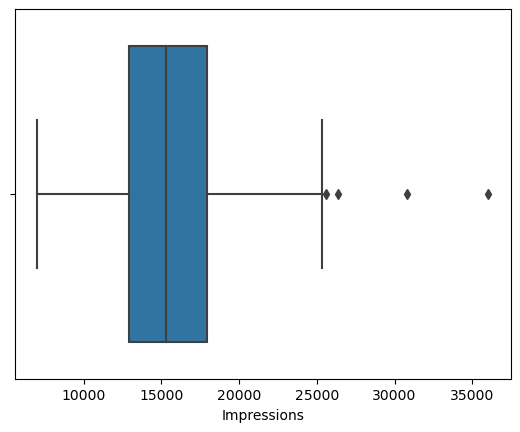

In [79]:
sns.boxplot(x="Impressions", data=metaads_performance)

<Axes: xlabel='Reach'>

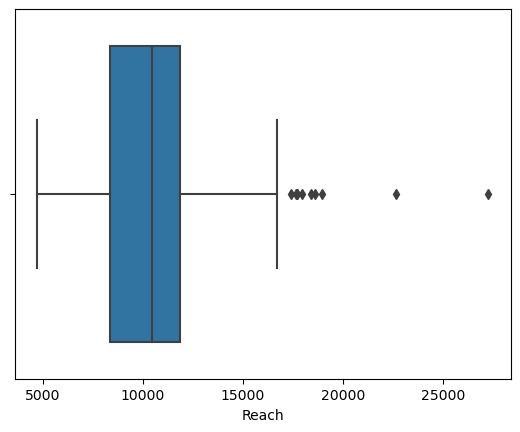

In [80]:
sns.boxplot(x="Reach", data=metaads_performance)

<Axes: xlabel='Cost'>

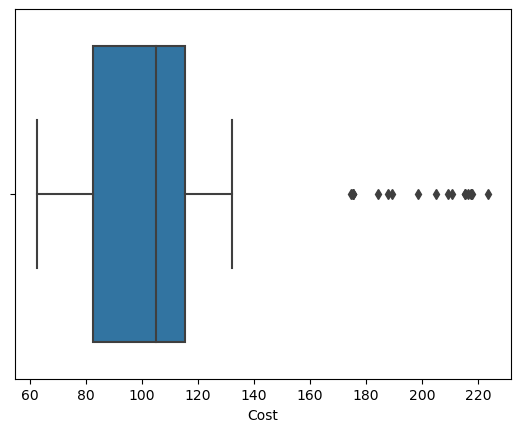

In [81]:
sns.boxplot(x="Cost", data=metaads_performance)

<Axes: xlabel='Clicks'>

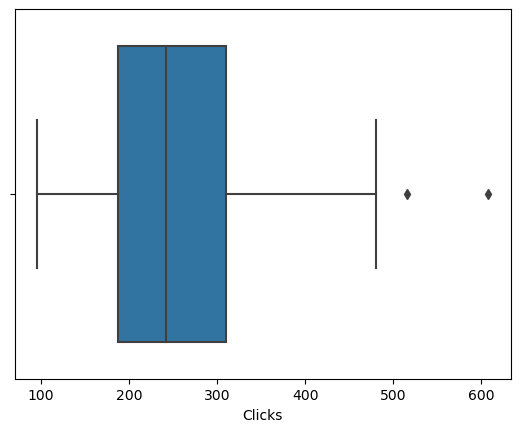

In [82]:
sns.boxplot(x="Clicks", data=metaads_performance)

<Axes: xlabel='Conversions'>

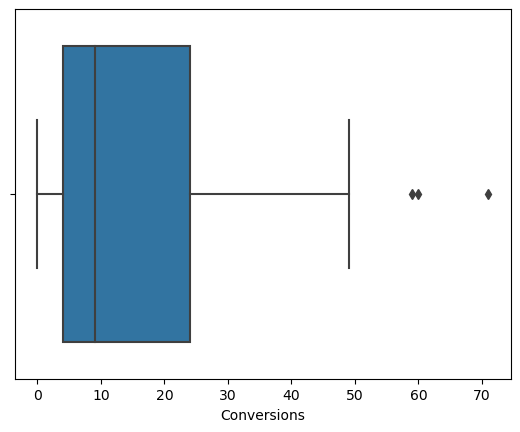

In [83]:
sns.boxplot(x="Conversions", data=metaads_performance)

<Axes: xlabel='Revenue'>

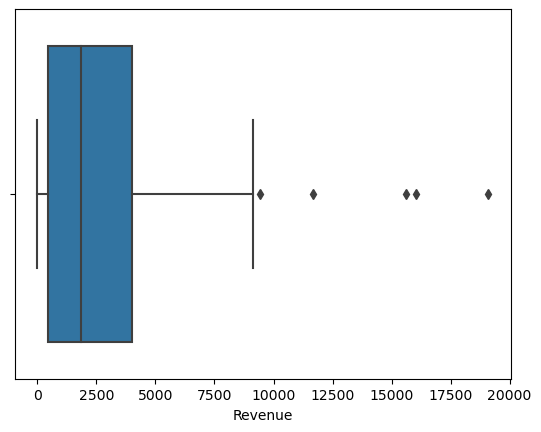

In [84]:
sns.boxplot(x="Revenue", data=metaads_performance)

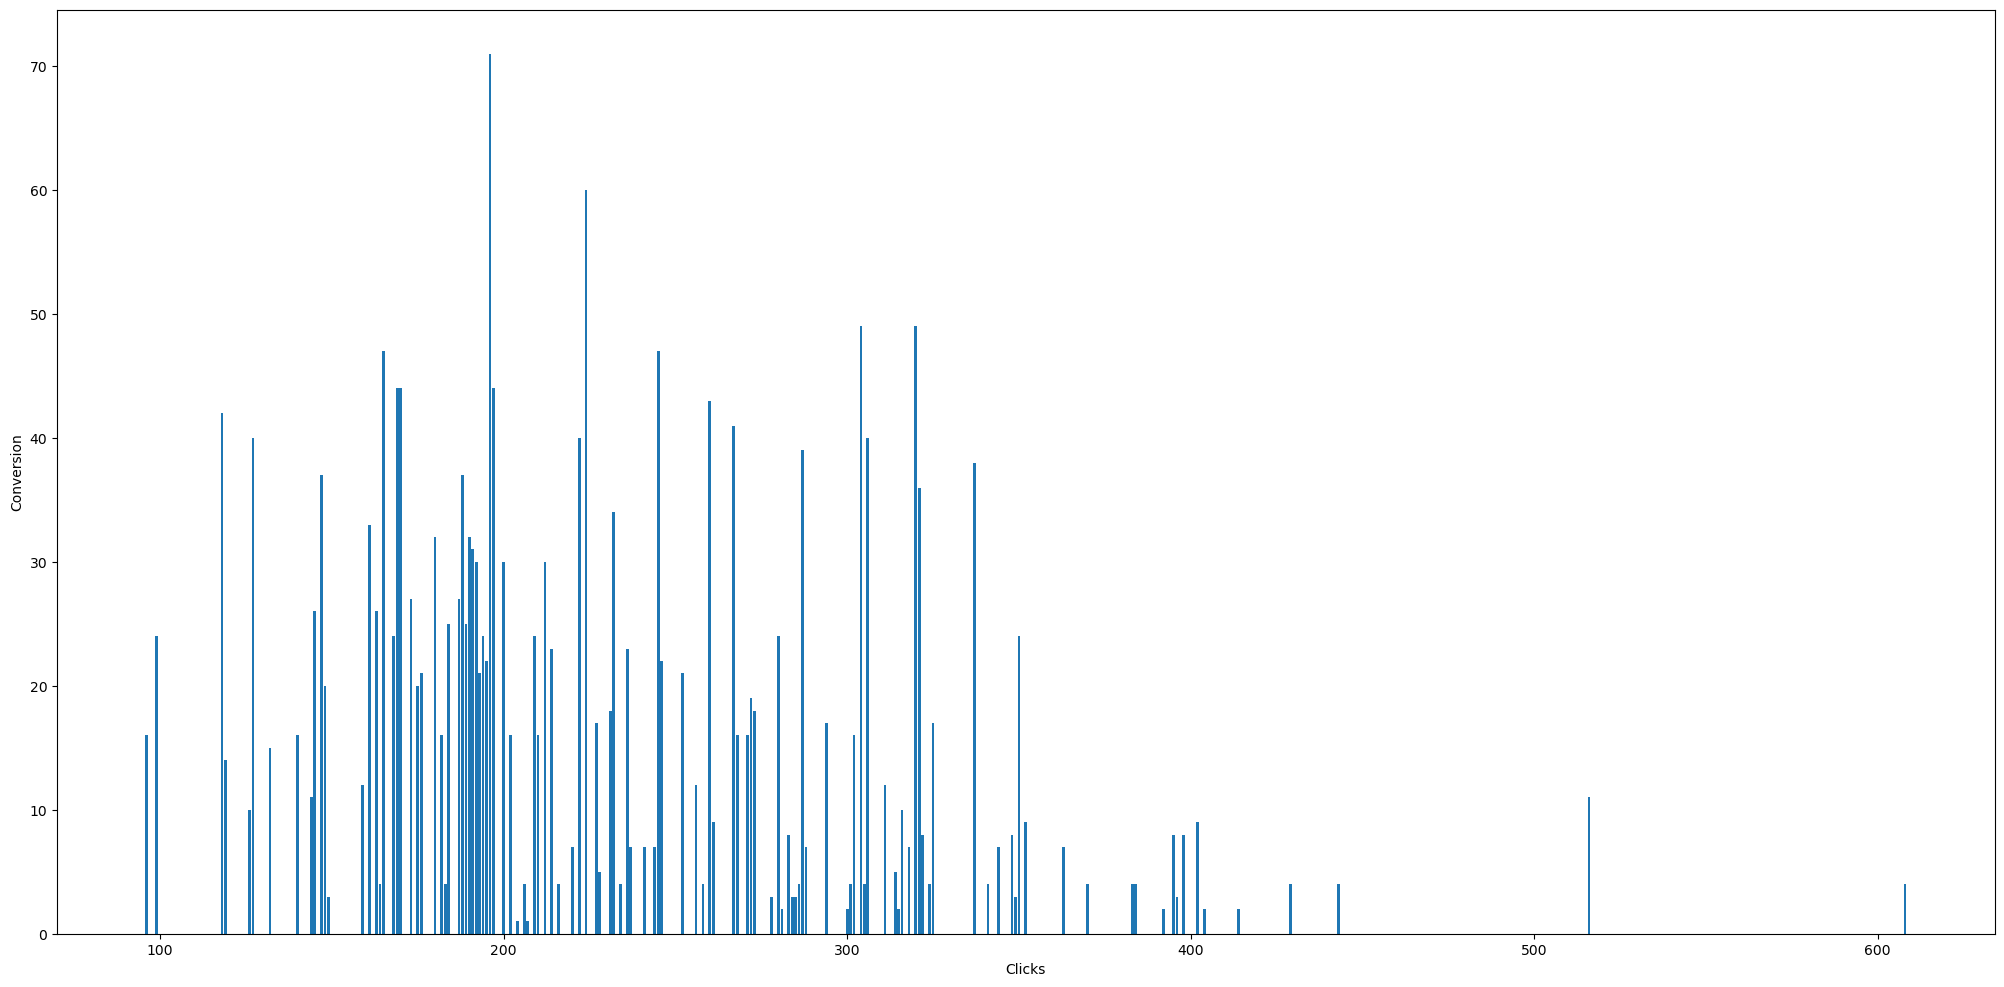

In [85]:
plt.figure(figsize=(25,12))
plt.bar(metaads_performance['Clicks'], metaads_performance['Conversions'])
plt.xlabel("Clicks")
plt.ylabel("Conversion")
plt.show()

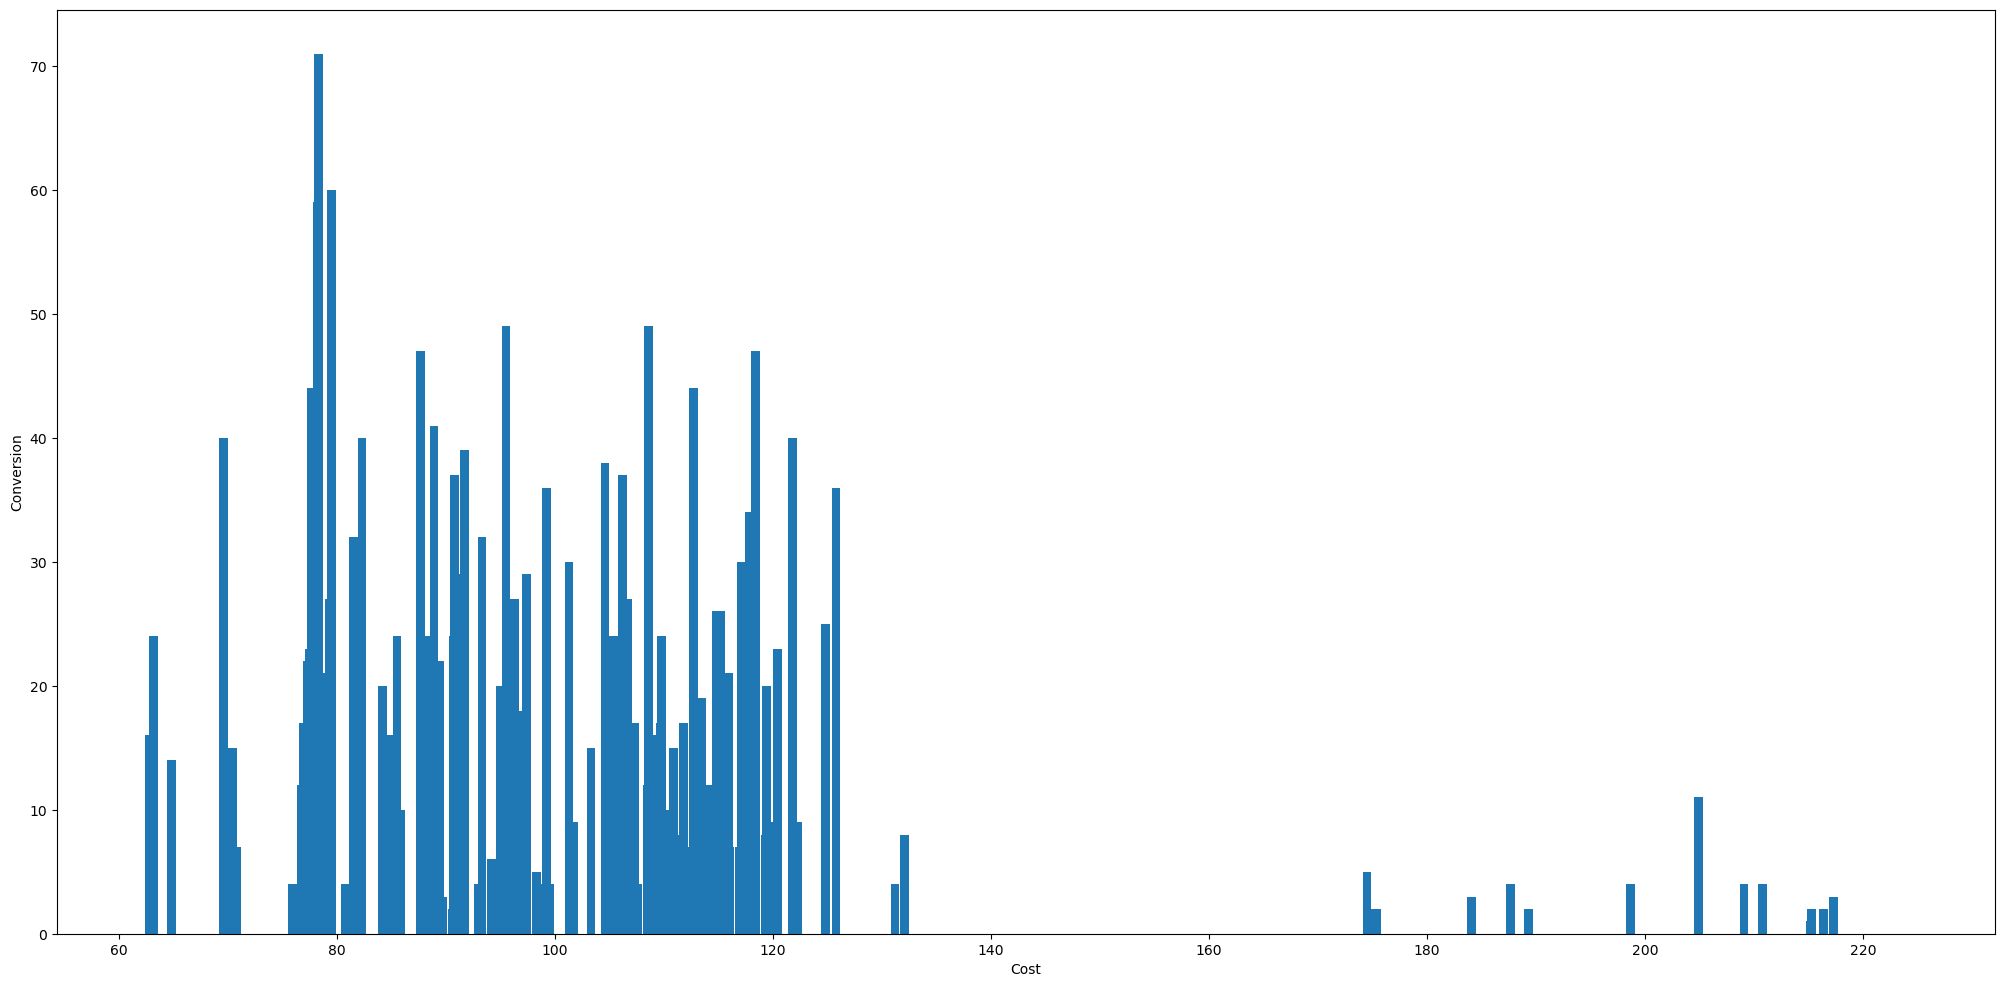

In [86]:
plt.figure(figsize=(25,12))
plt.bar(metaads_performance['Cost'], metaads_performance['Conversions'])
plt.xlabel("Cost")
plt.ylabel("Conversion")
plt.show()

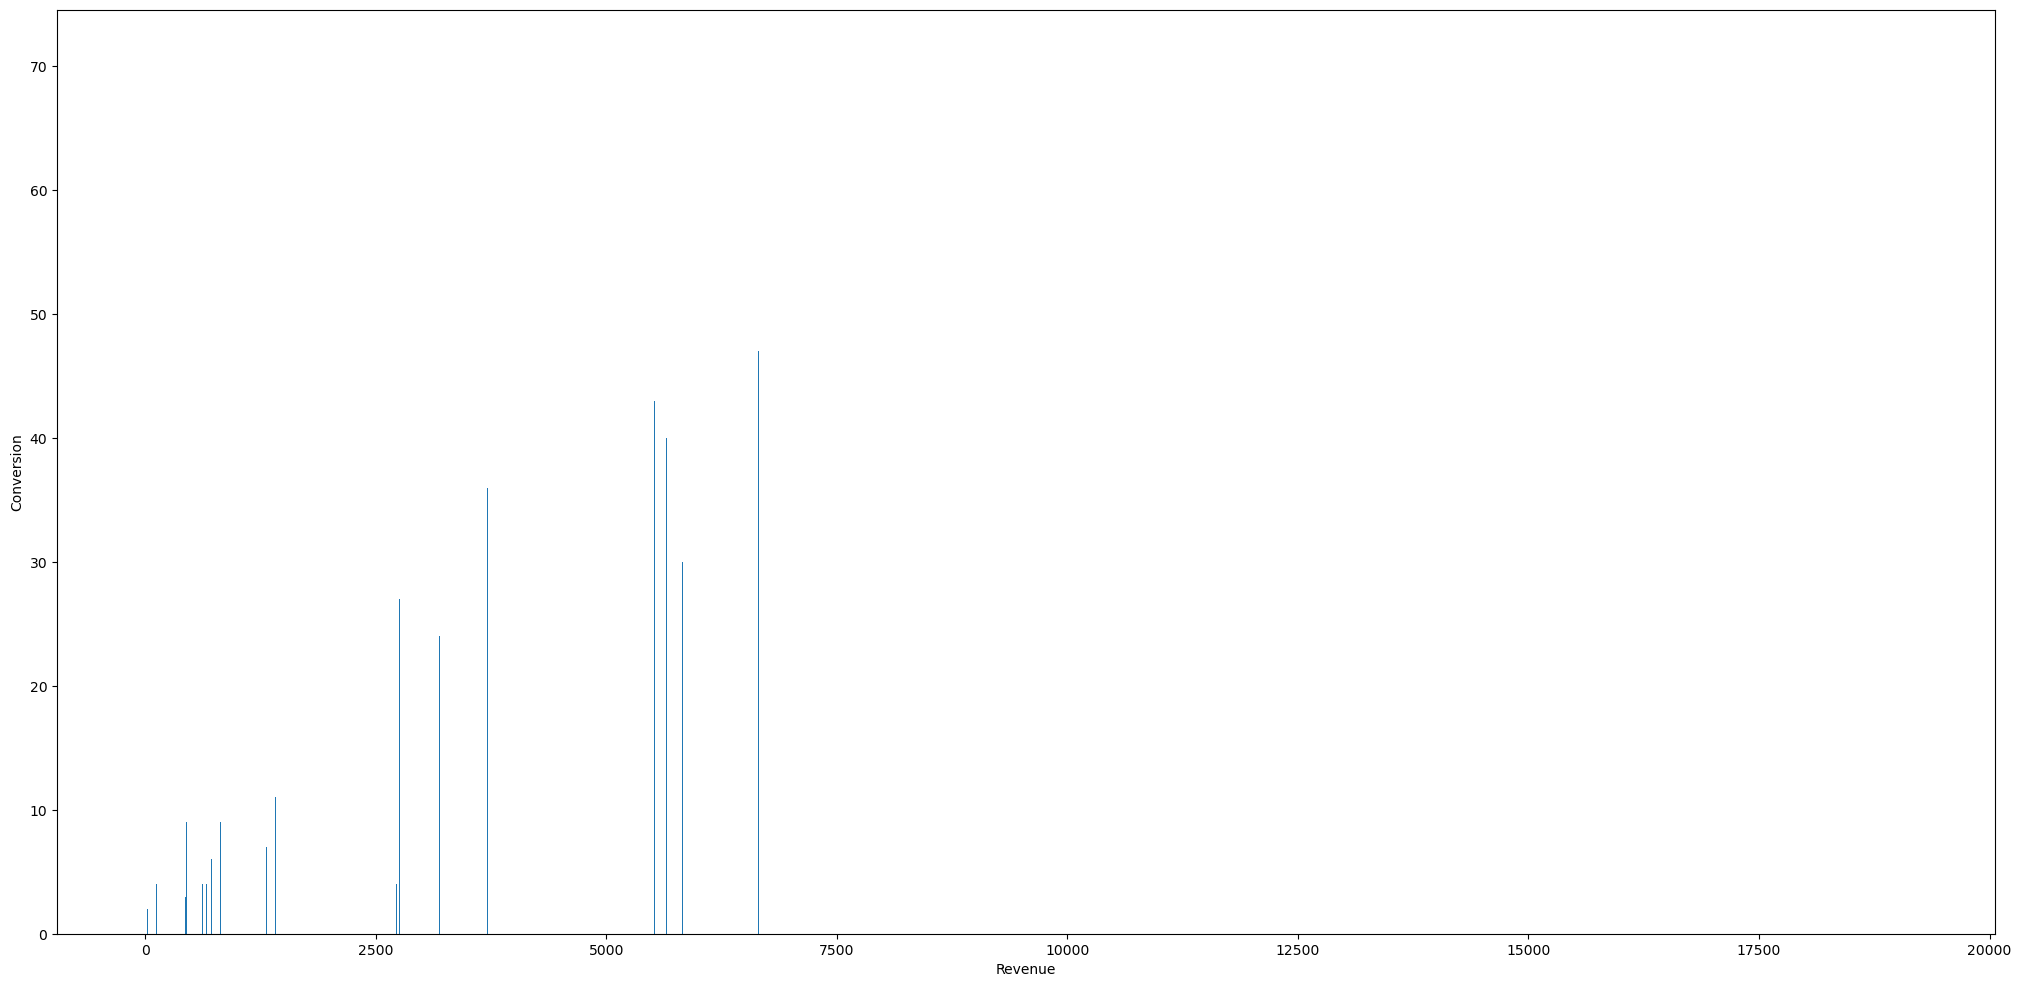

In [87]:
plt.figure(figsize=(25,12))
plt.bar(metaads_performance['Revenue'], metaads_performance['Conversions'])
plt.xlabel("Revenue")
plt.ylabel("Conversion")
plt.show()

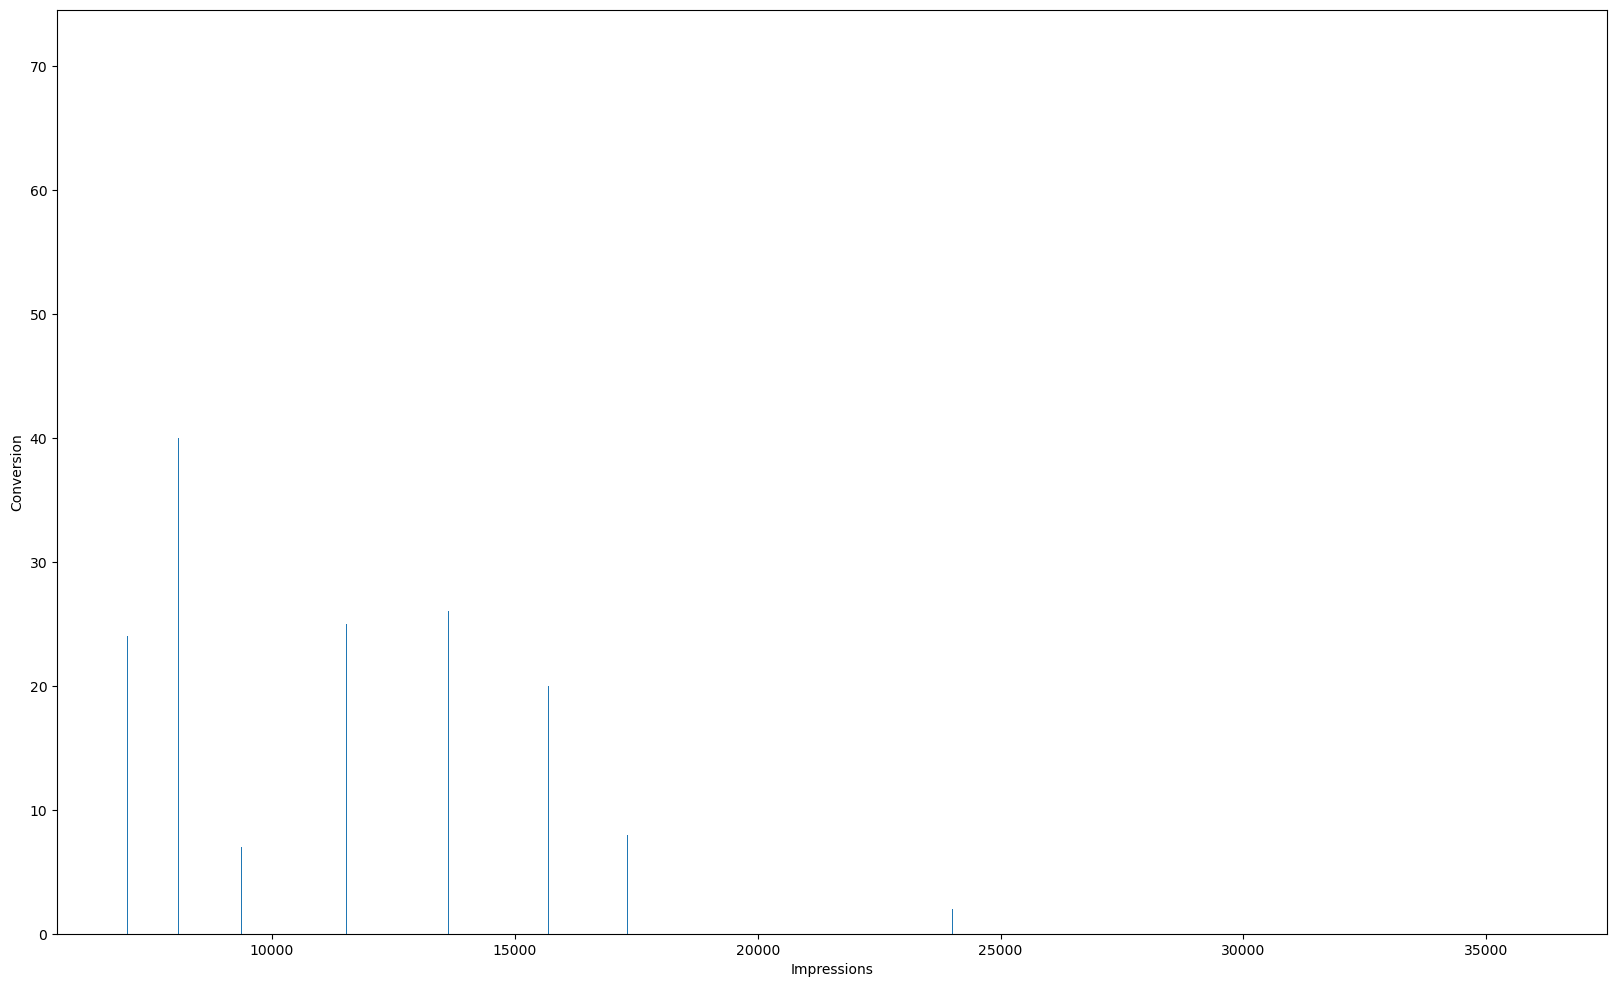

In [88]:
plt.figure(figsize=(20,12))
plt.bar(metaads_performance['Impressions'], metaads_performance['Conversions'])
plt.xlabel("Impressions")
plt.ylabel("Conversion")
plt.show()

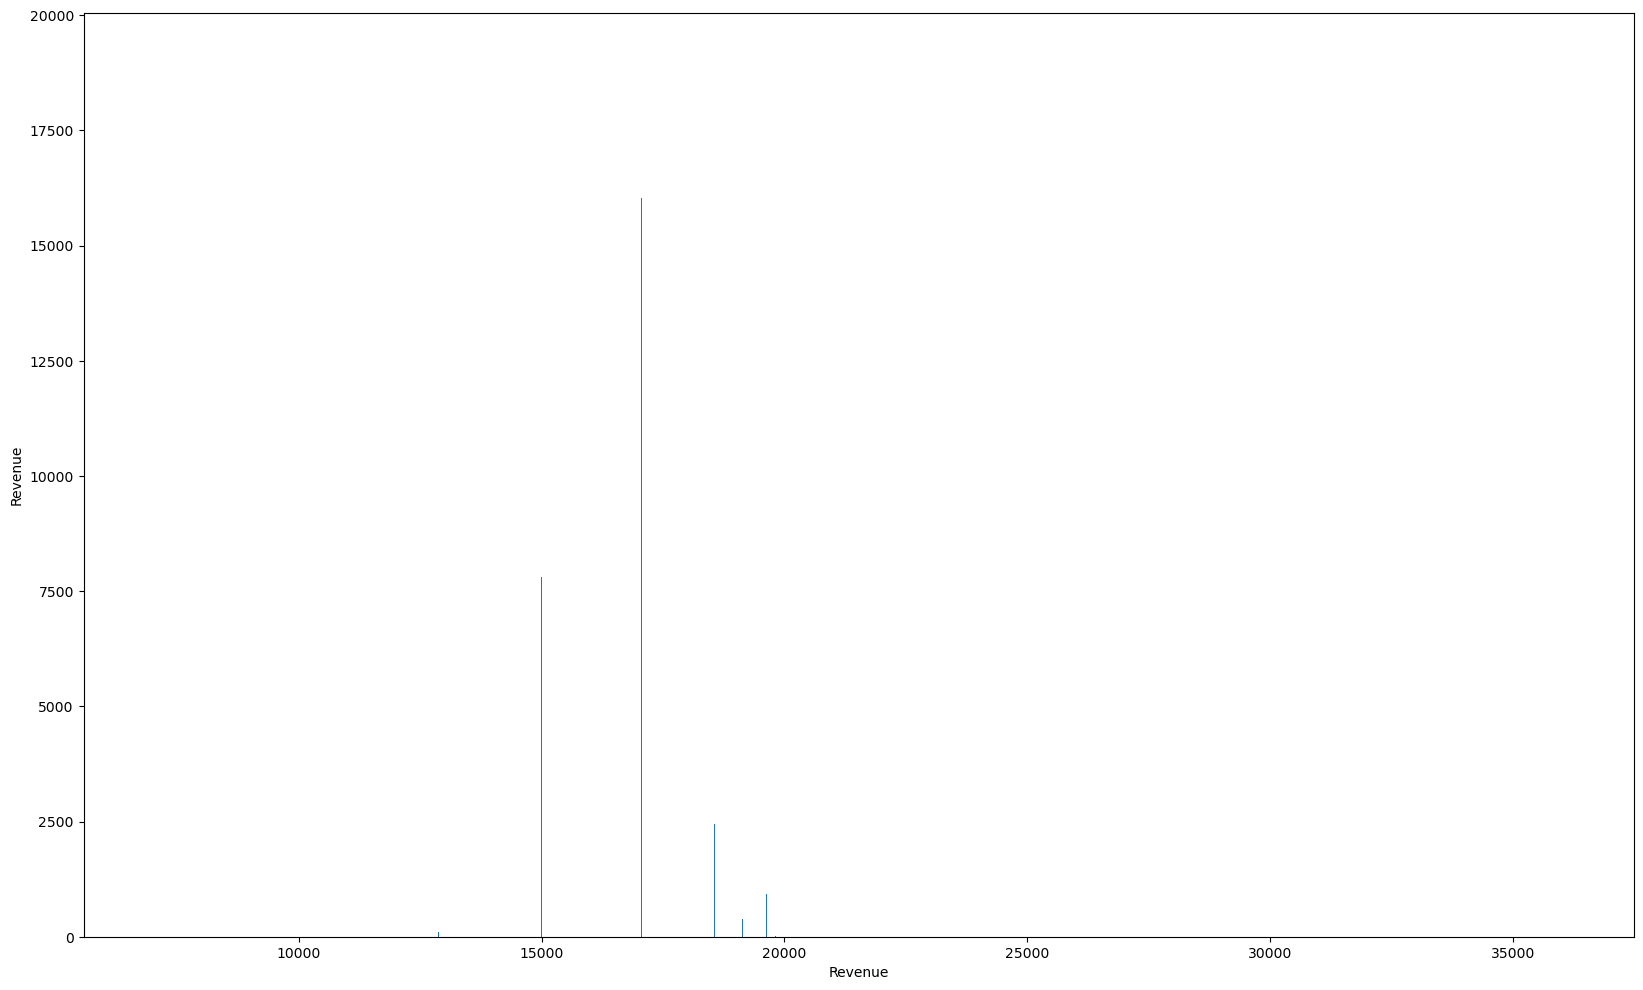

In [89]:
plt.figure(figsize=(20,12))
plt.bar(metaads_performance['Impressions'], metaads_performance['Revenue'])
plt.xlabel("Revenue")
plt.ylabel("Revenue")
plt.show()

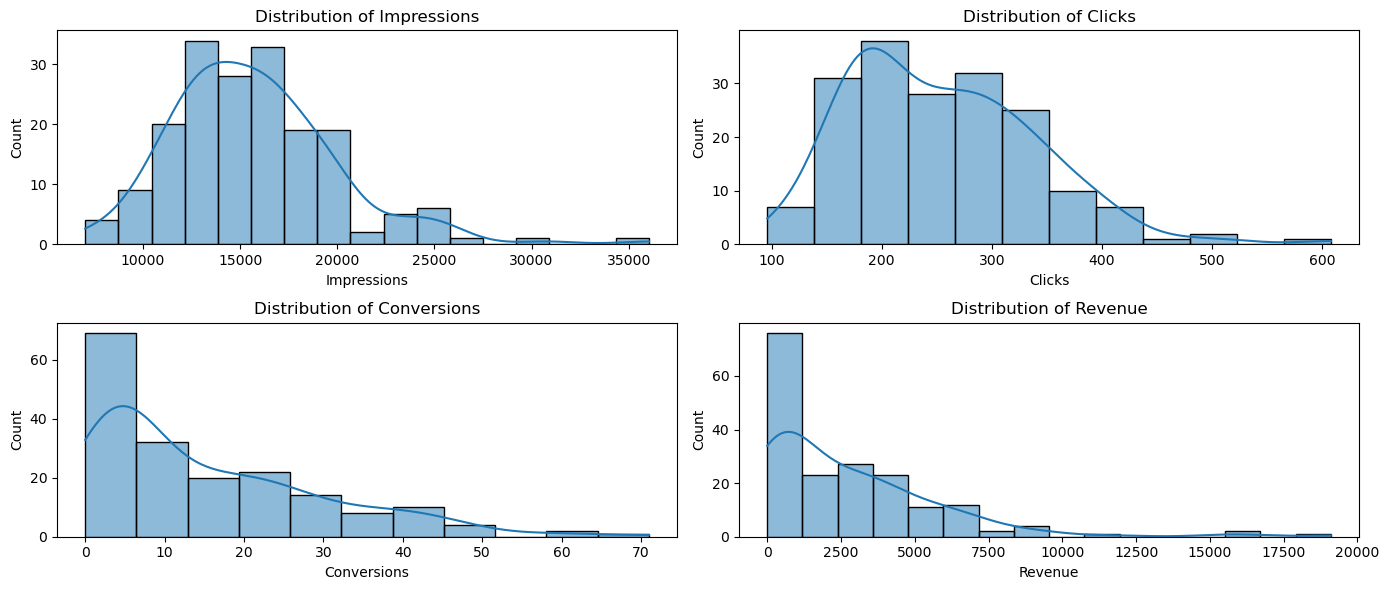

In [90]:
# 1. Distribution of Impressions, Clicks, Conversions, and Revenue
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.histplot(metaads_performance['Impressions'], kde=True)
plt.title('Distribution of Impressions')

plt.subplot(2, 2, 2)
sns.histplot(metaads_performance['Clicks'], kde=True)
plt.title('Distribution of Clicks')

plt.subplot(2, 2, 3)
sns.histplot(metaads_performance['Conversions'], kde=True)
plt.title('Distribution of Conversions')

plt.subplot(2, 2, 4)
sns.histplot(metaads_performance['Revenue'], kde=True)
plt.title('Distribution of Revenue')

plt.tight_layout()
plt.show()

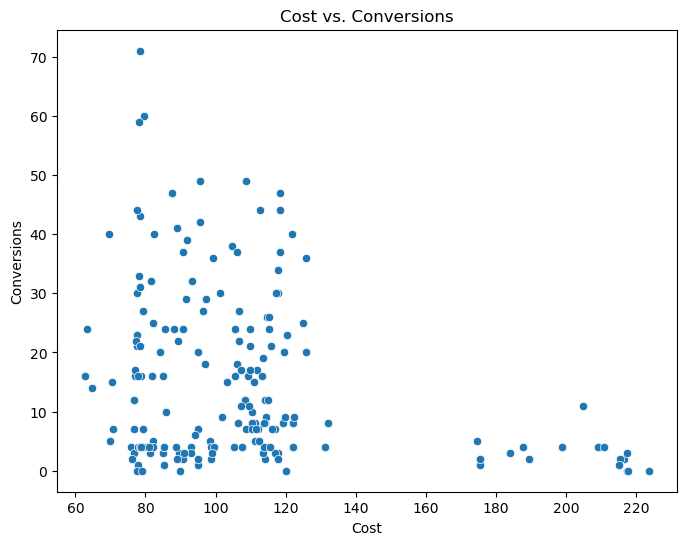

In [91]:
# 2. Relationship Between Cost and Conversions
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cost', y='Conversions', data=metaads_performance)
plt.title('Cost vs. Conversions')
plt.show()

([<matplotlib.axis.XTick at 0x208f47f02e0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80'),
  Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95'),
  Text(100, 0, '100'),
  Text(105, 0, '105'),
  Text(110, 0, '110'),
  Text(115, 0, '115'),
  Text(120, 0, '120'),
  Text(125, 0, '125'),
  Text(130, 0, '130'),
  Text(135, 0, '135'),
  Text(140, 0, '140'),
  Text(145, 0, '145'),
  Text(150, 0, '150'),
  Text(155, 0, '155'),
  Text(160, 0, '160'),
  Text(165, 0, '165'),
  Text(170, 0, '170'),
  Text(175, 0, '175'),
  Text(180, 0, '180')])

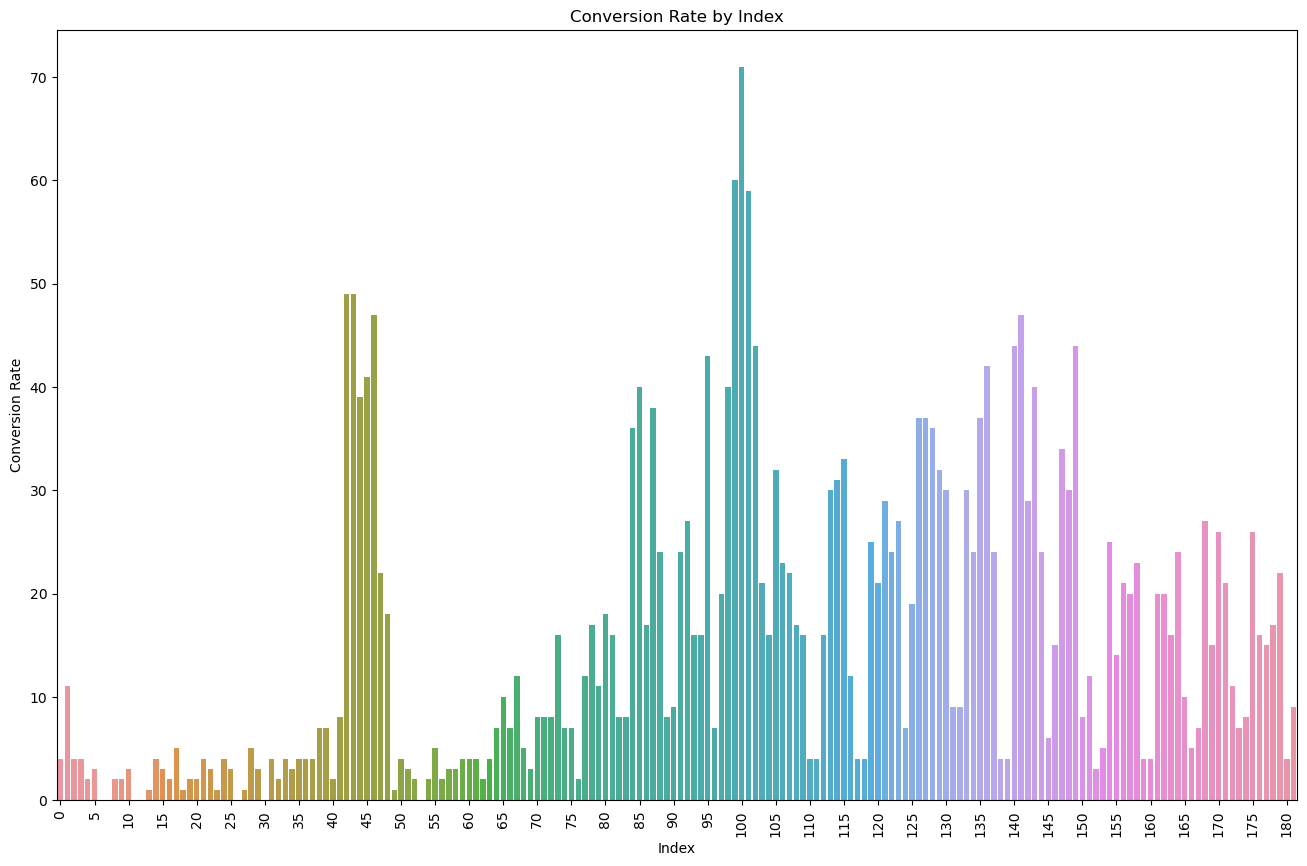

In [92]:
# 3. Conversion Rate Analysis
# Increase figure size and rotate labels
plt.figure(figsize=(16, 10))
sns.barplot(x=metaads_performance.index, y='Conversions', data=metaads_performance)

plt.title('Conversion Rate by Index')
plt.xlabel('Index')
plt.ylabel('Conversion Rate')

# Rotate x-axis labels and set the alignment
plt.xticks(rotation=90, ha='center')

# Optionally, display fewer x-axis labels (e.g., every 5th label)
plt.xticks(ticks=range(0, len(metaads_performance.index), 5), labels=metaads_performance.index[::5])

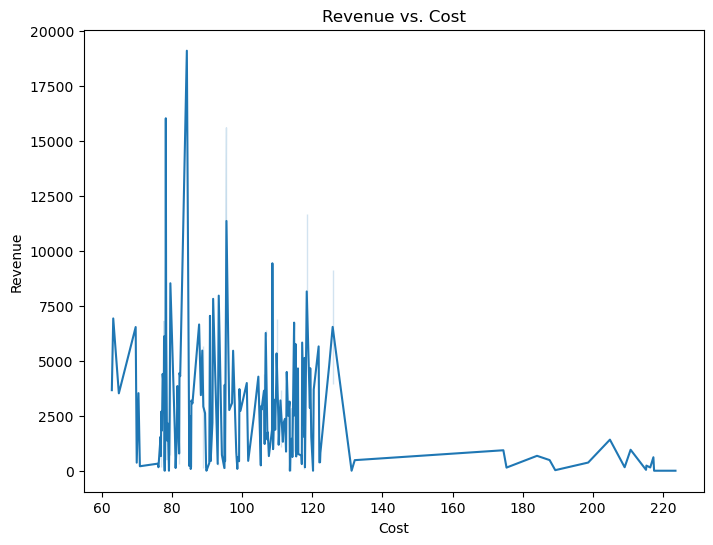

In [93]:
# 4. Revenue vs. Cost Analysis
plt.figure(figsize=(8, 6))
sns.lineplot(x='Cost', y='Revenue', data=metaads_performance)
plt.title('Revenue vs. Cost')
plt.show()

C:\Users\nensi\AppData\Local\Temp\ipykernel_5428\3418456148.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Impressions_binned', y='Conversions', data=metaads_performance, ci=None)


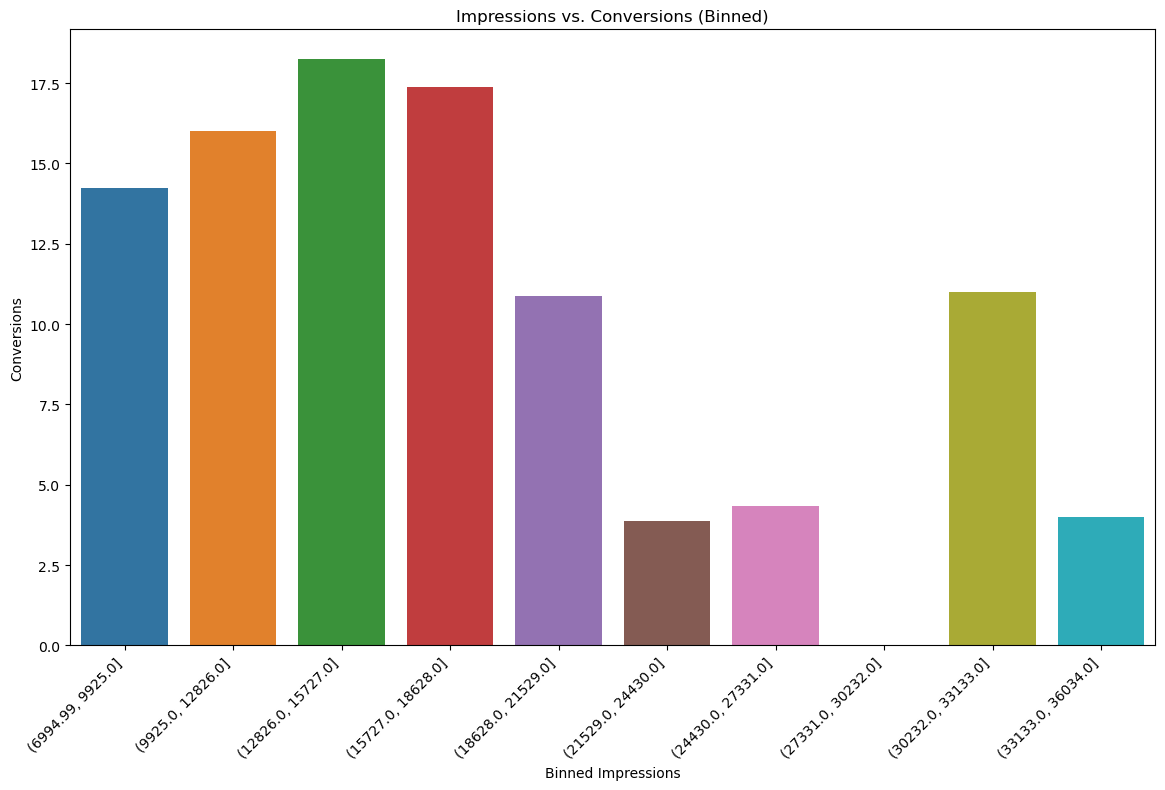

In [94]:
# 5. Impression vs. Conversion Analysis
# Convert 'Impressions' to categorical data or bin it to reduce labels
metaads_performance['Impressions_binned'] = pd.cut(metaads_performance['Impressions'], bins=10)  # Bin into 10 categories

# Plot: Impressions vs. Conversions with binned impressions
plt.figure(figsize=(14, 8))  # Increase figure size
sns.barplot(x='Impressions_binned', y='Conversions', data=metaads_performance, ci=None)
plt.title('Impressions vs. Conversions (Binned)')
plt.xticks(rotation=45, ha='right')  # Rotate for better visibility
plt.xlabel('Binned Impressions')
plt.ylabel('Conversions')
plt.show()

C:\Users\nensi\AppData\Local\Temp\ipykernel_5428\1829146914.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(metaads_performance.corr(), annot=True, cmap='coolwarm')


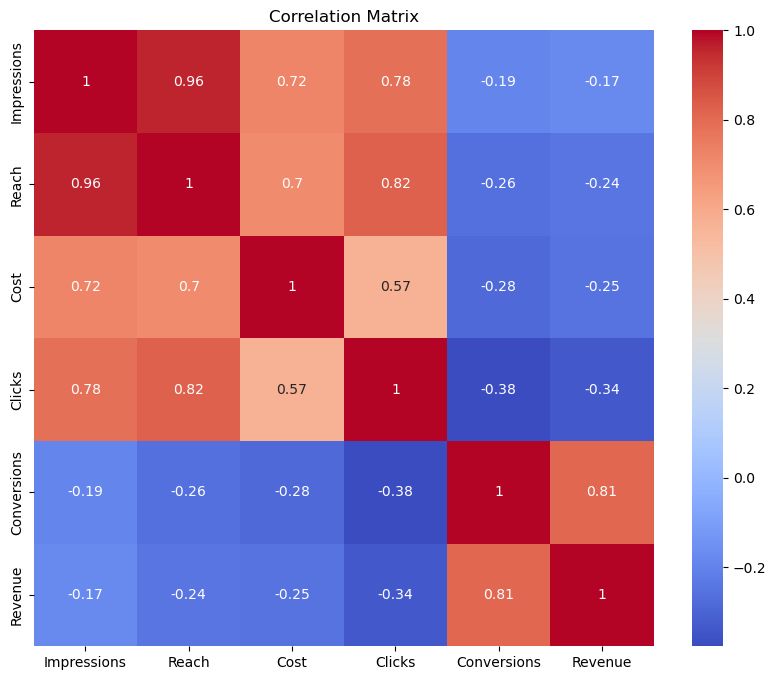

In [95]:
# Heatmap for Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(metaads_performance.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [96]:
# Calculate metrics
metaads_performance['CPC'] = metaads_performance['Cost'] / metaads_performance['Conversions']
metaads_performance['Conversion Rate'] = metaads_performance['Conversions'] / metaads_performance['Impressions']
metaads_performance['RPC'] = metaads_performance['Revenue'] / metaads_performance['Conversions']

In [97]:
metaads_performance['CPC']

0      52.275000
1      18.627273
2      49.675000
3      32.800000
4      57.000000
         ...    
177     7.393333
178     6.452941
179     4.850000
180    28.850000
181    13.300000
Name: CPC, Length: 182, dtype: float64

In [98]:
metaads_performance['Conversion Rate']

0      0.000111
1      0.000357
2      0.000152
3      0.000230
4      0.000166
         ...   
177    0.001120
178    0.001299
179    0.001608
180    0.000224
181    0.000464
Name: Conversion Rate, Length: 182, dtype: float64

In [99]:
metaads_performance['RPC']

0       39.550000
1      128.436364
2       92.875000
3        0.000000
4        0.000000
          ...    
177    213.100000
178    237.217647
179    291.322727
180    162.425000
181    170.744444
Name: RPC, Length: 182, dtype: float64

In [100]:
# Initialize parameters
total_budget = 200000  # Total budget to allocate
min_budget = 0.1 * total_budget  # Minimum budget allocation to each identifier
n_rounds = 100  # Number of rounds (iterations) for budget allocation
epsilon = 0.1  # Exploration probability

In [101]:
# Initialize budget allocation
metaads_performance['Allocated Budget'] = min_budget  # Start with a minimum allocation

In [102]:
# Multi-Armed Bandit - Epsilon-Greedy Algorithm
for _ in range(n_rounds):
    if random.random() < epsilon:
        # Exploration: Randomly select a campaign
        campaign_index = random.randint(0, len(metaads_performance) - 1)
    else:
        # Exploitation: Select the campaign with the best Conversion Rate
        campaign_index = np.argmax(metaads_performance['Conversion Rate'])

    # Allocate a portion of the remaining budget to the selected campaign
    remaining_budget = total_budget - metaads_performance['Allocated Budget'].sum()
    budget_to_allocate = remaining_budget / (n_rounds - _)

    metaads_performance.loc[campaign_index, 'Allocated Budget'] += budget_to_allocate


In [103]:
# Display the final budget allocation
print(metaads_performance[['Impressions', 'Cost', 'Clicks', 'Conversions', 'Revenue', 'Allocated Budget']])

     Impressions   Cost  Clicks  Conversions  Revenue  Allocated Budget
0        36034.0  209.1   608.0          4.0    158.2           20000.0
1        30804.0  204.9   516.0         11.0   1412.8          -14400.0
2        26372.0  198.7   429.0          4.0    371.5           20000.0
3        17354.0  131.2   324.0          4.0      0.0           20000.0
4        12036.0  114.0   224.0          2.0      0.0           20000.0
..           ...    ...     ...          ...      ...               ...
177      13392.0  110.9   148.0         15.0   3196.5           20000.0
178      13092.0  109.7   161.0         17.0   4032.7           20000.0
179      13678.0  106.7   165.0         22.0   6409.1           20000.0
180      17855.0  115.4   273.0          4.0    649.7           20000.0
181      19402.0  119.7   261.0          9.0   1536.7           20000.0

[182 rows x 6 columns]


# 3. MicrosoftAds Performance

In [104]:
microsoftads_performance = pd.read_csv("microsoftads-performance.csv")
microsoftads_performance

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,2024-01-01,Audience,9132.0,50.0,26.8,0.0,0.0
1,2024-01-01,Performance max,897.0,9.0,7.0,0.0,0.0
2,2024-01-01,Search & content,95977.0,561.0,846.5,1.0,168.8
3,2024-01-01,Shopping,59860.0,343.0,215.2,1.0,143.5
4,2024-01-02,Audience,9926.0,49.0,25.9,0.0,0.0
...,...,...,...,...,...,...,...
716,2024-06-29,Shopping,29992.0,181.0,102.4,4.0,2321.1
717,2024-06-30,Audience,10018.0,115.0,22.1,0.0,0.0
718,2024-06-30,Performance max,40481.0,328.0,275.3,2.0,289.2
719,2024-06-30,Search & content,40731.0,269.0,201.8,7.0,400.7


In [105]:
microsoftads_performance.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,2024-01-01,Audience,9132.0,50.0,26.8,0.0,0.0
1,2024-01-01,Performance max,897.0,9.0,7.0,0.0,0.0
2,2024-01-01,Search & content,95977.0,561.0,846.5,1.0,168.8
3,2024-01-01,Shopping,59860.0,343.0,215.2,1.0,143.5
4,2024-01-02,Audience,9926.0,49.0,25.9,0.0,0.0


In [106]:
microsoftads_performance.tail()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
716,2024-06-29,Shopping,29992.0,181.0,102.4,4.0,2321.1
717,2024-06-30,Audience,10018.0,115.0,22.1,0.0,0.0
718,2024-06-30,Performance max,40481.0,328.0,275.3,2.0,289.2
719,2024-06-30,Search & content,40731.0,269.0,201.8,7.0,400.7
720,2024-06-30,Shopping,22174.0,159.0,89.0,1.0,116.8


In [107]:
microsoftads_performance.shape

(721, 7)

In [108]:
microsoftads_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           721 non-null    object 
 1   Campaign type  721 non-null    object 
 2   Impressions    721 non-null    float64
 3   Clicks         721 non-null    float64
 4   Cost           721 non-null    float64
 5   Conversions    721 non-null    float64
 6   Revenue        721 non-null    float64
dtypes: float64(5), object(2)
memory usage: 39.6+ KB


In [109]:
microsoftads_performance.columns

Index(['Date', 'Campaign type', 'Impressions', 'Clicks', 'Cost', 'Conversions',
       'Revenue'],
      dtype='object')

In [110]:
microsoftads_performance.describe()

,Impressions,Clicks,Cost,Conversions,Revenue
count,721.000000,721.000000,721.000000,721.000000,721.000000
mean,45503.911234,227.690707,260.636338,4.460472,685.468516
std,49950.280514,220.703786,322.331634,5.494836,926.238756
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7699.000000,45.000000,23.600000,0.000000,0.000000
50%,28840.000000,178.000000,131.400000,2.000000,253.100000
75%,72902.000000,398.000000,406.700000,7.000000,1050.700000
max,400462.000000,1384.000000,1129.800000,32.000000,5189.900000


In [111]:
microsoftads_performance.describe(include="object")

,Date,Campaign type
count,721,721
unique,182,4
top,2024-01-01,Audience
freq,4,182


In [112]:
microsoftads_performance.isnull()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
716,False,False,False,False,False,False,False
717,False,False,False,False,False,False,False
718,False,False,False,False,False,False,False
719,False,False,False,False,False,False,False


In [113]:
microsoftads_performance.isnull().sum()

Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64

In [114]:
microsoftads_performance.drop(columns=["Date"], axis=1, inplace=True)

<Axes: xlabel='Impressions'>

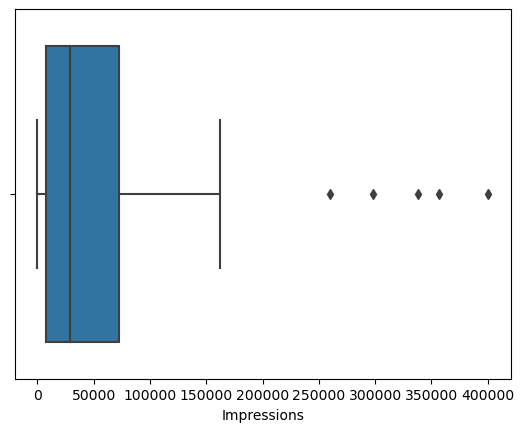

In [115]:
sns.boxplot(x="Impressions", data=microsoftads_performance)

<Axes: xlabel='Clicks'>

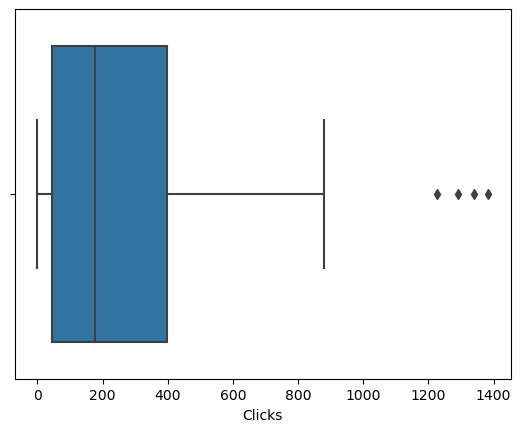

In [116]:
sns.boxplot(x="Clicks", data=microsoftads_performance)

<Axes: xlabel='Cost'>

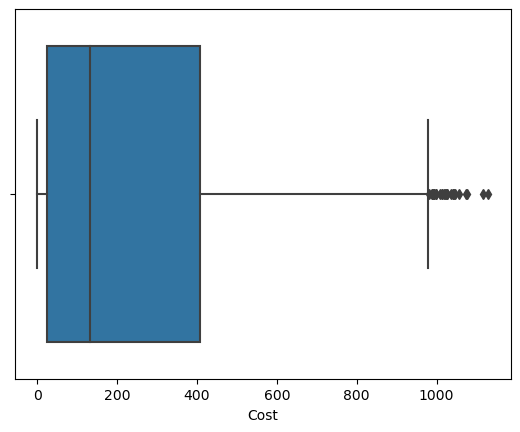

In [117]:
sns.boxplot(x="Cost", data=microsoftads_performance)

<Axes: xlabel='Conversions'>

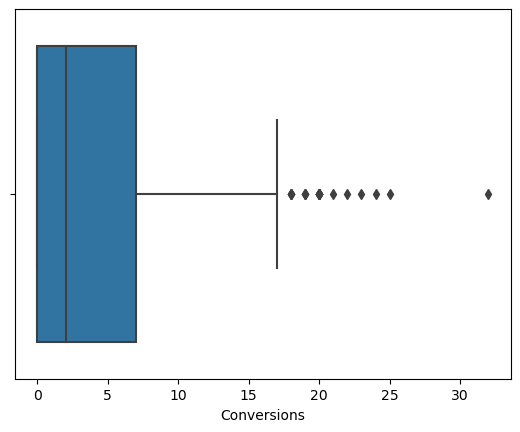

In [118]:
sns.boxplot(x="Conversions", data=microsoftads_performance)

<Axes: xlabel='Revenue'>

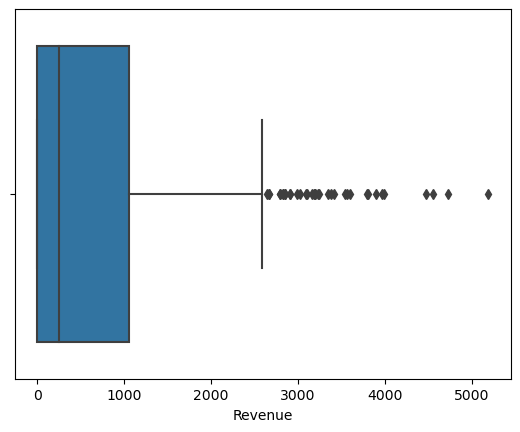

In [119]:
sns.boxplot(x="Revenue", data=microsoftads_performance)

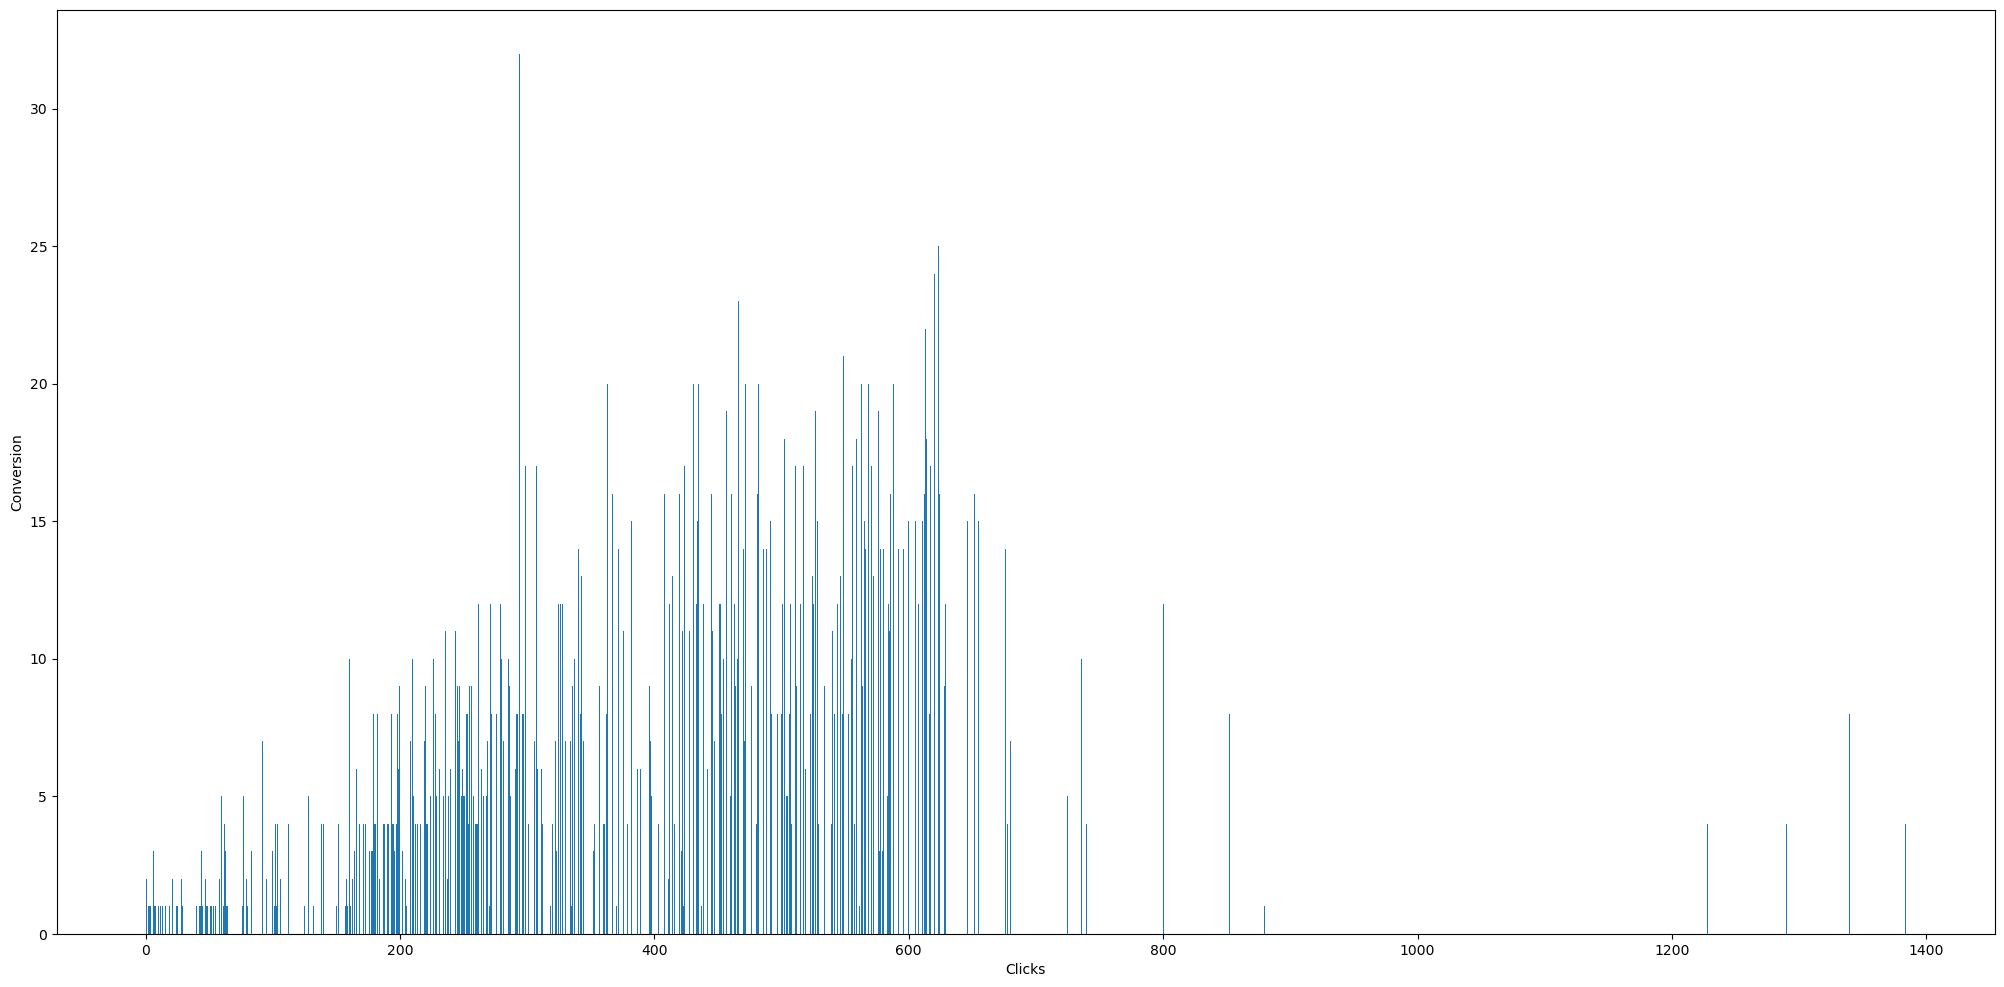

In [120]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Clicks'], microsoftads_performance['Conversions'])
plt.xlabel("Clicks")
plt.ylabel("Conversion")
plt.show()

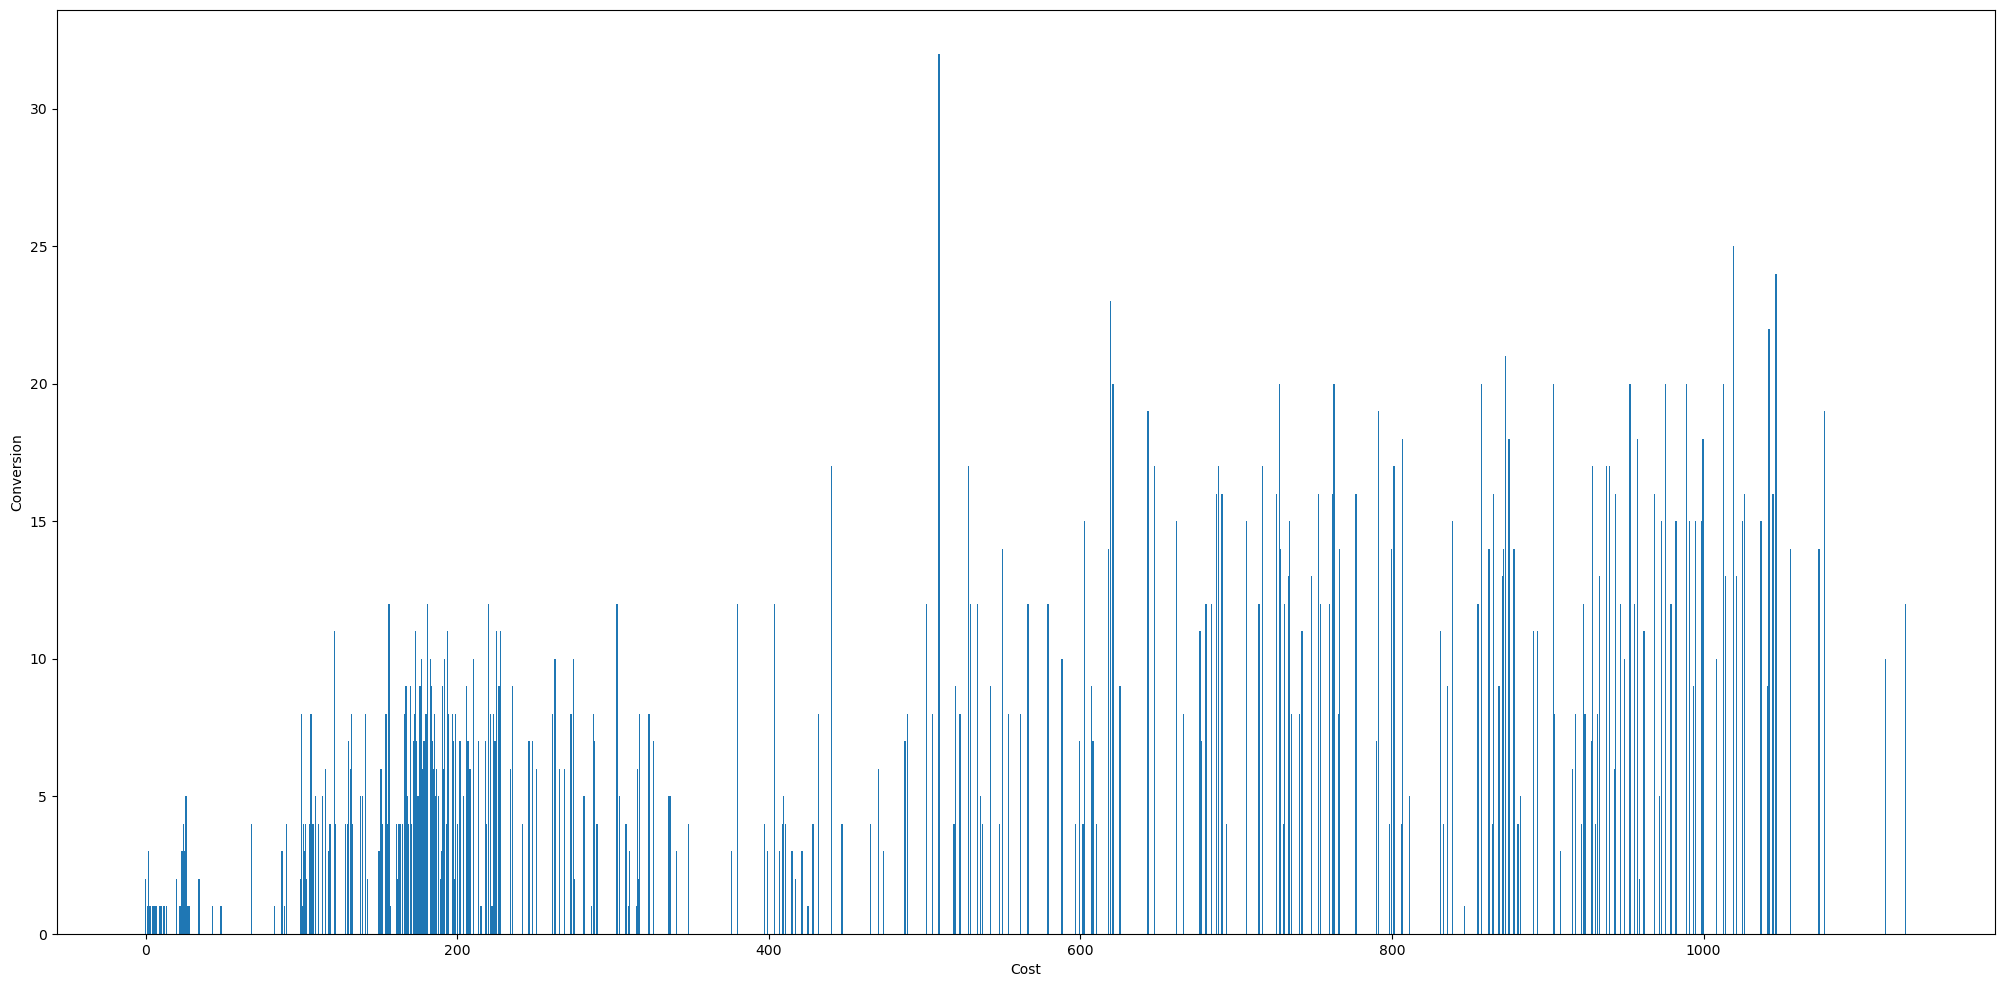

In [121]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Cost'], microsoftads_performance['Conversions'])
plt.xlabel("Cost")
plt.ylabel("Conversion")
plt.show()

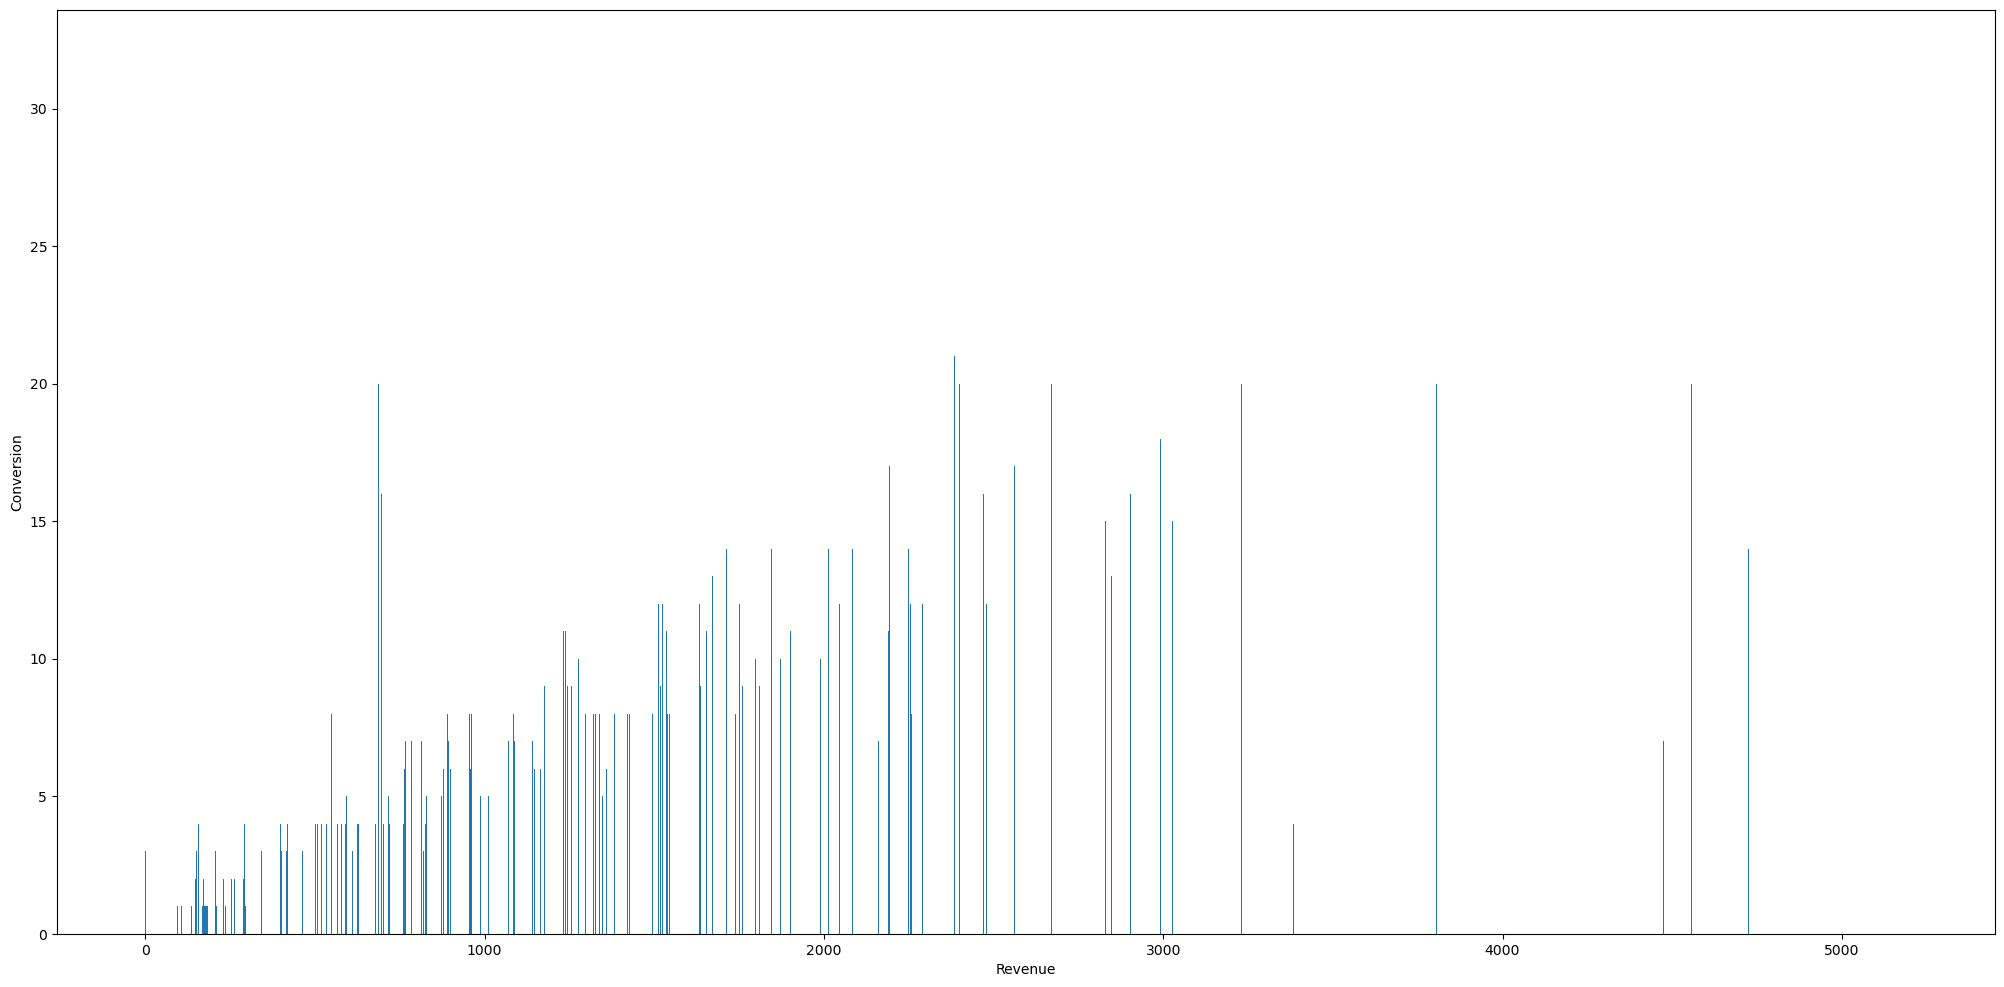

In [122]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Revenue'], microsoftads_performance['Conversions'])
plt.xlabel("Revenue")
plt.ylabel("Conversion")
plt.show()

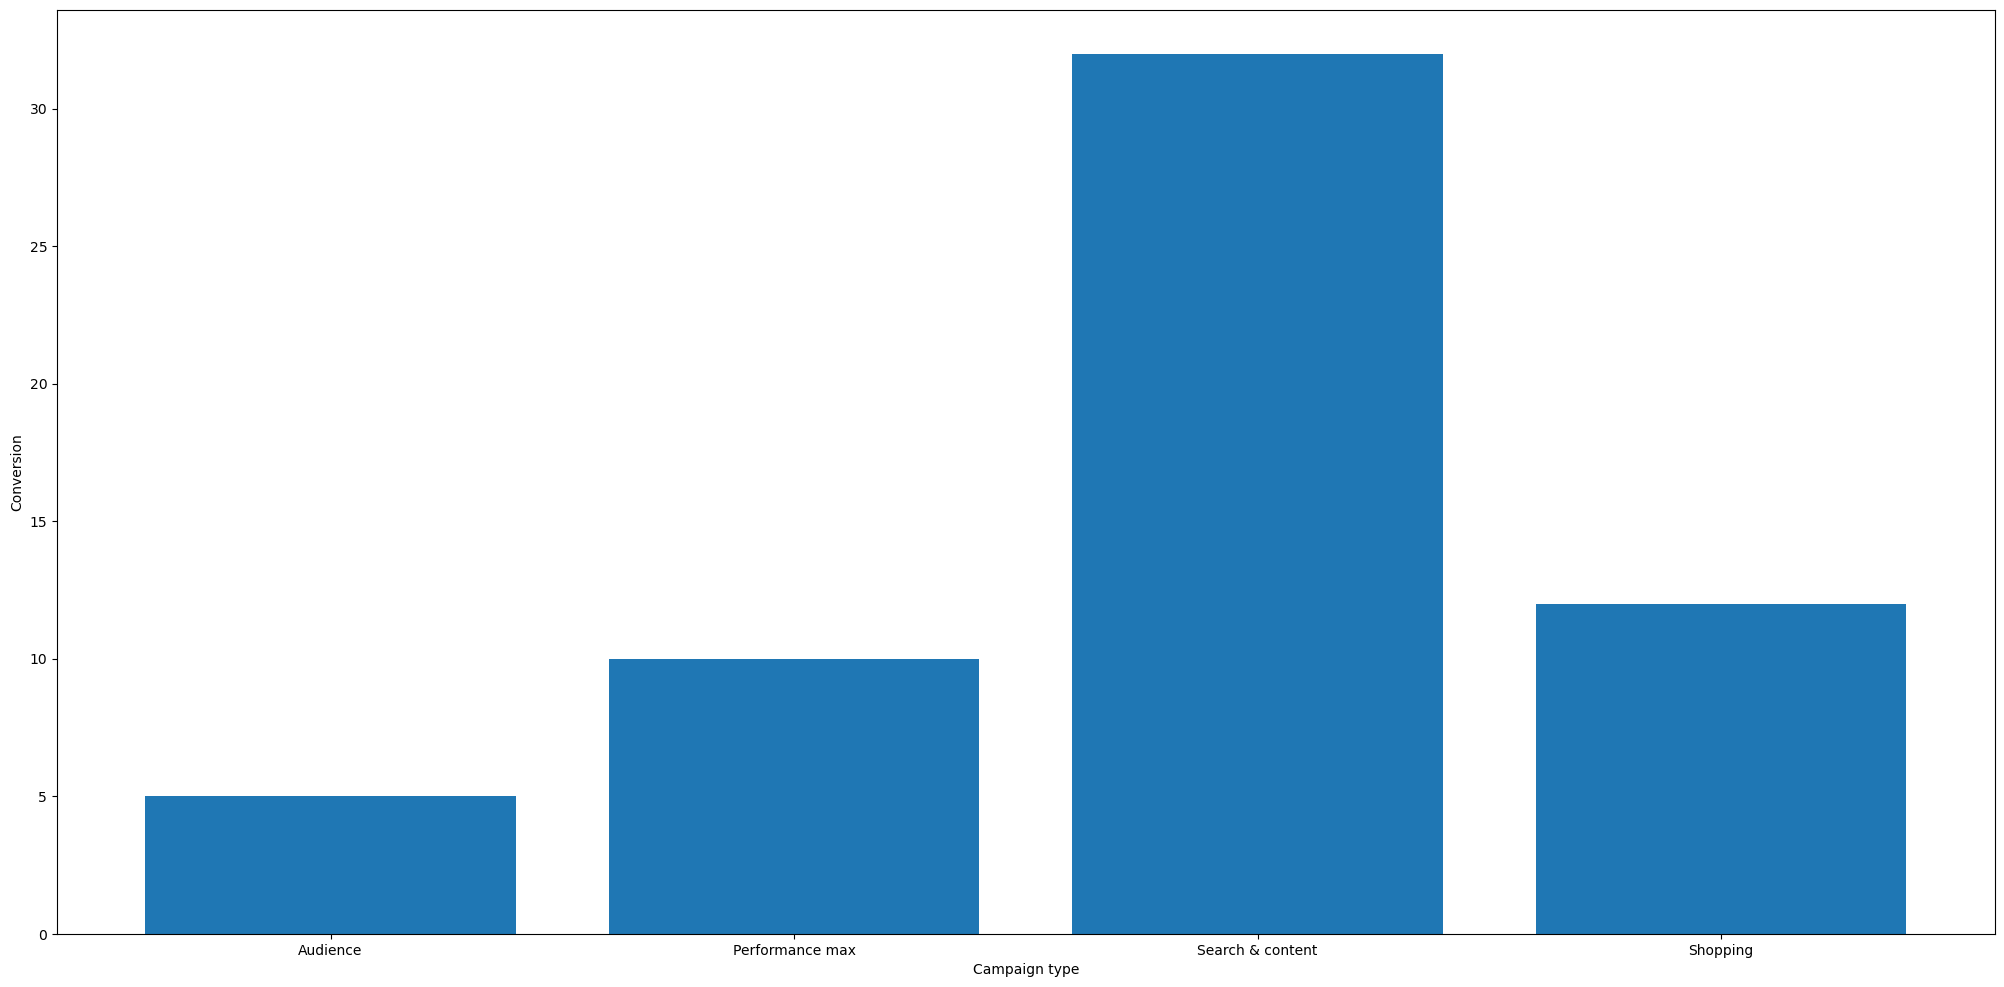

In [123]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Campaign type'], microsoftads_performance['Conversions'])
plt.xlabel("Campaign type")
plt.ylabel("Conversion")
plt.show()

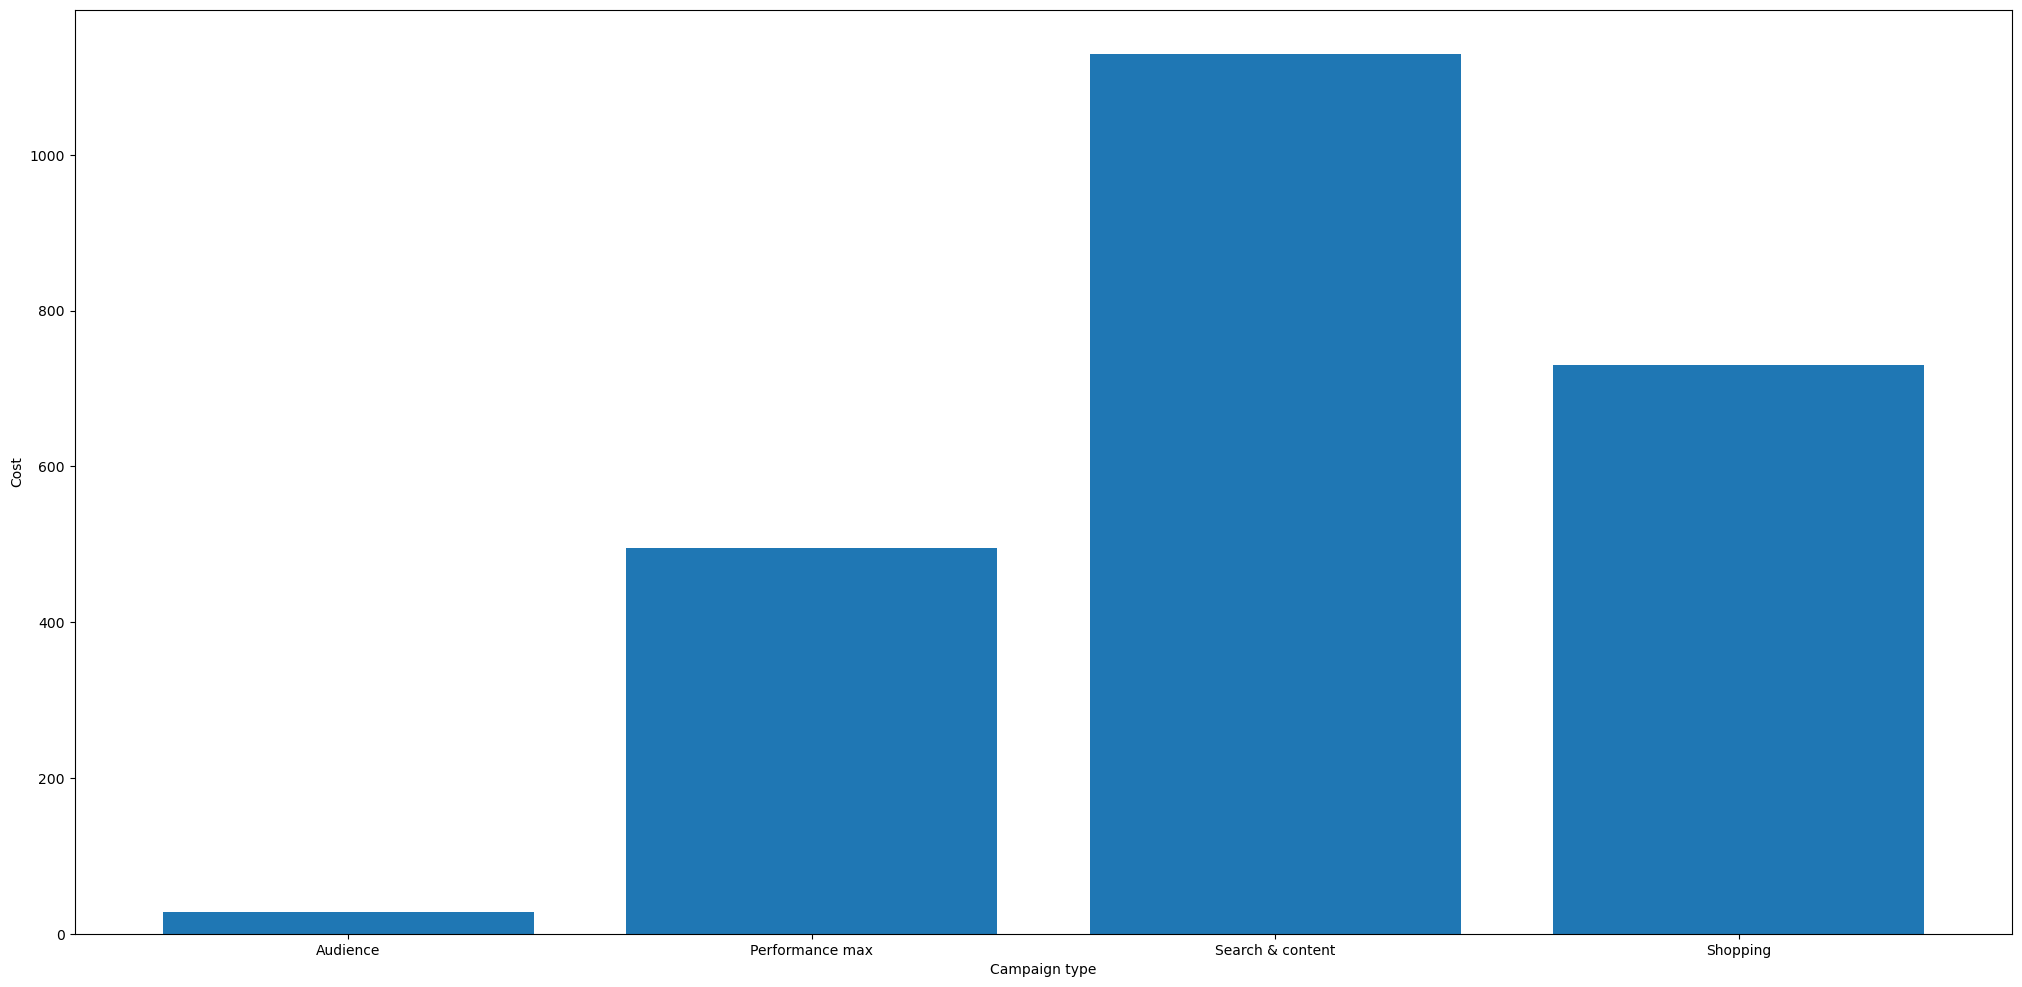

In [124]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Campaign type'], microsoftads_performance['Cost'])
plt.xlabel("Campaign type")
plt.ylabel("Cost")
plt.show()

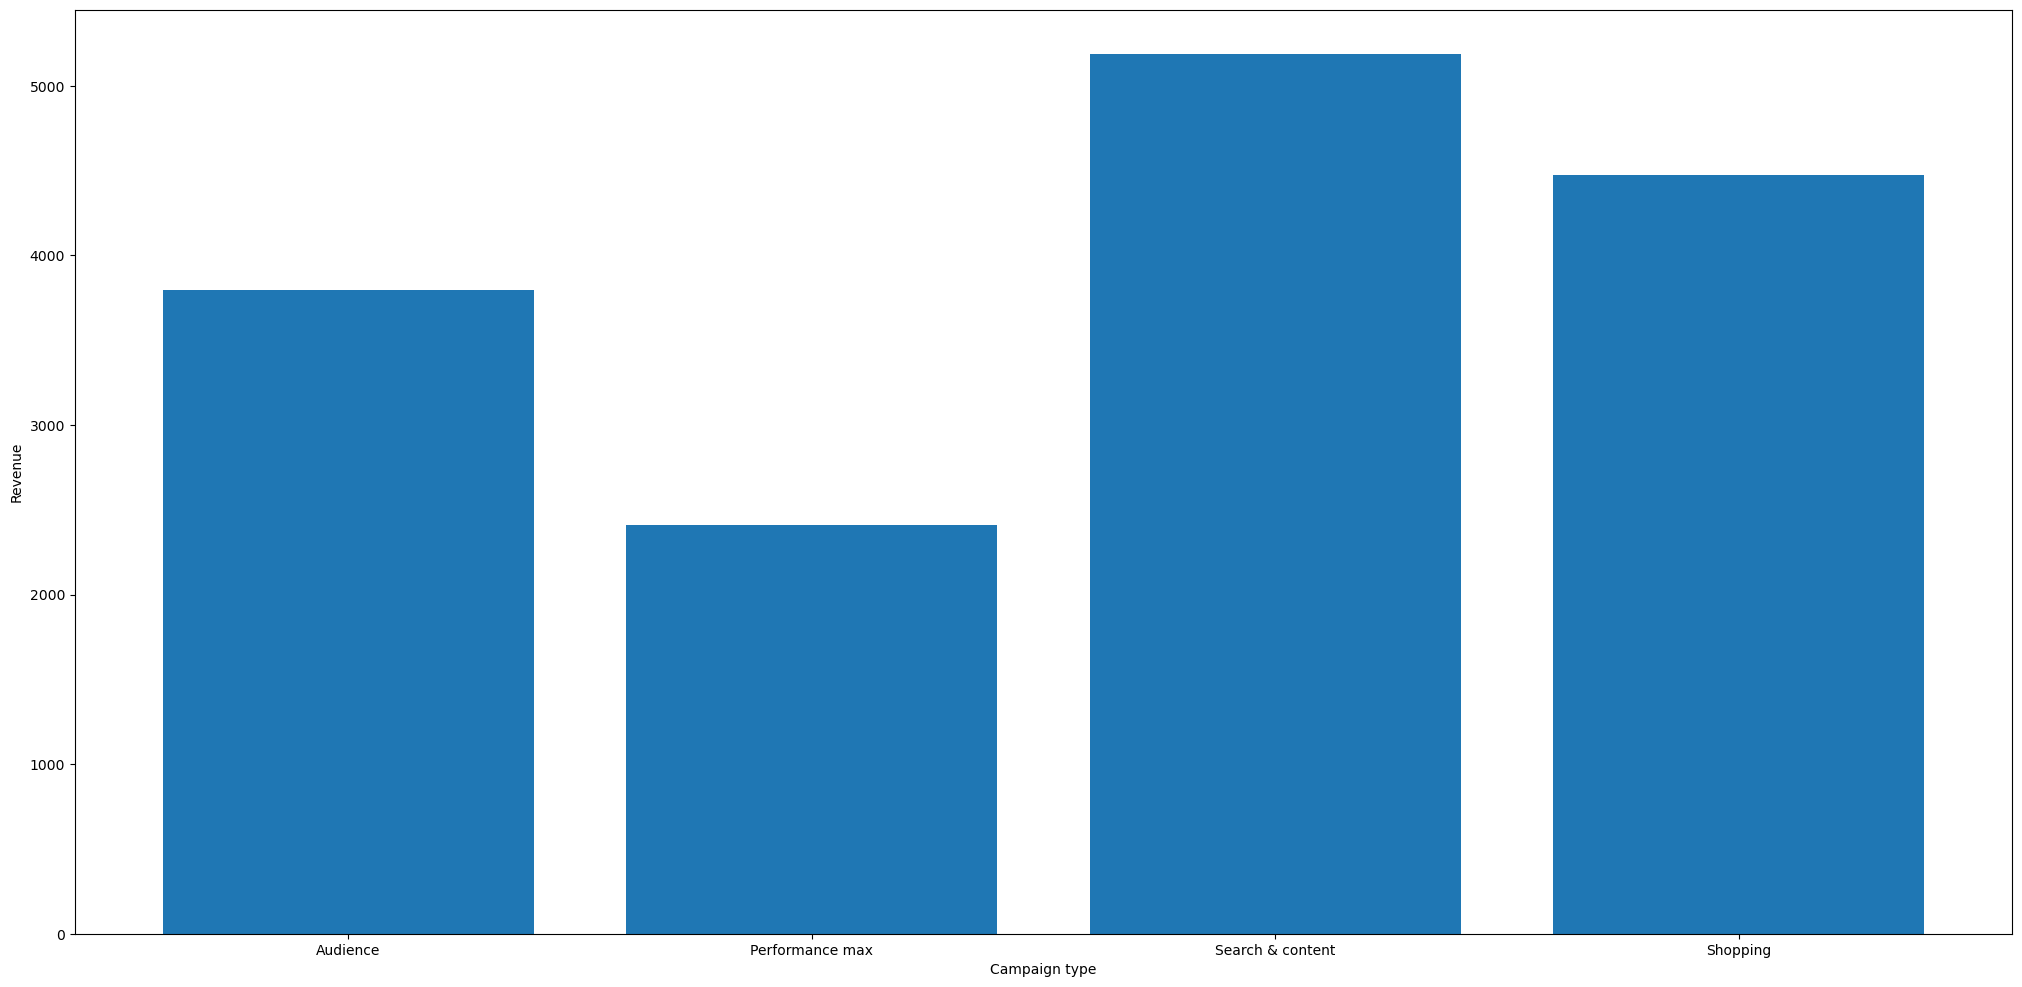

In [125]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Campaign type'], microsoftads_performance['Revenue'])
plt.xlabel("Campaign type")
plt.ylabel("Revenue")
plt.show()

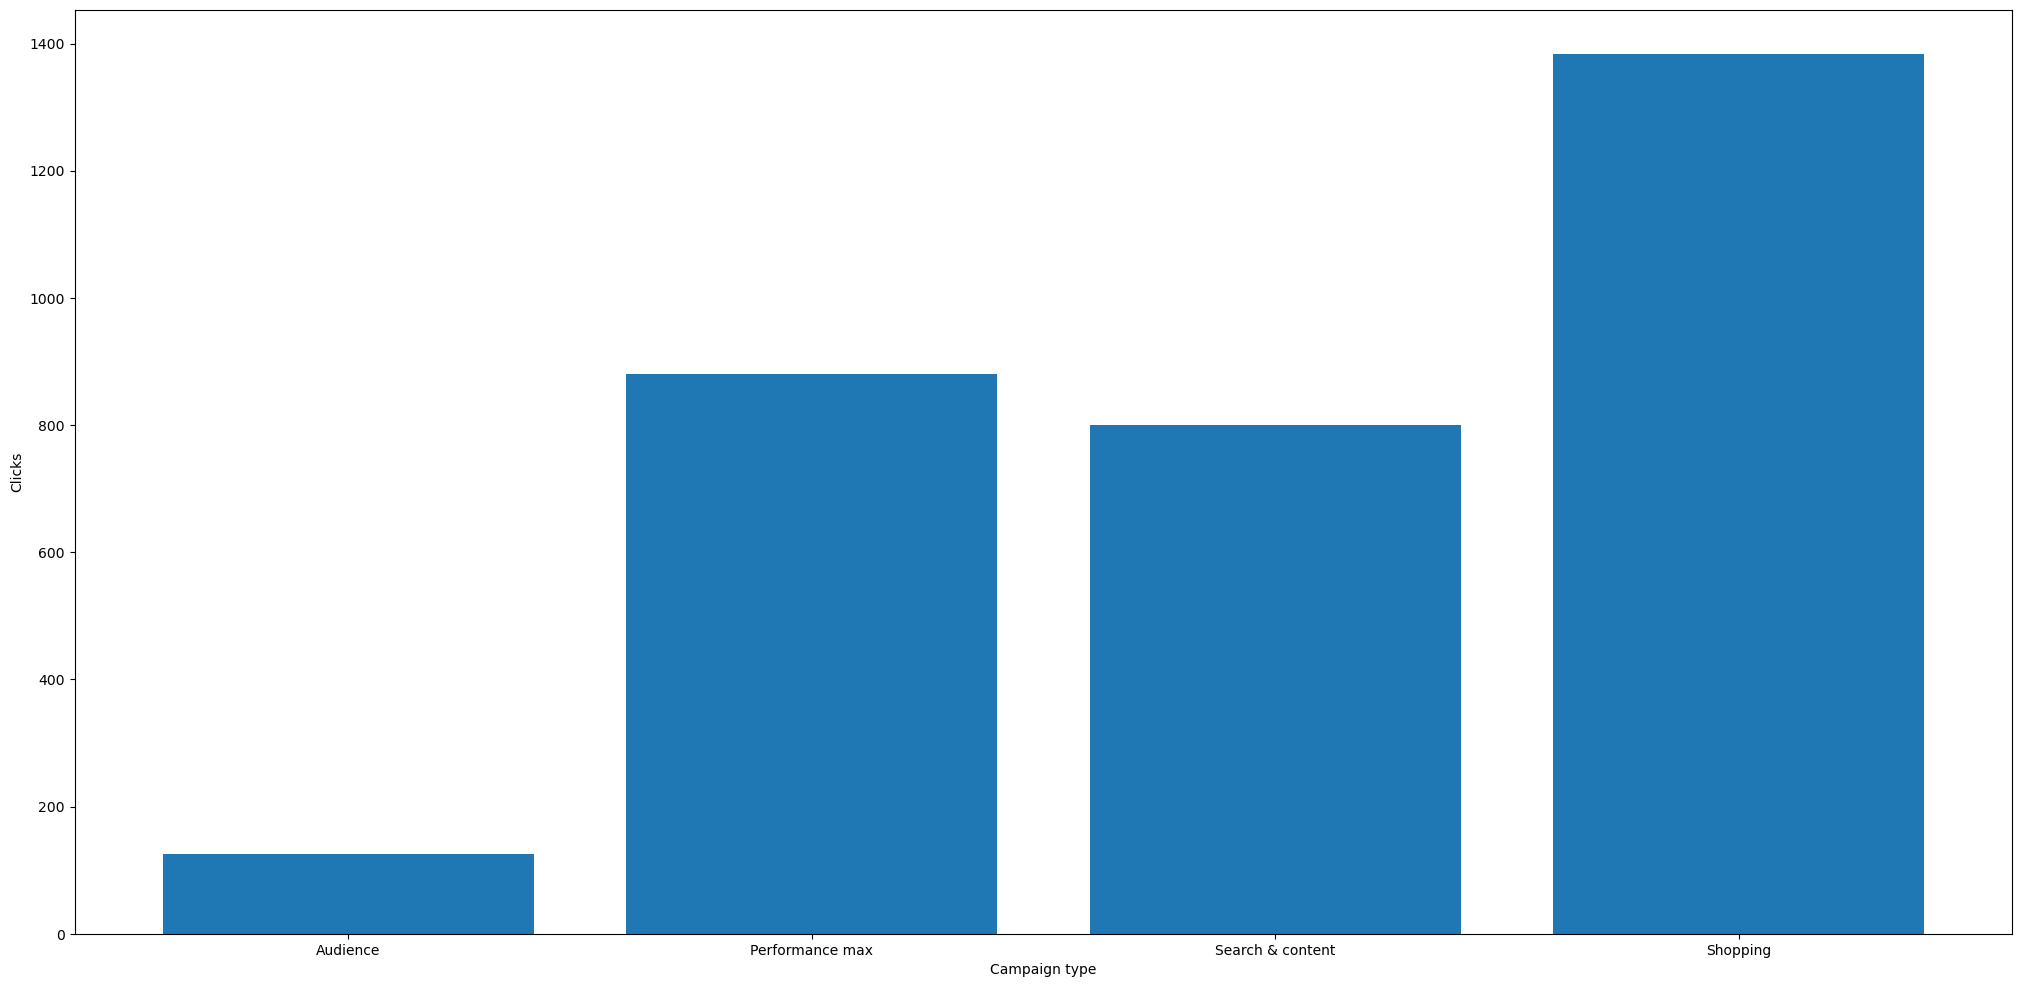

In [126]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Campaign type'], microsoftads_performance['Clicks'])
plt.xlabel("Campaign type")
plt.ylabel("Clicks")
plt.show()

In [127]:
corr=microsoftads_performance.corr()
corr.style.background_gradient(cmap="coolwarm")

C:\Users\nensi\AppData\Local\Temp\ipykernel_5428\2930190952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=microsoftads_performance.corr()


,Impressions,Clicks,Cost,Conversions,Revenue
Impressions,1.000000,0.944027,0.788546,0.682099,0.613122
Clicks,0.944027,1.000000,0.859123,0.712107,0.635250
Cost,0.788546,0.859123,1.000000,0.779971,0.681992
Conversions,0.682099,0.712107,0.779971,1.000000,0.878903
Revenue,0.613122,0.635250,0.681992,0.878903,1.000000


<Axes: xlabel='Campaign type', ylabel='Cost'>

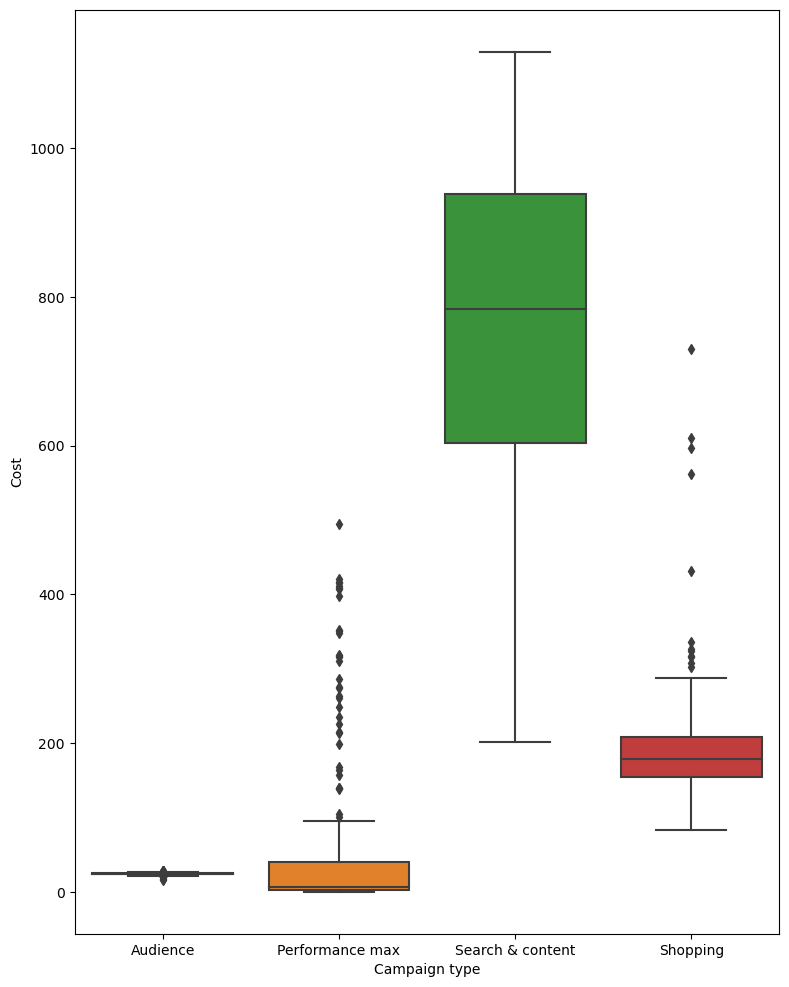

In [128]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Cost", data=microsoftads_performance)

<Axes: xlabel='Campaign type', ylabel='Conversions'>

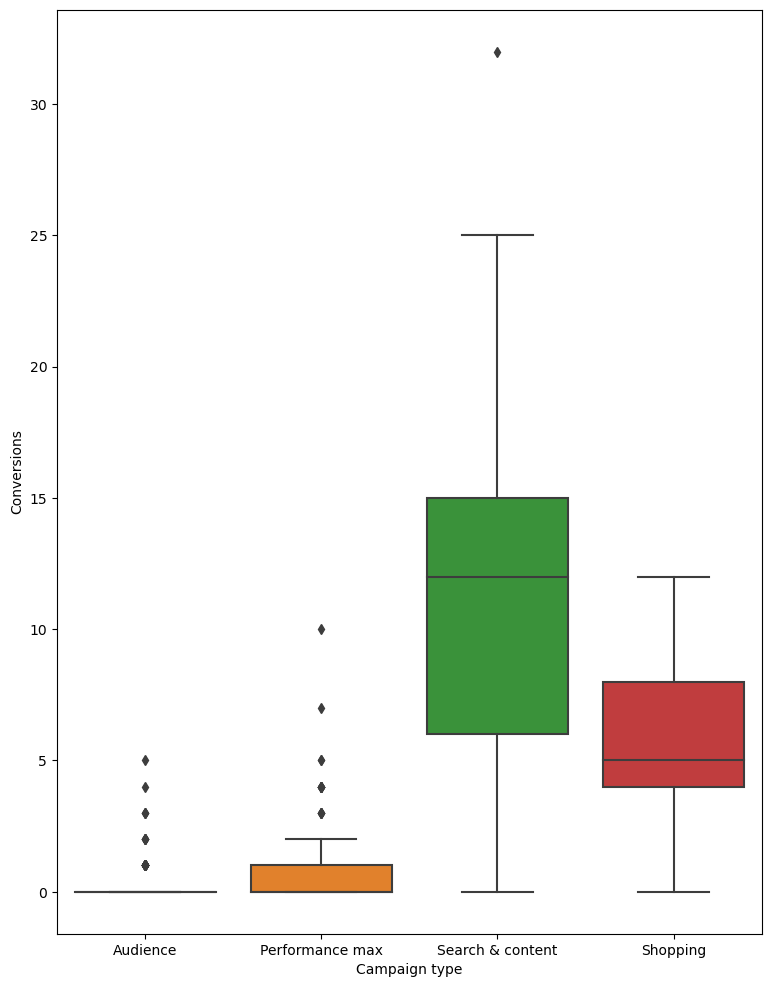

In [129]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Conversions", data=microsoftads_performance)

<Axes: xlabel='Campaign type', ylabel='Revenue'>

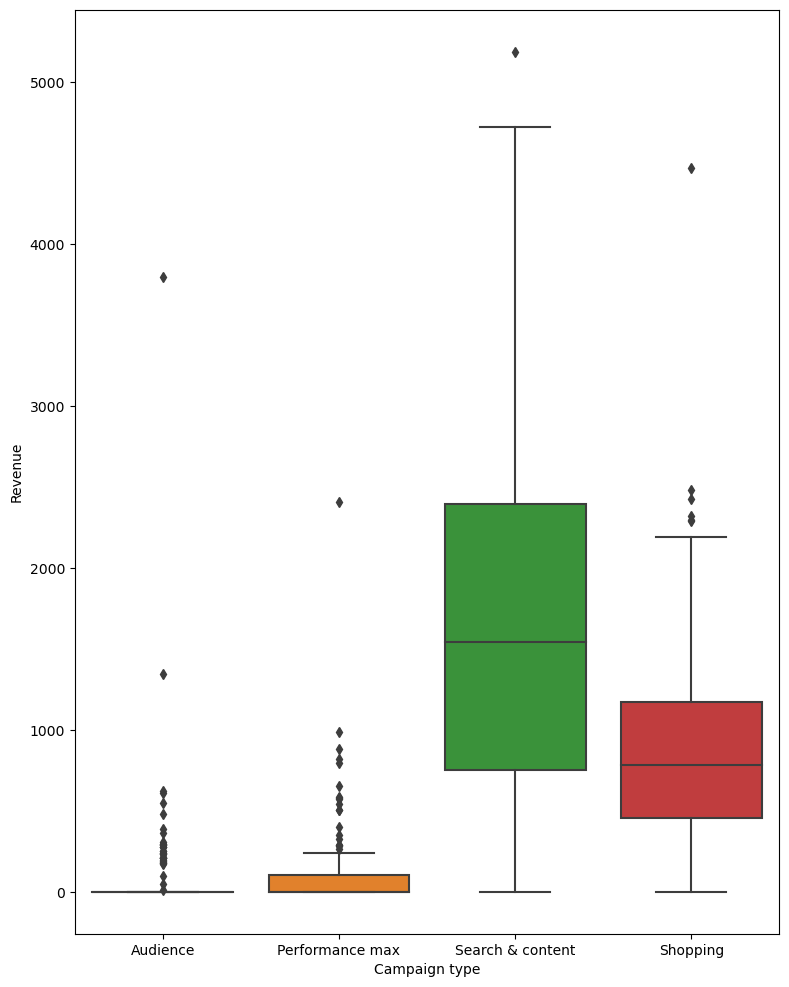

In [130]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Revenue", data=microsoftads_performance)

<Axes: xlabel='Campaign type', ylabel='Clicks'>

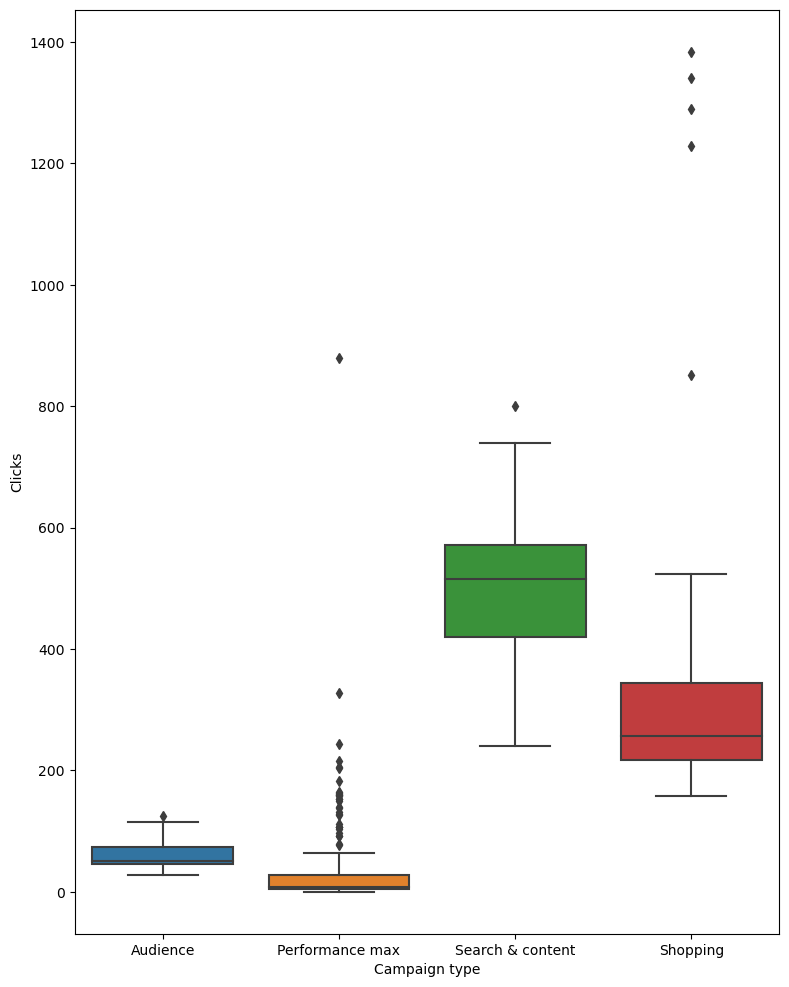

In [131]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Clicks", data=microsoftads_performance)

<Axes: xlabel='Campaign type', ylabel='Impressions'>

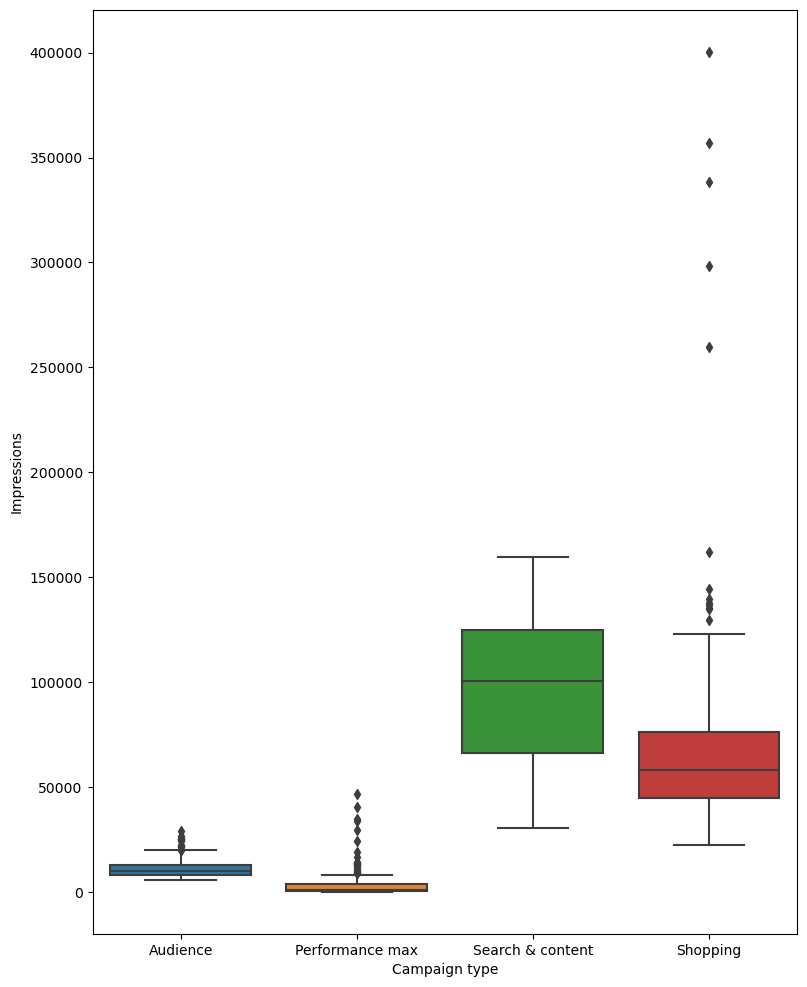

In [132]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Impressions", data=microsoftads_performance)

In [133]:
numeric_columns3=["Impressions", "Clicks", "Cost", "Conversions", "Revenue"]

In [134]:
scaler=StandardScaler()
data_scaled=microsoftads_performance.copy()
data_scaled[numeric_columns3]=scaler.fit_transform(microsoftads_performance[numeric_columns3])
print(scaler.mean_)

[4.55039112e+04 2.27690707e+02 2.60636338e+02 4.46047157e+00
 6.85468516e+02]


In [135]:
microsoftads_performance_Impressions_Q1 = microsoftads_performance["Impressions"].quantile(0.25)
microsoftads_performance_Impressions_Q3 = microsoftads_performance["Impressions"].quantile(0.75)
microsoftads_performance_Impressions_iqr = microsoftads_performance_Impressions_Q3 - microsoftads_performance_Impressions_Q1

In [136]:
upper_microsoftads_performance_Impressions = microsoftads_performance_Impressions_Q3 + 1.5 * microsoftads_performance_Impressions_iqr
lower_microsoftads_performance_Impressions = microsoftads_performance_Impressions_Q1 - 1.5 * microsoftads_performance_Impressions_iqr

In [137]:
microsoftads_performance[microsoftads_performance['Impressions'] < lower_microsoftads_performance_Impressions]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [138]:
microsoftads_performance[microsoftads_performance['Impressions'] > upper_microsoftads_performance_Impressions]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
86,Shopping,298165.0,1340.0,561.6,8.0,1093.5
89,Shopping,338147.0,1290.0,596.8,4.0,702.0
93,Shopping,356781.0,1228.0,610.4,4.0,772.0
96,Shopping,400462.0,1384.0,730.6,4.0,539.6
100,Shopping,259856.0,852.0,431.9,8.0,1383.1


In [139]:
microsoftads_performance['Impressions'] = np.where(
    microsoftads_performance['Impressions'] > upper_microsoftads_performance_Impressions,
    upper_microsoftads_performance_Impressions,
    np.where(
    microsoftads_performance['Impressions'] < lower_microsoftads_performance_Impressions,
    lower_microsoftads_performance_Impressions, microsoftads_performance['Impressions']))

<Axes: xlabel='Impressions'>

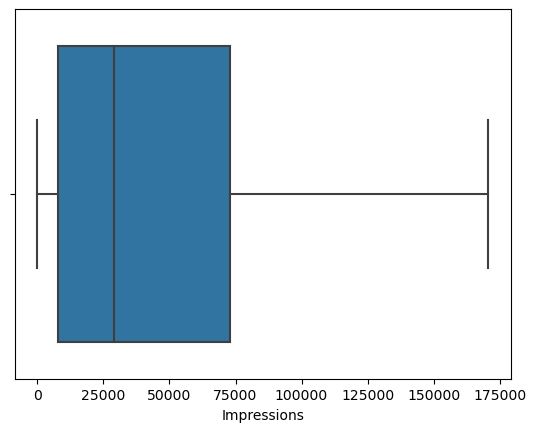

In [140]:
sns.boxplot(x="Impressions", data=microsoftads_performance)

In [141]:
microsoftads_performance_Clicks_Q1 = microsoftads_performance["Clicks"].quantile(0.25)
microsoftads_performance_Clicks_Q3 = microsoftads_performance["Clicks"].quantile(0.75)
microsoftads_performance_Clicks_iqr = microsoftads_performance_Clicks_Q3 - microsoftads_performance_Clicks_Q1

In [142]:
upper_microsoftads_performance_Clicks = microsoftads_performance_Clicks_Q3 + 1.5 * microsoftads_performance_Clicks_iqr
lower_microsoftads_performance_Clicks = microsoftads_performance_Clicks_Q1 - 1.5 * microsoftads_performance_Clicks_iqr

In [143]:
microsoftads_performance[microsoftads_performance['Clicks'] < lower_microsoftads_performance_Clicks]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [144]:
microsoftads_performance[microsoftads_performance['Clicks'] > upper_microsoftads_performance_Clicks]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
86,Shopping,170706.5,1340.0,561.6,8.0,1093.5
89,Shopping,170706.5,1290.0,596.8,4.0,702.0
93,Shopping,170706.5,1228.0,610.4,4.0,772.0
96,Shopping,170706.5,1384.0,730.6,4.0,539.6


In [145]:
microsoftads_performance['Clicks'] = np.where(
    microsoftads_performance['Clicks'] > upper_microsoftads_performance_Clicks,
    upper_microsoftads_performance_Clicks,
    np.where(
    microsoftads_performance['Clicks'] < lower_microsoftads_performance_Clicks,
    lower_microsoftads_performance_Clicks, microsoftads_performance['Clicks']))

<Axes: xlabel='Clicks'>

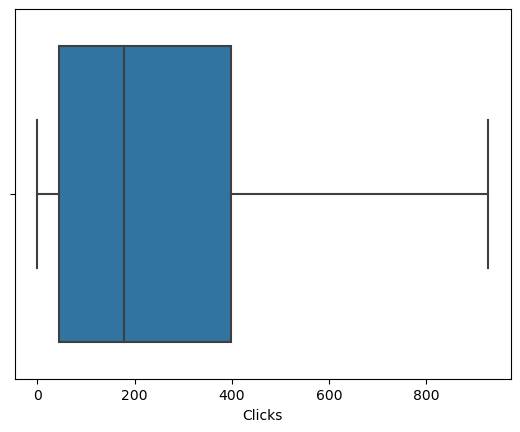

In [146]:
sns.boxplot(x="Clicks", data=microsoftads_performance)

In [147]:
microsoftads_performance_Cost_Q1 = microsoftads_performance["Cost"].quantile(0.25)
microsoftads_performance_Cost_Q3 = microsoftads_performance["Cost"].quantile(0.75)
microsoftads_performance_Cost_iqr = microsoftads_performance_Cost_Q3 - microsoftads_performance_Cost_Q1

In [148]:
upper_microsoftads_performance_Cost = microsoftads_performance_Cost_Q3 + 1.5 * microsoftads_performance_Cost_iqr
lower_microsoftads_performance_Cost = microsoftads_performance_Cost_Q1 - 1.5 * microsoftads_performance_Cost_iqr

In [149]:
microsoftads_performance[microsoftads_performance['Cost'] < lower_microsoftads_performance_Cost]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [150]:
microsoftads_performance[microsoftads_performance['Cost'] > upper_microsoftads_performance_Cost]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
38,Search & content,136175.0,546.0,1013.9,13.0,2448.4
92,Search & content,125444.0,629.0,989.1,12.0,1990.8
95,Search & content,148385.0,655.0,990.8,15.0,2829.7
120,Search & content,128332.0,611.0,982.3,15.0,3027.6
127,Search & content,100119.0,736.0,1008.3,10.0,1694.7
135,Search & content,134735.0,614.0,999.6,18.0,2457.4
139,Search & content,145188.0,605.0,1025.1,15.0,2439.0
143,Search & content,141631.0,620.0,1046.5,24.0,3562.0
147,Search & content,140787.0,623.0,1019.3,25.0,5189.9
151,Search & content,126386.0,572.0,1021.2,13.0,1852.4


In [151]:
microsoftads_performance['Cost'] = np.where(
    microsoftads_performance['Cost'] > upper_microsoftads_performance_Cost,
    upper_microsoftads_performance_Cost,
    np.where(
    microsoftads_performance['Cost'] < lower_microsoftads_performance_Cost,
    lower_microsoftads_performance_Cost, microsoftads_performance['Cost']))

<Axes: xlabel='Cost'>

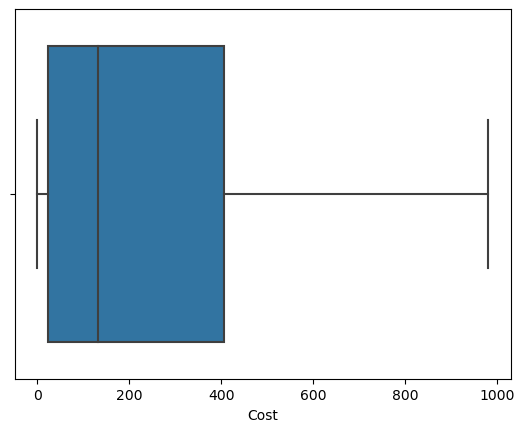

In [152]:
sns.boxplot(x="Cost", data=microsoftads_performance)

In [153]:
# Feature Engineering: Calculate conversion rates
microsoftads_performance['conversion_rate'] = microsoftads_performance['Conversions'] / microsoftads_performance['Clicks']

In [154]:
# Display summary statistics
microsoftads_performance.describe()

,Impressions,Clicks,Cost,Conversions,Revenue,conversion_rate
count,721.000000,721.000000,721.000000,721.000000,721.000000,710.000000
mean,44394.509709,225.565881,258.917614,4.460472,685.468516,0.021595
std,44962.946777,211.881748,318.247868,5.494836,926.238756,0.084356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7699.000000,45.000000,23.600000,0.000000,0.000000,0.000000
50%,28840.000000,178.000000,131.400000,2.000000,253.100000,0.012987
75%,72902.000000,398.000000,406.700000,7.000000,1050.700000,0.024547
max,170706.500000,927.500000,981.350000,32.000000,5189.900000,2.000000


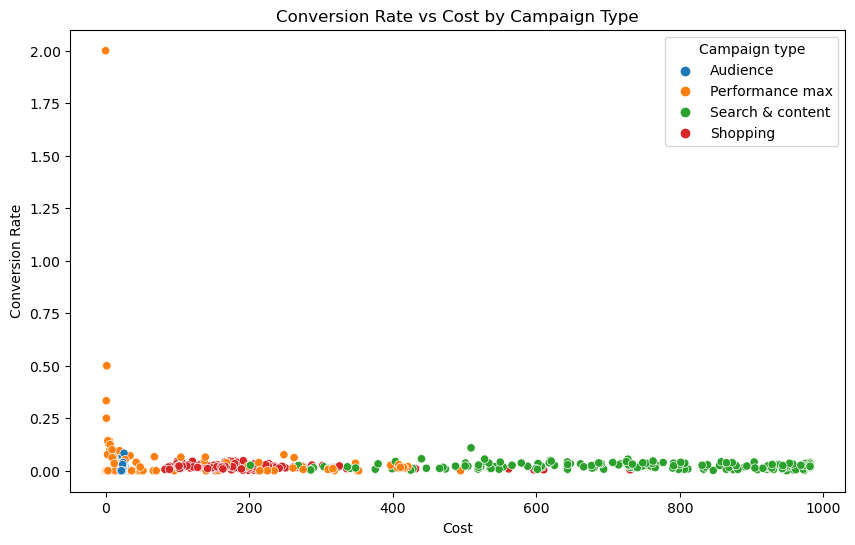

In [155]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cost', y='conversion_rate', hue='Campaign type', data=microsoftads_performance)
plt.title('Conversion Rate vs Cost by Campaign Type')
plt.xlabel('Cost')
plt.ylabel('Conversion Rate')
plt.show()

In [156]:
# Define features (X) and target (y)
X = microsoftads_performance[['Cost', 'Impressions', 'Clicks']]
y = microsoftads_performance['Conversions']

In [157]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [159]:
# Predict conversions on the test set
y_pred = model.predict(X_test)

In [160]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [161]:
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 2.5542045372980926
R2 Score: 0.46684107797638563


In [162]:
# Group by Campaign type to get conversion and cost data
campaign_performance = microsoftads_performance.groupby('Campaign type').agg({
    'Cost': 'sum',
    'Conversions': 'sum'
}).reset_index()
campaign_performance

,Campaign type,Cost,Conversions
0,Audience,4383.8,55.0
1,Performance max,10921.5,120.0
2,Search & content,136664.5,2023.0
3,Shopping,34709.8,1018.0


In [163]:
# Initialize parameters
n_campaigns = len(campaign_performance)  # Number of campaign types
total_budget = 200000  # Total budget to allocate
min_budget = 0.1 * total_budget  # Minimum budget allocation to each campaign
campaign_performance['Allocated Budget'] = min_budget  # Initialize with minimum budget

In [164]:
# Define Epsilon-Greedy parameters
epsilon = 0.1  # Exploration probability
n_rounds = 100  # Number of rounds (iterations) for budget allocation

In [165]:
# Track total conversions and budget allocated
total_conversions = 0
allocated_budgets = np.zeros(n_campaigns)

In [166]:
# Multi-Armed Bandit - Epsilon-Greedy Algorithm
for _ in range(n_rounds):
    # Exploration vs Exploitation
    if random.random() < epsilon:
        # Exploration: Randomly select a campaign
        campaign_index = random.randint(0, n_campaigns - 1)
    else:
        # Exploitation: Select the campaign with the best conversion rate
        conversion_rates = campaign_performance['Conversions'] / campaign_performance['Cost']
        campaign_index = np.argmax(conversion_rates)

    # Allocate a small portion of the remaining budget to the selected campaign
    remaining_budget = total_budget - campaign_performance['Allocated Budget'].sum()
    budget_to_allocate = remaining_budget / (n_rounds - _)

    campaign_performance.loc[campaign_index, 'Allocated Budget'] += budget_to_allocate

    # Update the total conversions
    conversion_rate = campaign_performance.loc[campaign_index, 'Conversions'] / campaign_performance.loc[campaign_index, 'Cost']
    total_conversions += conversion_rate * budget_to_allocate

In [167]:
# Print the final budget allocation and estimated conversions
print(campaign_performance[['Campaign type', 'Allocated Budget']])
print(f"Total Estimated Conversions: {total_conversions:.2f}")

      Campaign type  Allocated Budget
0          Audience           22400.0
1   Performance max           24800.0
2  Search & content           23600.0
3          Shopping          129200.0
Total Estimated Conversions: 3338.86


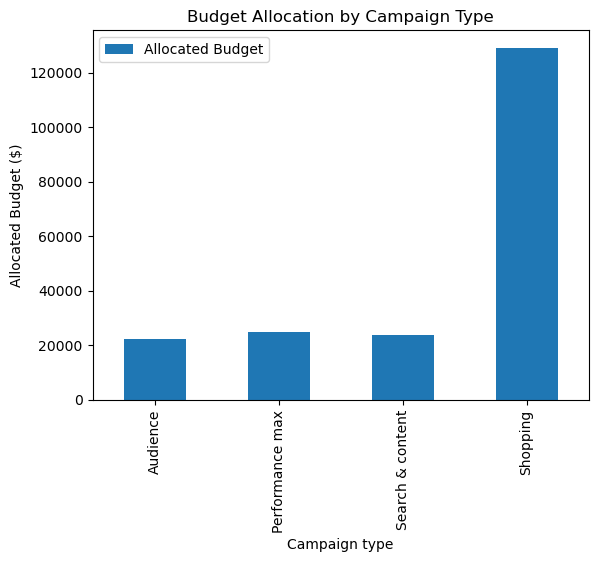

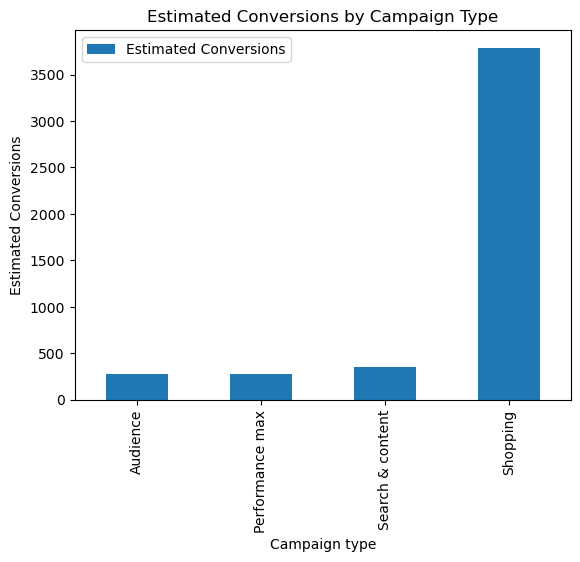

In [168]:
# Plot Allocated Budget vs. Campaign Type
campaign_performance.plot(kind='bar', x='Campaign type', y='Allocated Budget', title='Budget Allocation by Campaign Type')
plt.ylabel('Allocated Budget ($)')
plt.show()

# Plot Estimated Conversions vs. Campaign Type
campaign_performance['Estimated Conversions'] = campaign_performance['Allocated Budget'] * (campaign_performance['Conversions'] / campaign_performance['Cost'])
campaign_performance.plot(kind='bar', x='Campaign type', y='Estimated Conversions', title='Estimated Conversions by Campaign Type')
plt.ylabel('Estimated Conversions')
plt.show()

# 4. Website Landings





In [169]:
website_landings = pd.read_csv("website-landings.csv")
website_landings

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,20a70111,2024-02-29 01:57:19,0,NaN,direct,NaN
1,20a70111,2024-02-29 13:58:10,0,NaN,direct,NaN
2,58830f30,2024-01-18 13:22:58,0,NaN,direct,NaN
3,58830f30,2024-01-19 16:19:37,0,NaN,direct,NaN
4,58830f30,2024-01-22 13:33:16,0,NaN,direct,NaN
...,...,...,...,...,...,...
1586309,b85a0e21,2024-03-20 00:01:17,0,facebook,paid,NaN
1586310,79cb06db,2024-03-20 00:00:51,0,facebook,paid,NaN
1586311,79cafabc,2024-03-20 00:01:39,0,facebook,paid,NaN
1586312,a7804937,2024-03-20 00:00:59,0,facebook,paid,NaN


In [170]:
website_landings.head()

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,20a70111,2024-02-29 01:57:19,0,NaN,direct,NaN
1,20a70111,2024-02-29 13:58:10,0,NaN,direct,NaN
2,58830f30,2024-01-18 13:22:58,0,NaN,direct,NaN
3,58830f30,2024-01-19 16:19:37,0,NaN,direct,NaN
4,58830f30,2024-01-22 13:33:16,0,NaN,direct,NaN


In [171]:
website_landings.tail()

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
1586309,b85a0e21,2024-03-20 00:01:17,0,facebook,paid,NaN
1586310,79cb06db,2024-03-20 00:00:51,0,facebook,paid,NaN
1586311,79cafabc,2024-03-20 00:01:39,0,facebook,paid,NaN
1586312,a7804937,2024-03-20 00:00:59,0,facebook,paid,NaN
1586313,17ba10d0,2024-03-20 00:01:30,0,facebook,paid,NaN


In [172]:
website_landings.shape

(1586314, 6)

In [173]:
website_landings.columns

Index(['User Id', 'Website Landing Time', 'Is Converted', 'Source', 'Channel',
       'Campaign Type'],
      dtype='object')

In [174]:
website_landings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586314 entries, 0 to 1586313
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   User Id               1586314 non-null  object
 1   Website Landing Time  1586314 non-null  object
 2   Is Converted          1586314 non-null  int64 
 3   Source                971465 non-null   object
 4   Channel               1586314 non-null  object
 5   Campaign Type         640729 non-null   object
dtypes: int64(1), object(5)
memory usage: 72.6+ MB


In [175]:
website_landings.describe()

,Is Converted
count,1.586314e+06
mean,1.854929e-02
std,1.349267e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [176]:
website_landings.describe(include="object")

,User Id,Website Landing Time,Source,Channel,Campaign Type
count,1586314,1586314,971465,1586314,640729
unique,950404,1480471,54,8,8
top,c76f81de,2024-06-12 13:58:45,google,paid,Cross-network
freq,2301,12,659026,695868,385470


In [177]:
website_landings.isnull()

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,False,False,False,True,False,True
1,False,False,False,True,False,True
2,False,False,False,True,False,True
3,False,False,False,True,False,True
4,False,False,False,True,False,True
...,...,...,...,...,...,...
1586309,False,False,False,False,False,True
1586310,False,False,False,False,False,True
1586311,False,False,False,False,False,True
1586312,False,False,False,False,False,True


In [178]:
website_landings.isnull().sum()

User Id                      0
Website Landing Time         0
Is Converted                 0
Source                  614849
Channel                      0
Campaign Type           945585
dtype: int64

In [179]:
website_landings["Campaign Type"].unique()

array([nan, 'Shopping', 'Search & content', 'Cross-network', 'Audience',
       'Search Network', 'Performance max', 'YouTube', 'Display Network'],
      dtype=object)

In [180]:
website_landings["Source"].unique()

array([nan, 'google', 'yahoo!', 'pinterest', 'facebook', 'duckduckgo',
       'youtube', 'bing', 'criteo', 'taboola', 'reddit', 'ecosia',
       'tiktok', 'instagram', 'outbrain', 'outlook.com', 'yahoo! mail',
       'gmail', 'baidu', 'aol', 'hi5', 'infospace', 'twitter', 'aol mail',
       'snapchat', 'qq mail', 'yahoo! images', 'seznam mail', 'earthlink',
       'qwant', 't-online', 'optus zoo', 'google images', 'startsiden',
       'bigpond', 'naver', 'linkedin', 'quora', 'atlas', 'yandex',
       'myheritage', 'tumblr', 'mail.ru', 'skype', 'daum',
       'odnoklassniki', 'google news', 'zoho', 'lilo', 'amazon', 'seznam',
       'kvasir', 'hacker news', 'coccoc', 'startpagina'], dtype=object)

In [181]:
# Group by Campaign Type and calculate the total conversions and total impressions for each
campaign_data = website_landings.groupby('Campaign Type').agg({
    'Is Converted': ['sum', 'count']
}).reset_index()
campaign_data

Campaign Type Is Converted        
                             sum   count
0          Audience          140   10945
1     Cross-network         5925  385470
2   Display Network            0      25
3   Performance max           89    6970
4  Search & content         1016   89544
5    Search Network         1476   90721
6          Shopping          643   56052
7           YouTube           13    1002

In [182]:
# Rename columns for clarity
campaign_data.columns = ['Campaign Type', 'Total Conversions', 'Total Impressions']

In [183]:
# Define the number of simulations
N = 10000

In [184]:
# Initialize variables to track rewards and selections
n_campaigns = len(campaign_data)
numbers_of_rewards_1 = [0] * n_campaigns
numbers_of_rewards_0 = [0] * n_campaigns
total_rewards = [0] * n_campaigns

In [185]:
# Implement Thompson Sampling
for n in range(N):
    campaign_selected = 0
    max_random = 0
    for i in range(n_campaigns):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            campaign_selected = i
    reward = website_landings.loc[website_landings['Campaign Type'] == campaign_data['Campaign Type'][campaign_selected], 'Is Converted'].sample().values[0]
    if reward == 1:
        numbers_of_rewards_1[campaign_selected] += 1
    else:
        numbers_of_rewards_0[campaign_selected] += 1
    total_rewards[campaign_selected] += reward

In [186]:
# Calculate the proportion of budget to be allocated to each campaign
total_reward_sum = sum(total_rewards)
budget_proportions = [reward / total_reward_sum for reward in total_rewards]

In [187]:
# Assuming a total budget of $200,000
total_budget = 200000
allocated_budgets = [round(prop * total_budget, 2) for prop in budget_proportions]

In [188]:
# Create a DataFrame to present the results
results = pd.DataFrame({
    'Campaign Type': campaign_data['Campaign Type'],
    'Allocated Budget': allocated_budgets,
    'Conversion Rate': campaign_data['Total Conversions'] / campaign_data['Total Impressions']
})

In [189]:
print("Budget Allocation:")
print(results)

Budget Allocation:
      Campaign Type  Allocated Budget  Conversion Rate
0          Audience          15757.58         0.012791
1     Cross-network          42424.24         0.015371
2   Display Network              0.00         0.000000
3   Performance max           4848.48         0.012769
4  Search & content          24242.42         0.011346
5    Search Network          78787.88         0.016270
6          Shopping          14545.45         0.011471
7           YouTube          19393.94         0.012974
